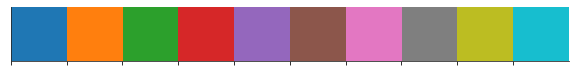

In [1]:
%load_ext autoreload
%autoreload 2
%run __init__
rs2_path = path['RSRCH'](2)

cache_path = './cache/e002'
try:
    os.mkdir(cache_path)
except:
    pass

fig_path = './figures/e002'
try:
    os.mkdir(fig_path)
except:
    pass

import importlib
e001_LL = importlib.import_module('e001-ANK-Line_Length')
e002_WV = importlib.import_module('e002-ANK-Wavelet')

stdout_orig = sys.stdout

flatui = ["#46637f", "#2ecc71", "#e74c3c", "#3498db", "#9b59b6", "#95a5a6"]
sns.palplot(sns.color_palette("tab10"))
sns.set_palette("tab10")

In [2]:
df_npref = path['CORE']['RNS']['NP_Ref']
df_ctlg = path['CORE']['RNS']['CATALOG']
TOD_DAYTIME = (7, 19)
BASELINE_DAY = 90

# Identify Long-Term Phase-Locking Value Changes

In [3]:
# Grab data for NP_code    
X_PLV_Subject = {}

# Baseline Period
for np_code in df_npref['NP_code'].unique():
    print(np_code)
    
    for loc in ['PLV_NEO', 'PLV_Inter']:

        try:
            key_dates = extract_key_dates(np_code)

            #####    
            if loc == 'PLV_Inter':
                XX, n_exclude = e002_WV.resample_PLV(np_code, remove_blank=True, despiked=False)  
            else:
                XX, n_exclude = e002_WV.resample_PLV_anatomical(np_code, remove_blank=True, despiked=False)        
        except Exception as E:
            print(1)
            print(E)
            continue
    
        if loc not in X_PLV_Subject:
            X_PLV_Subject[loc] = {}
            
        for band in XX['PLV_Band'].unique():
            if band not in X_PLV_Subject[loc]:
                X_PLV_Subject[loc][band] = {}
                
            for TOD in ['24h', 'Daytime', 'Nighttime']:
                if TOD not in X_PLV_Subject[loc][band]:
                    X_PLV_Subject[loc][band][TOD] = []
                
                # Resample temporal data
                try:              
                    X = XX[XX['PLV_Band'] == band].drop(columns=['PLV_Band', 'Filename'])

                    X = X.loc[X.index >= key_dates[0]]   
                    if TOD == 'Daytime':
                        X = X.loc[(((X.index.hour) >= TOD_DAYTIME[0]) & 
                                   ((X.index.hour) < TOD_DAYTIME[1]))]
                    elif TOD == 'Nighttime':
                        X = X.loc[~(((X.index.hour) >= TOD_DAYTIME[0]) & 
                                    ((X.index.hour) < TOD_DAYTIME[1]))]

                    X = X.set_index(X.index - key_dates[0])  
                    X0 = np.nan*X.iloc[[0]]
                    X0.index = [pd.Timedelta('0D')]
                    if loc == 'PLV_Inter':
                        X = X0.append(X).resample('30D').mean().rolling('{}D'.format(BASELINE_DAY)).mean()
                    else:
                        X = X0.append(X).resample('90D').mean().rolling('{}D'.format(BASELINE_DAY)).mean()
                    X = X.interpolate()

                    X_PLV_Subject[loc][band][TOD].append(X[loc].to_frame(name=np_code))
                except Exception as E:
                    print(2)
                    print(E)
                continue

for loc in X_PLV_Subject:
    for band in X_PLV_Subject[loc]:
        for TOD in X_PLV_Subject[loc][band]:
            X_PLV_Subject[loc][band][TOD] = pd.concat(X_PLV_Subject[loc][band][TOD], axis=1)

NP1
NP2
NP3
NP4
NP5
NP6
NP7
NP9
NP10
NP11
NP12
NP13
NP14
NP15
NP16
NP17
NP18
NP19
NP55
NP20
NP21
NP22
NP23
NP24
NP25
NP26
NP27
NP28
NP29
NP30
NP31
NP33
NP32
NP34
NP35
NP36
NP37
NP38
NP39
NP41
NP40
NP42
NP43
NP44
NP45
NP46
NP47
NP48
NP49
NP50
NP51


## Trajectory

Functional Data Analysis: 0.4067


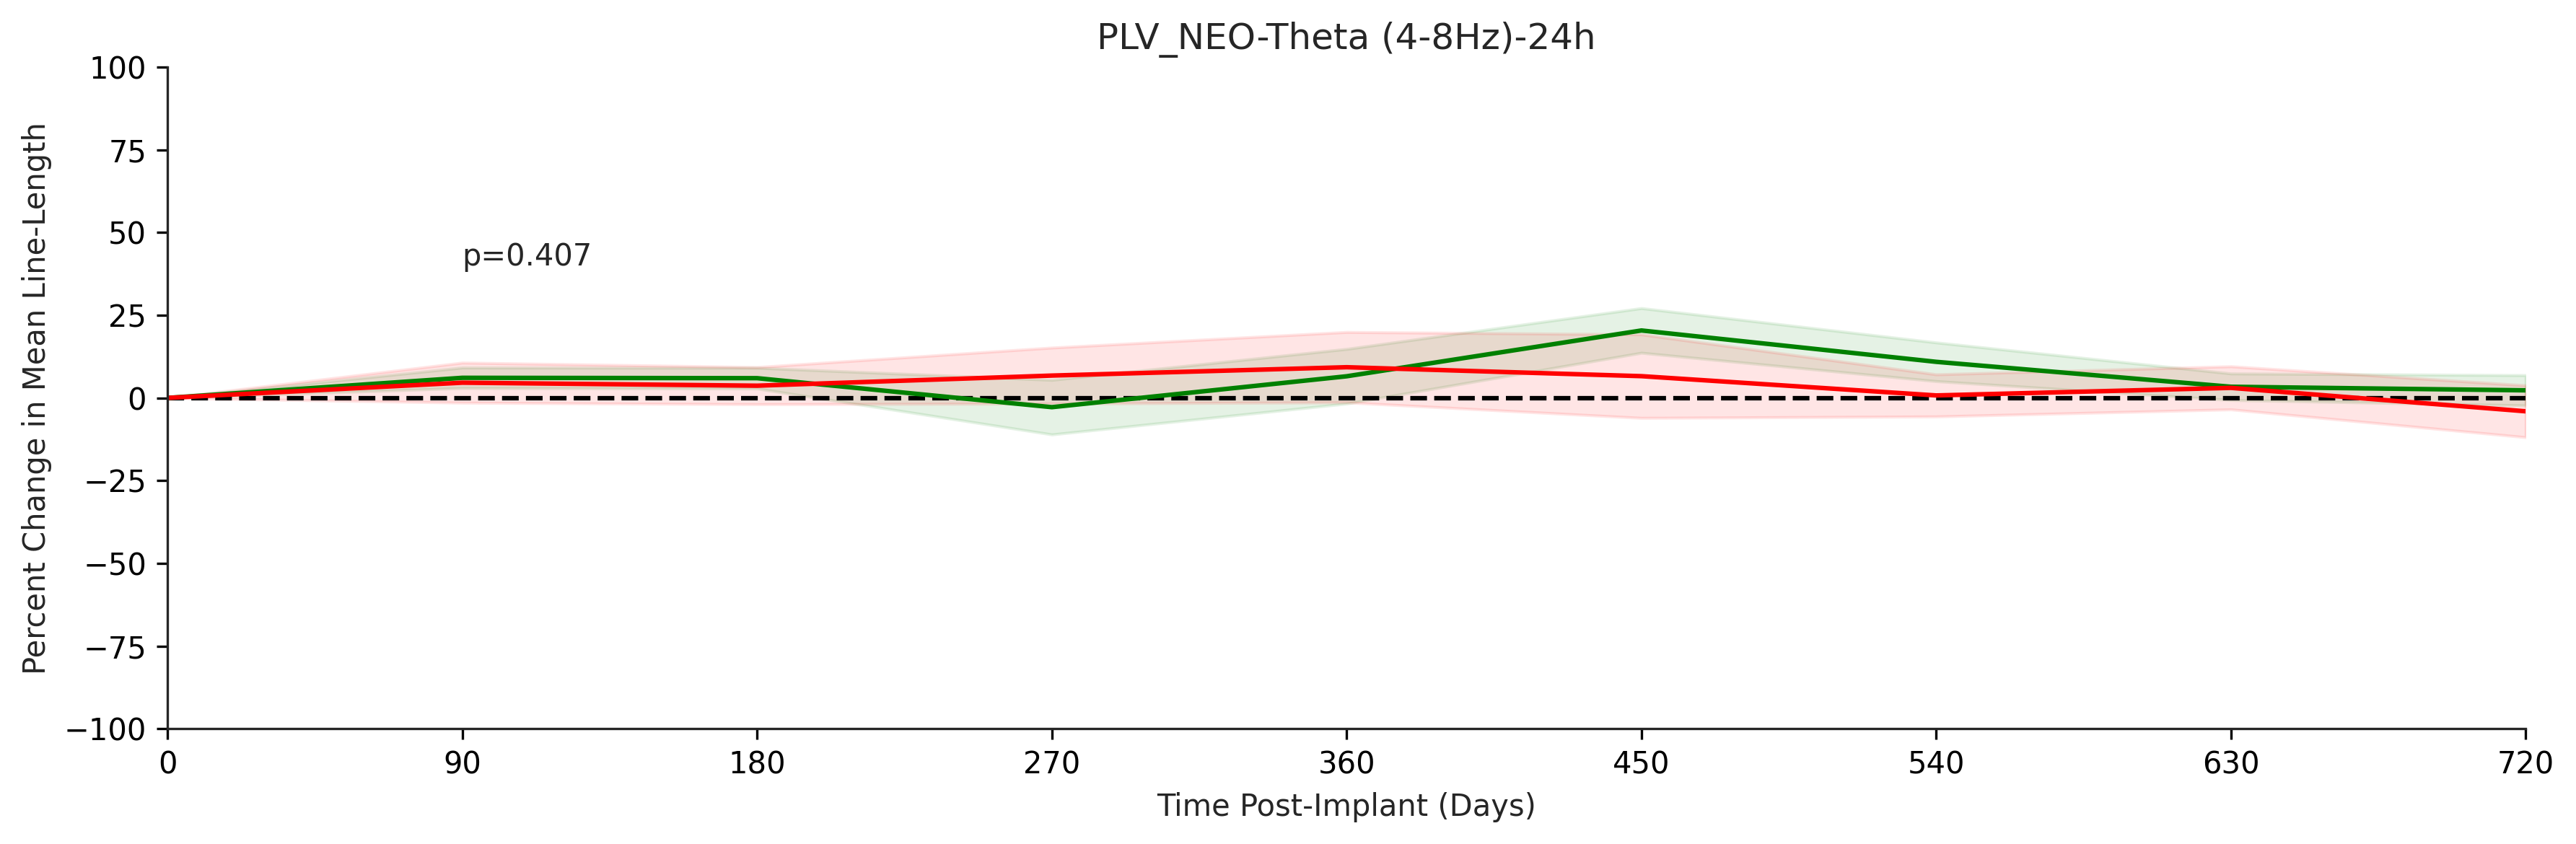

Functional Data Analysis: 0.4456


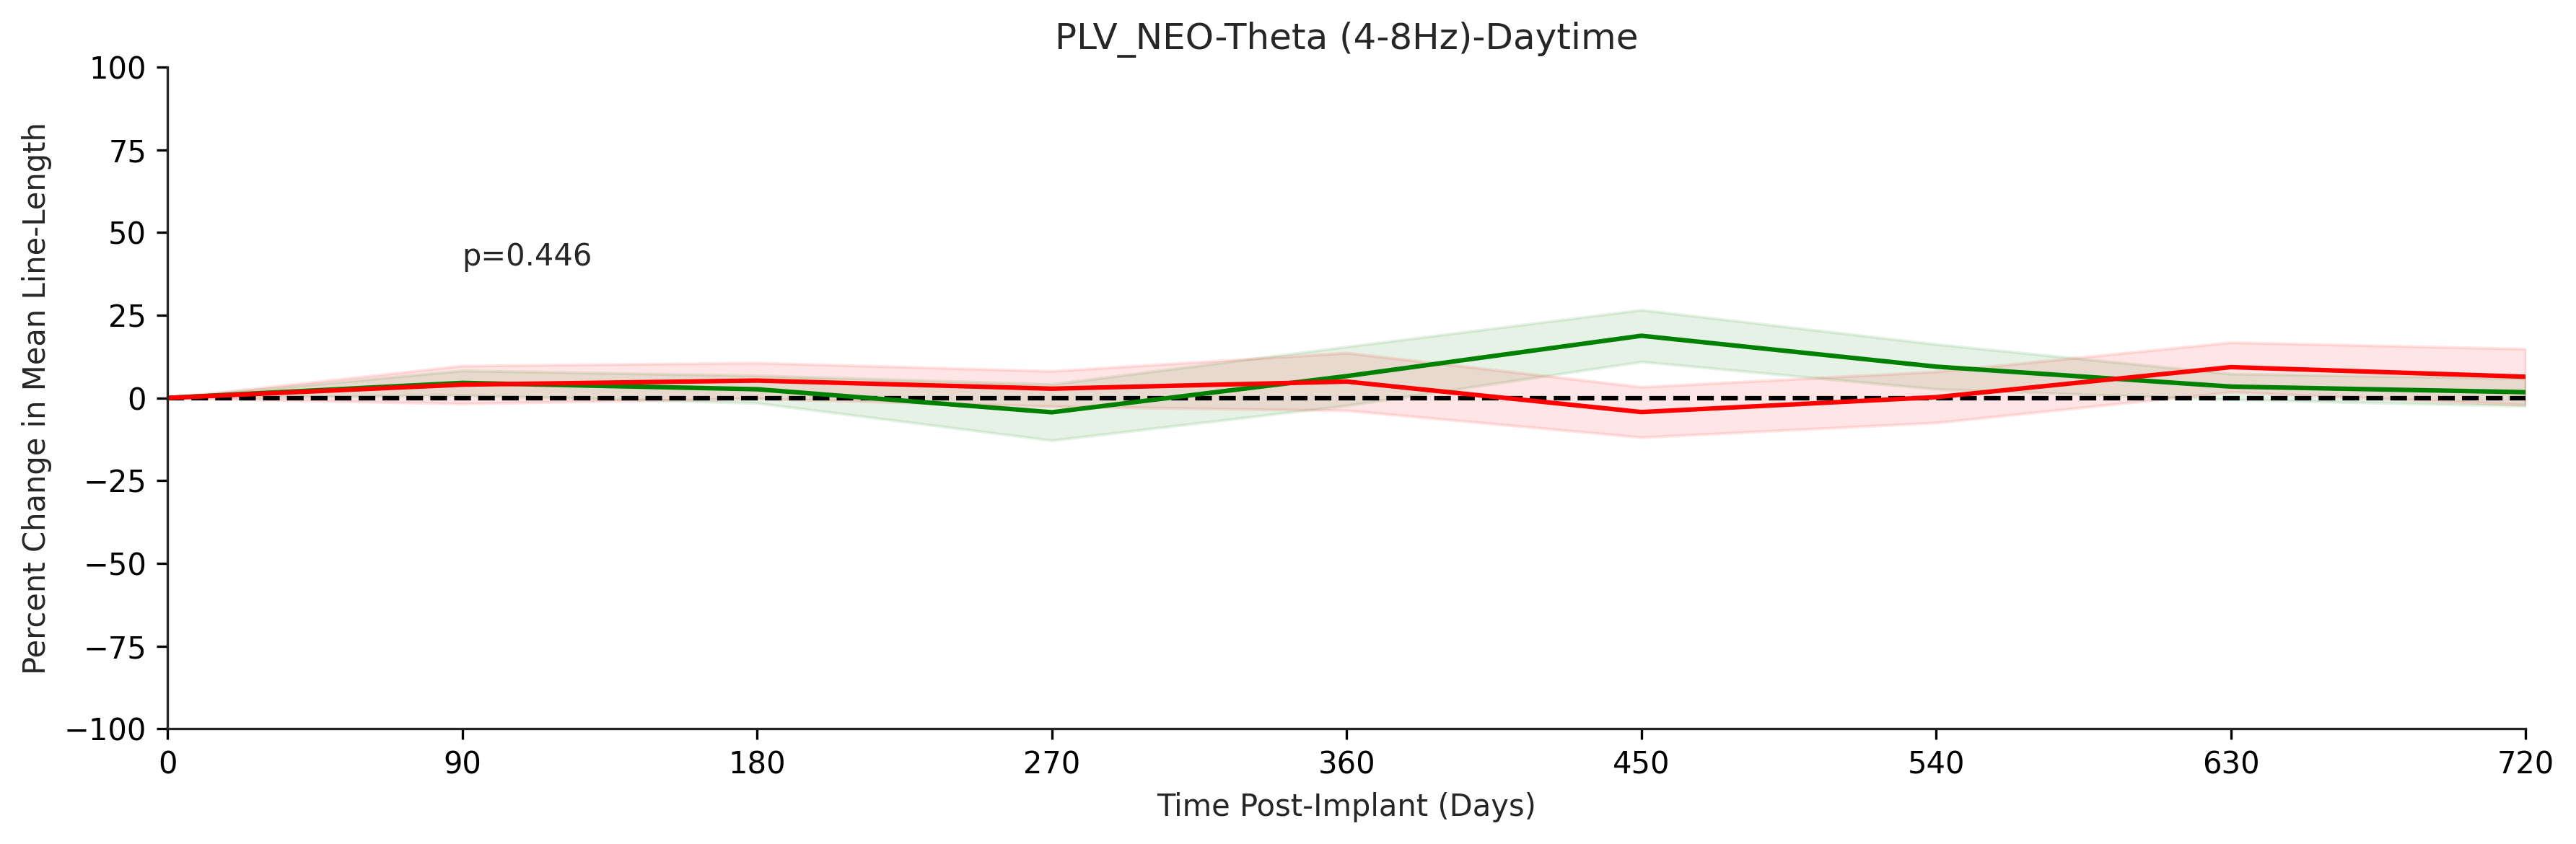

Functional Data Analysis: 0.3896


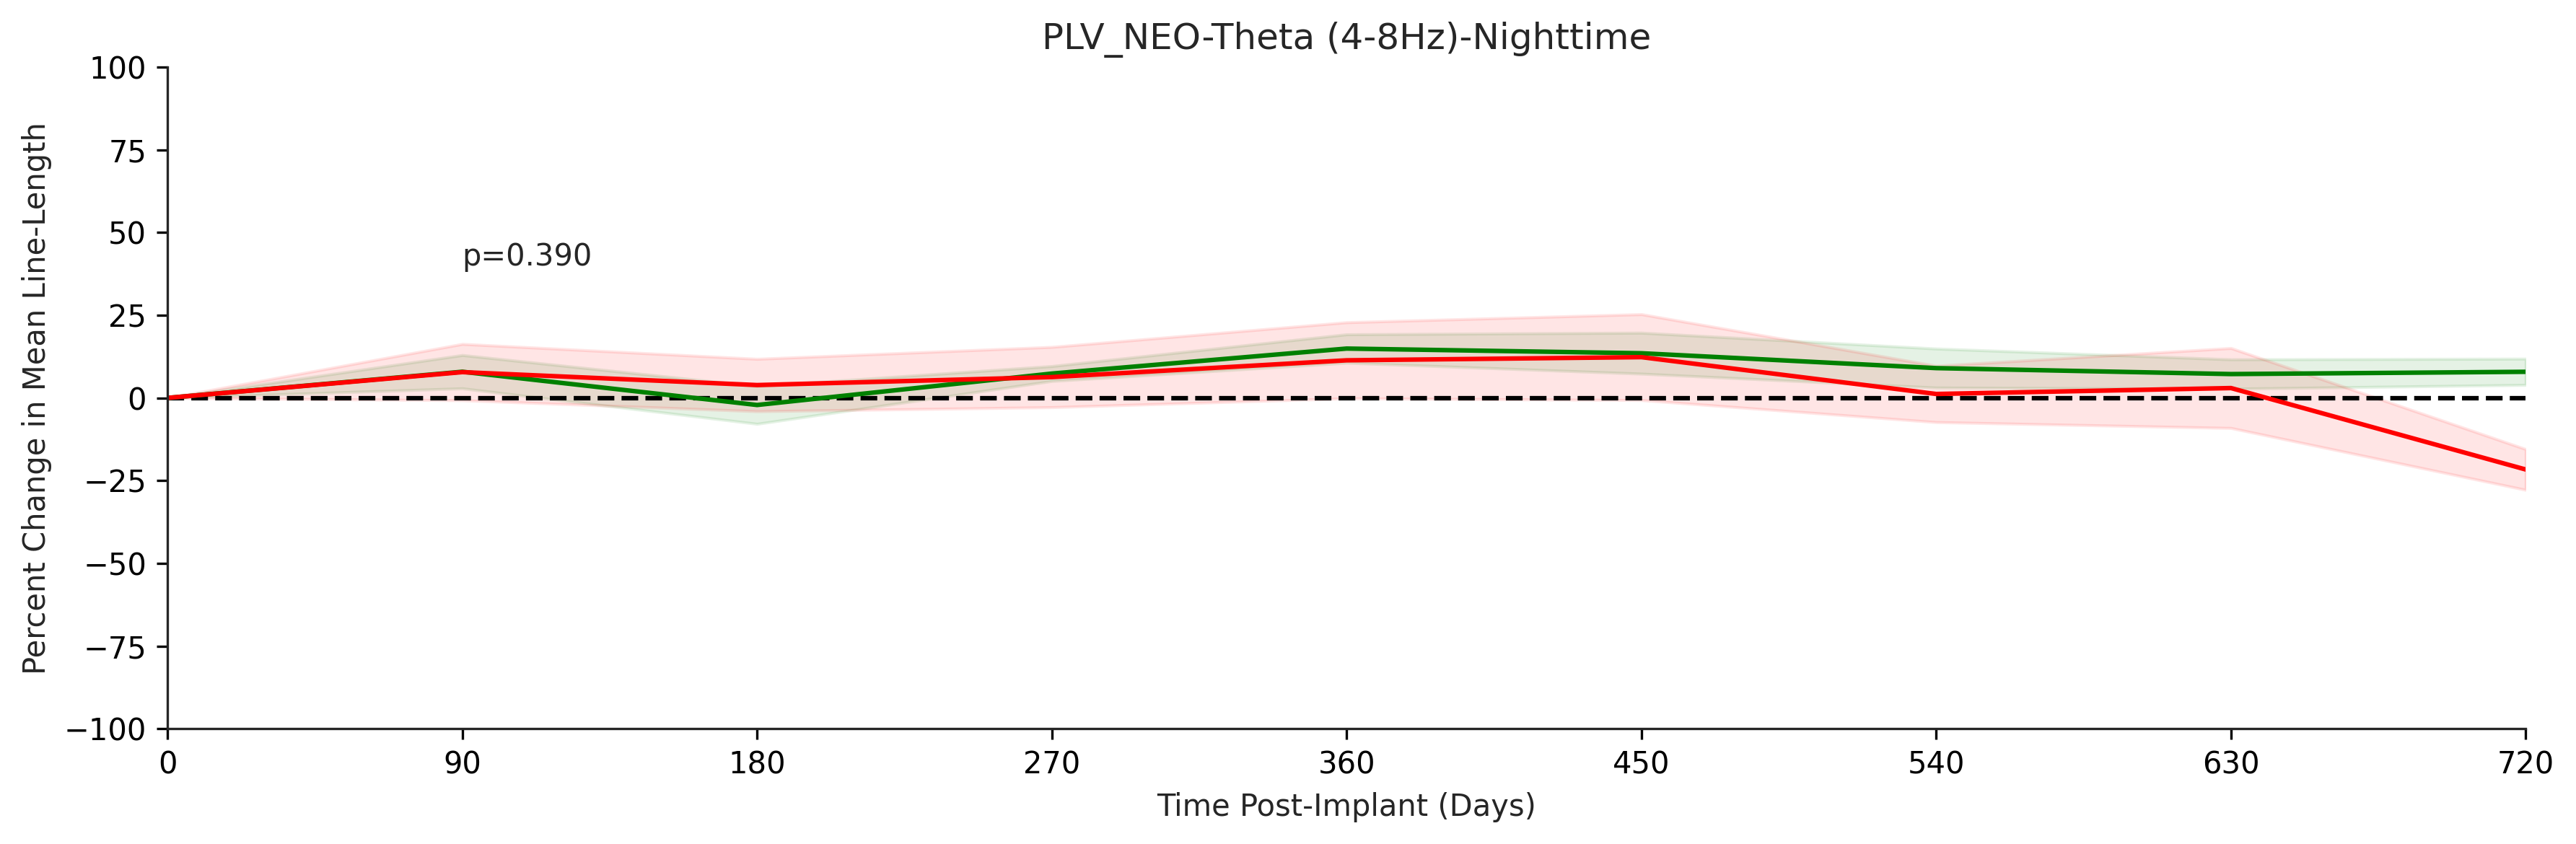

Functional Data Analysis: 0.0047


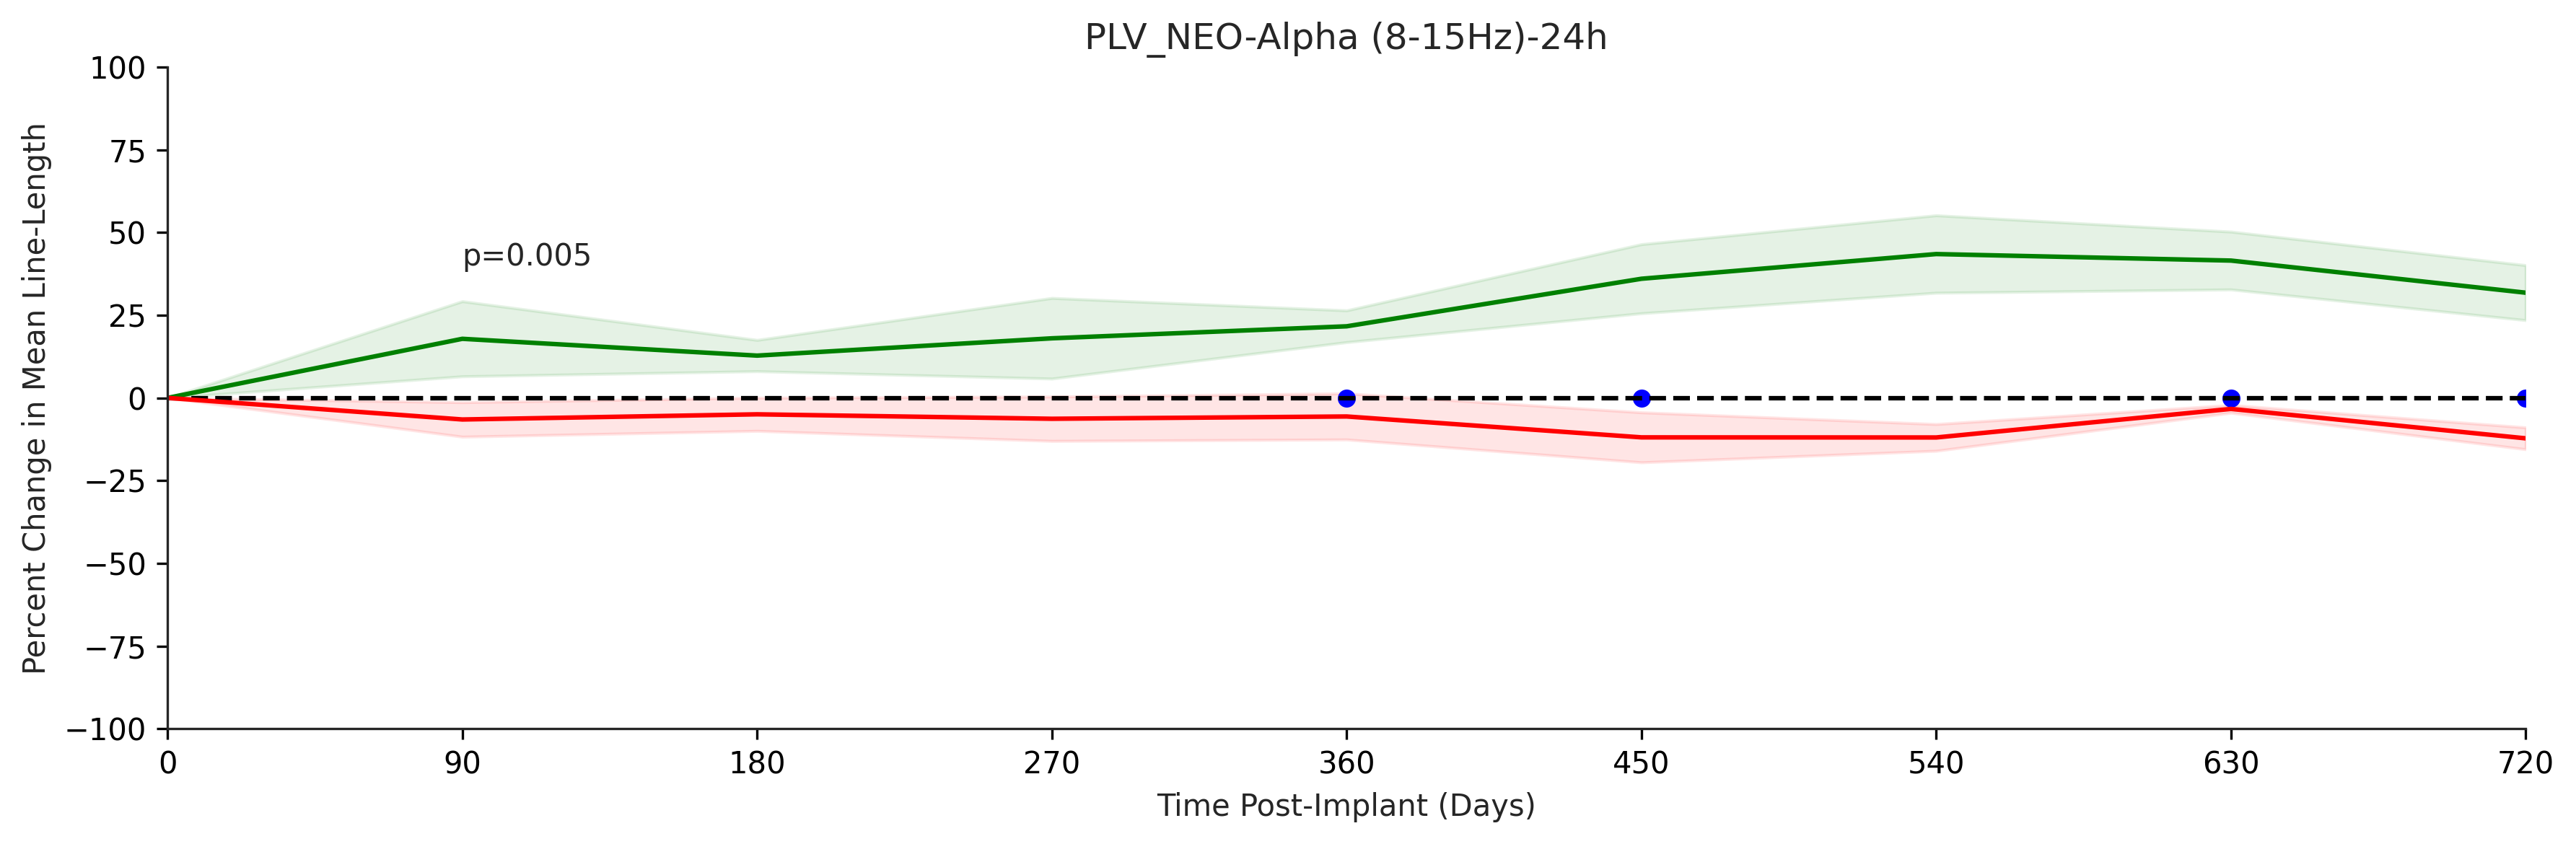

Functional Data Analysis: 0.0016


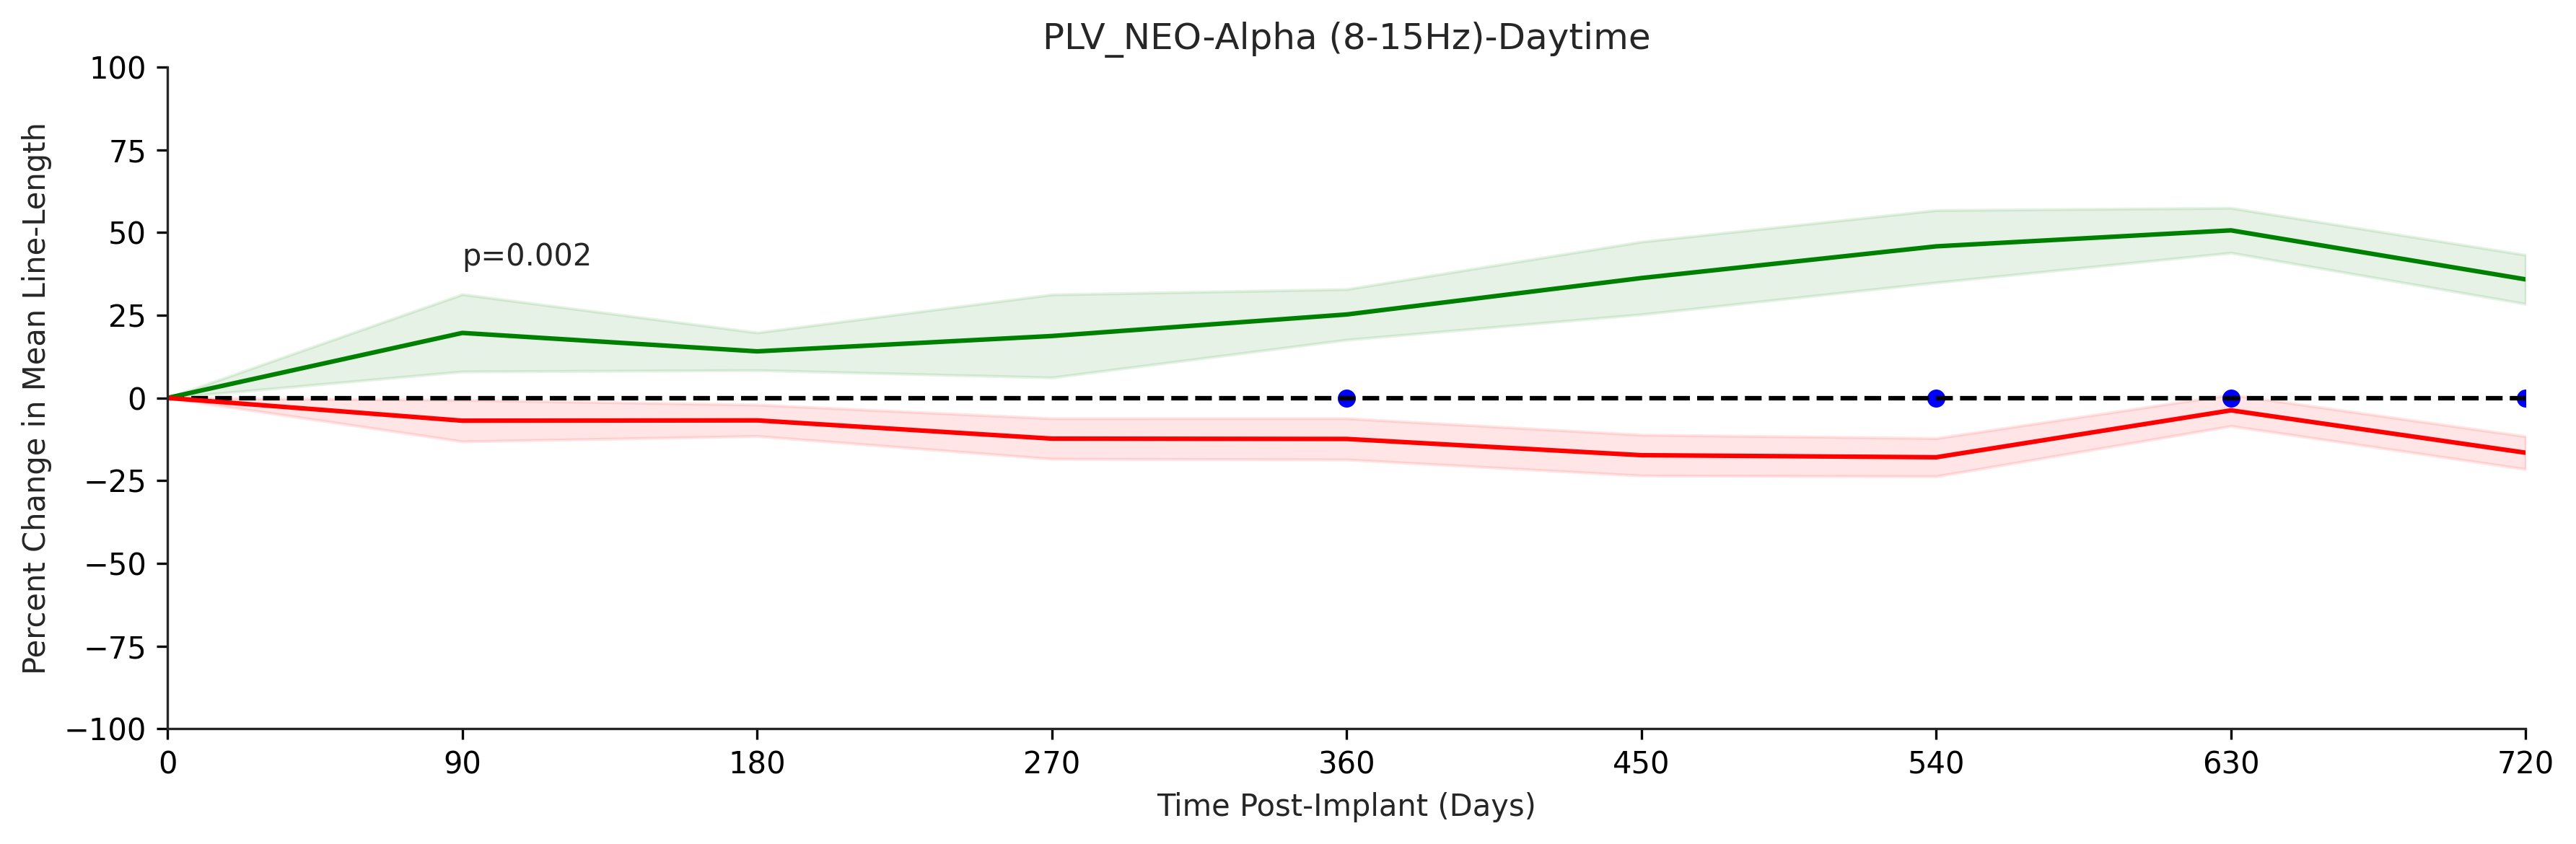

Functional Data Analysis: 0.0587


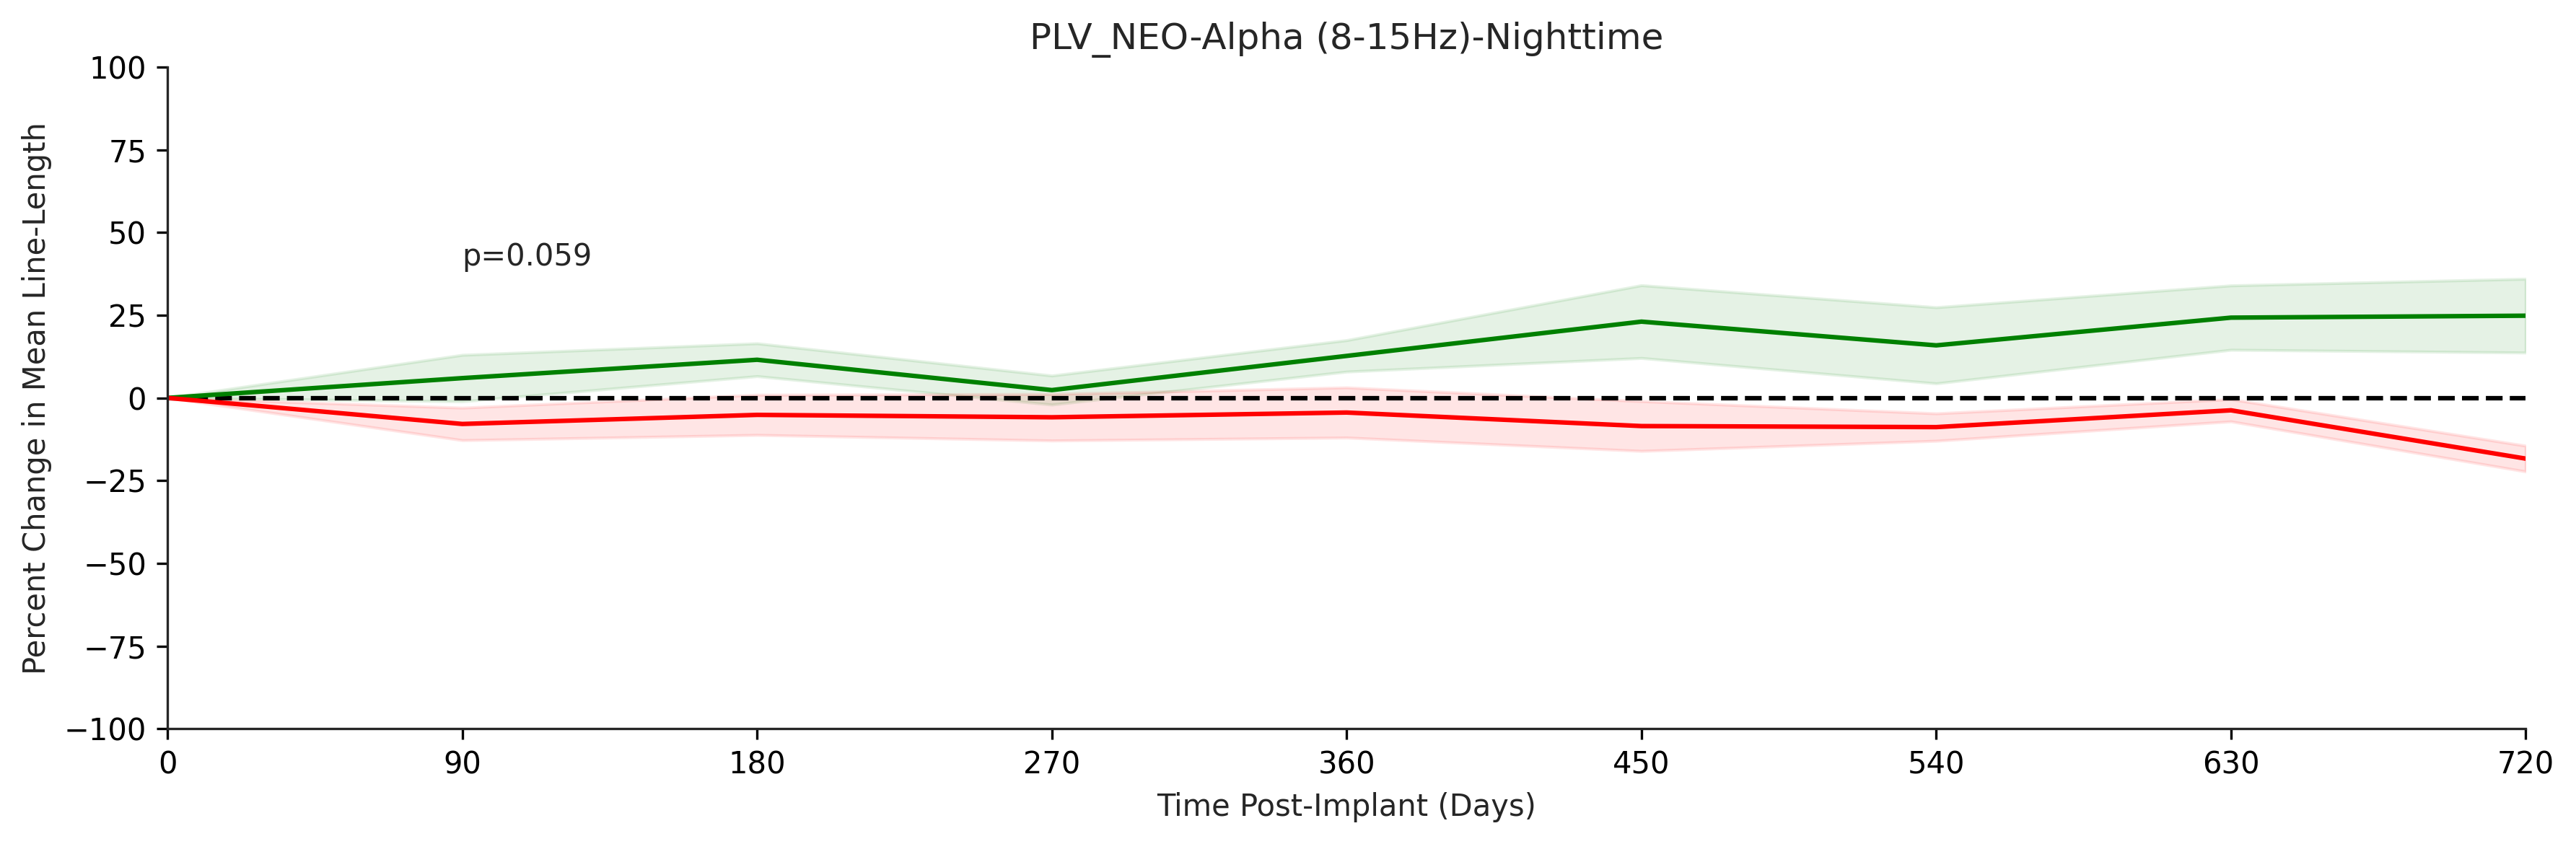

Functional Data Analysis: 0.0003


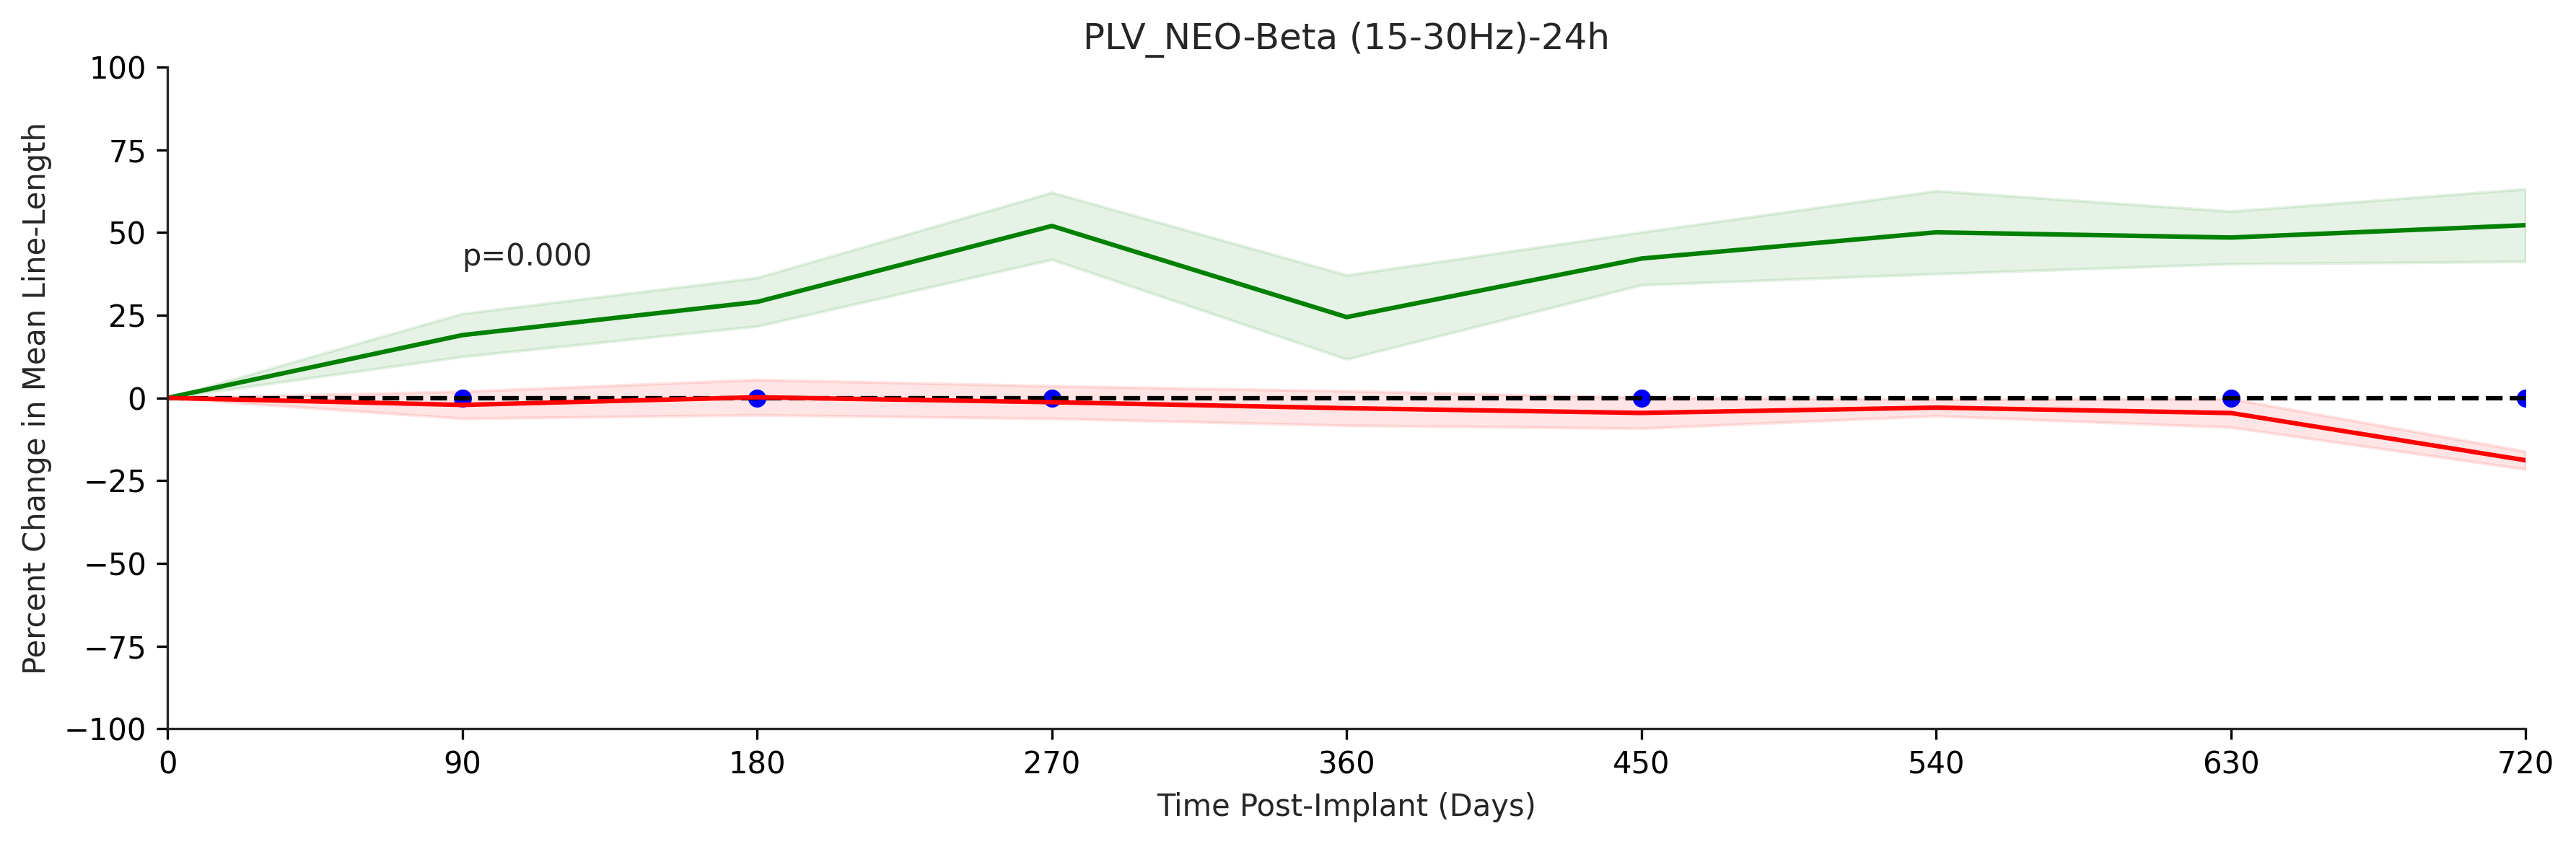

Functional Data Analysis: 0.0


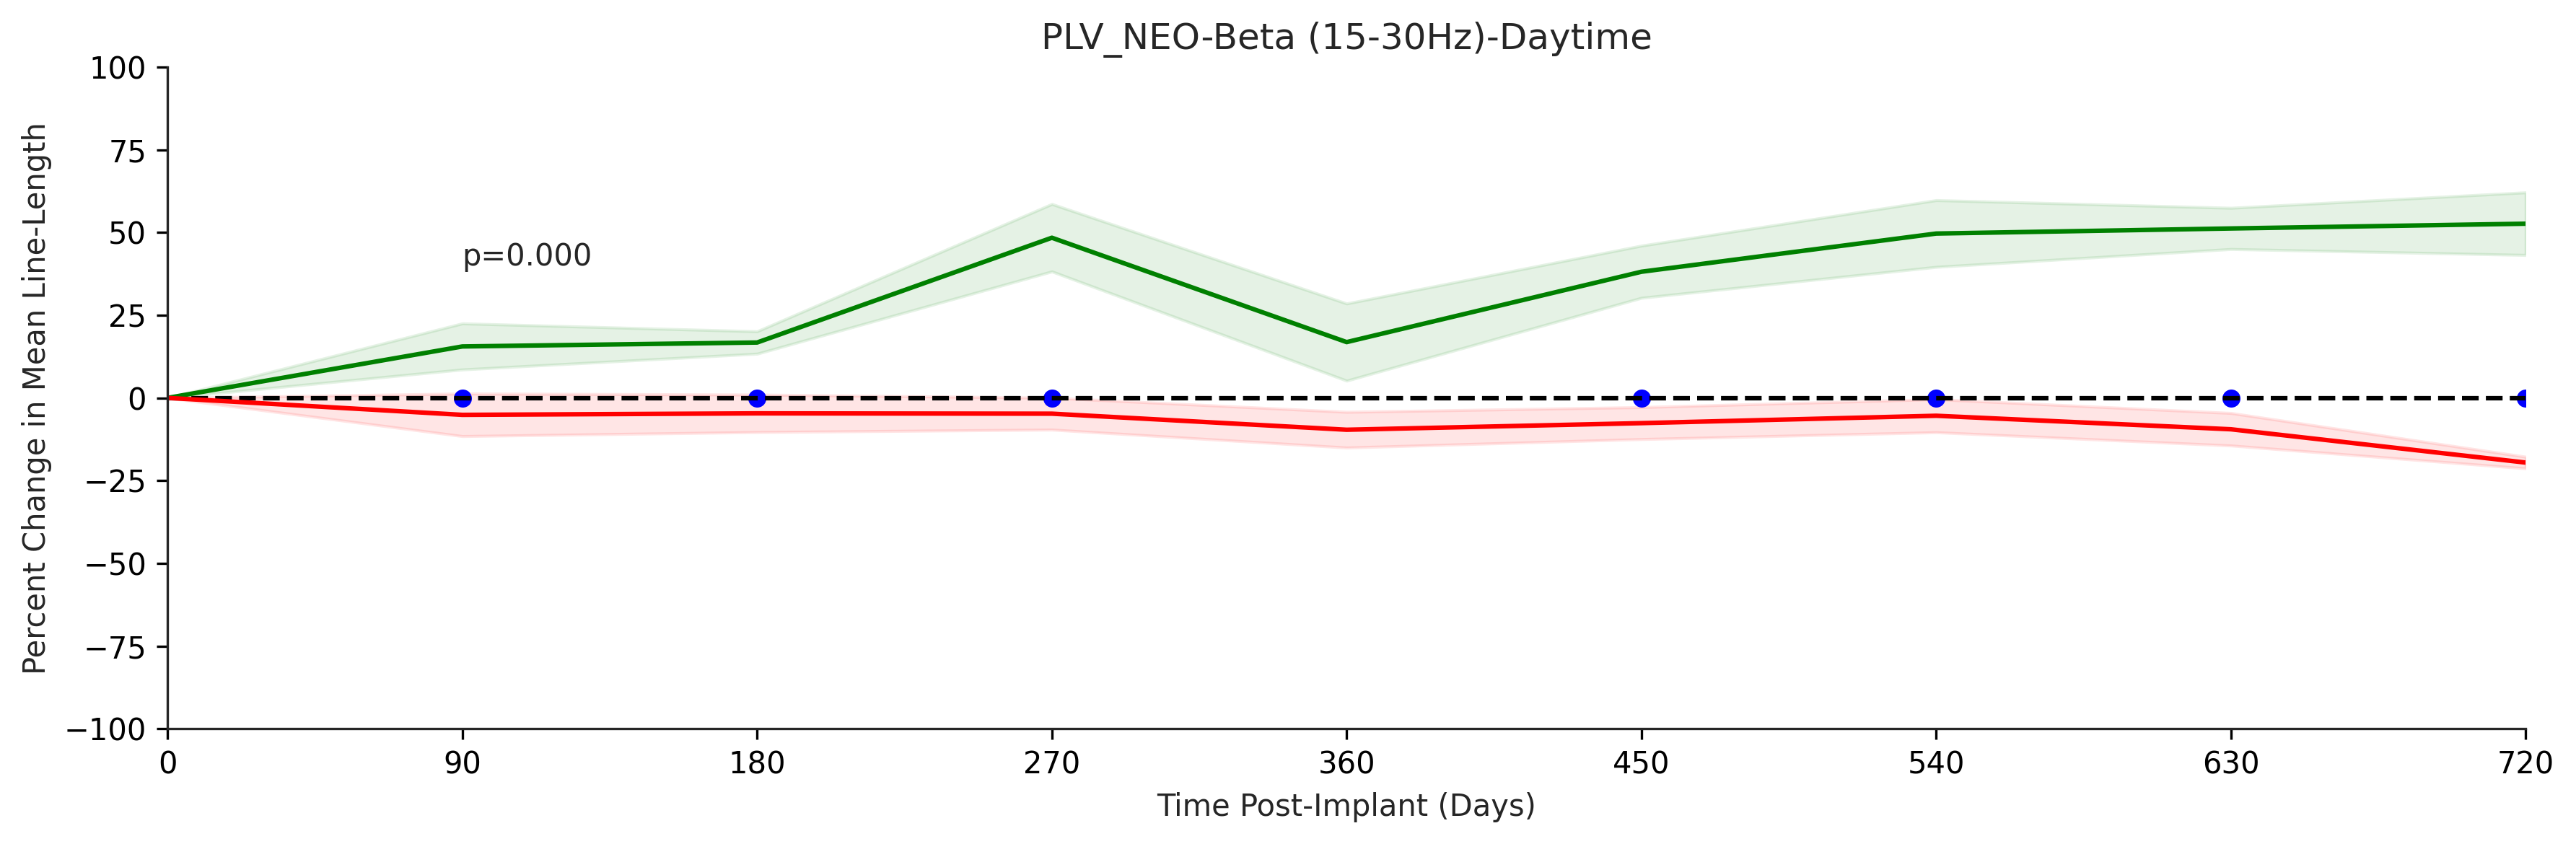

Functional Data Analysis: 0.0044


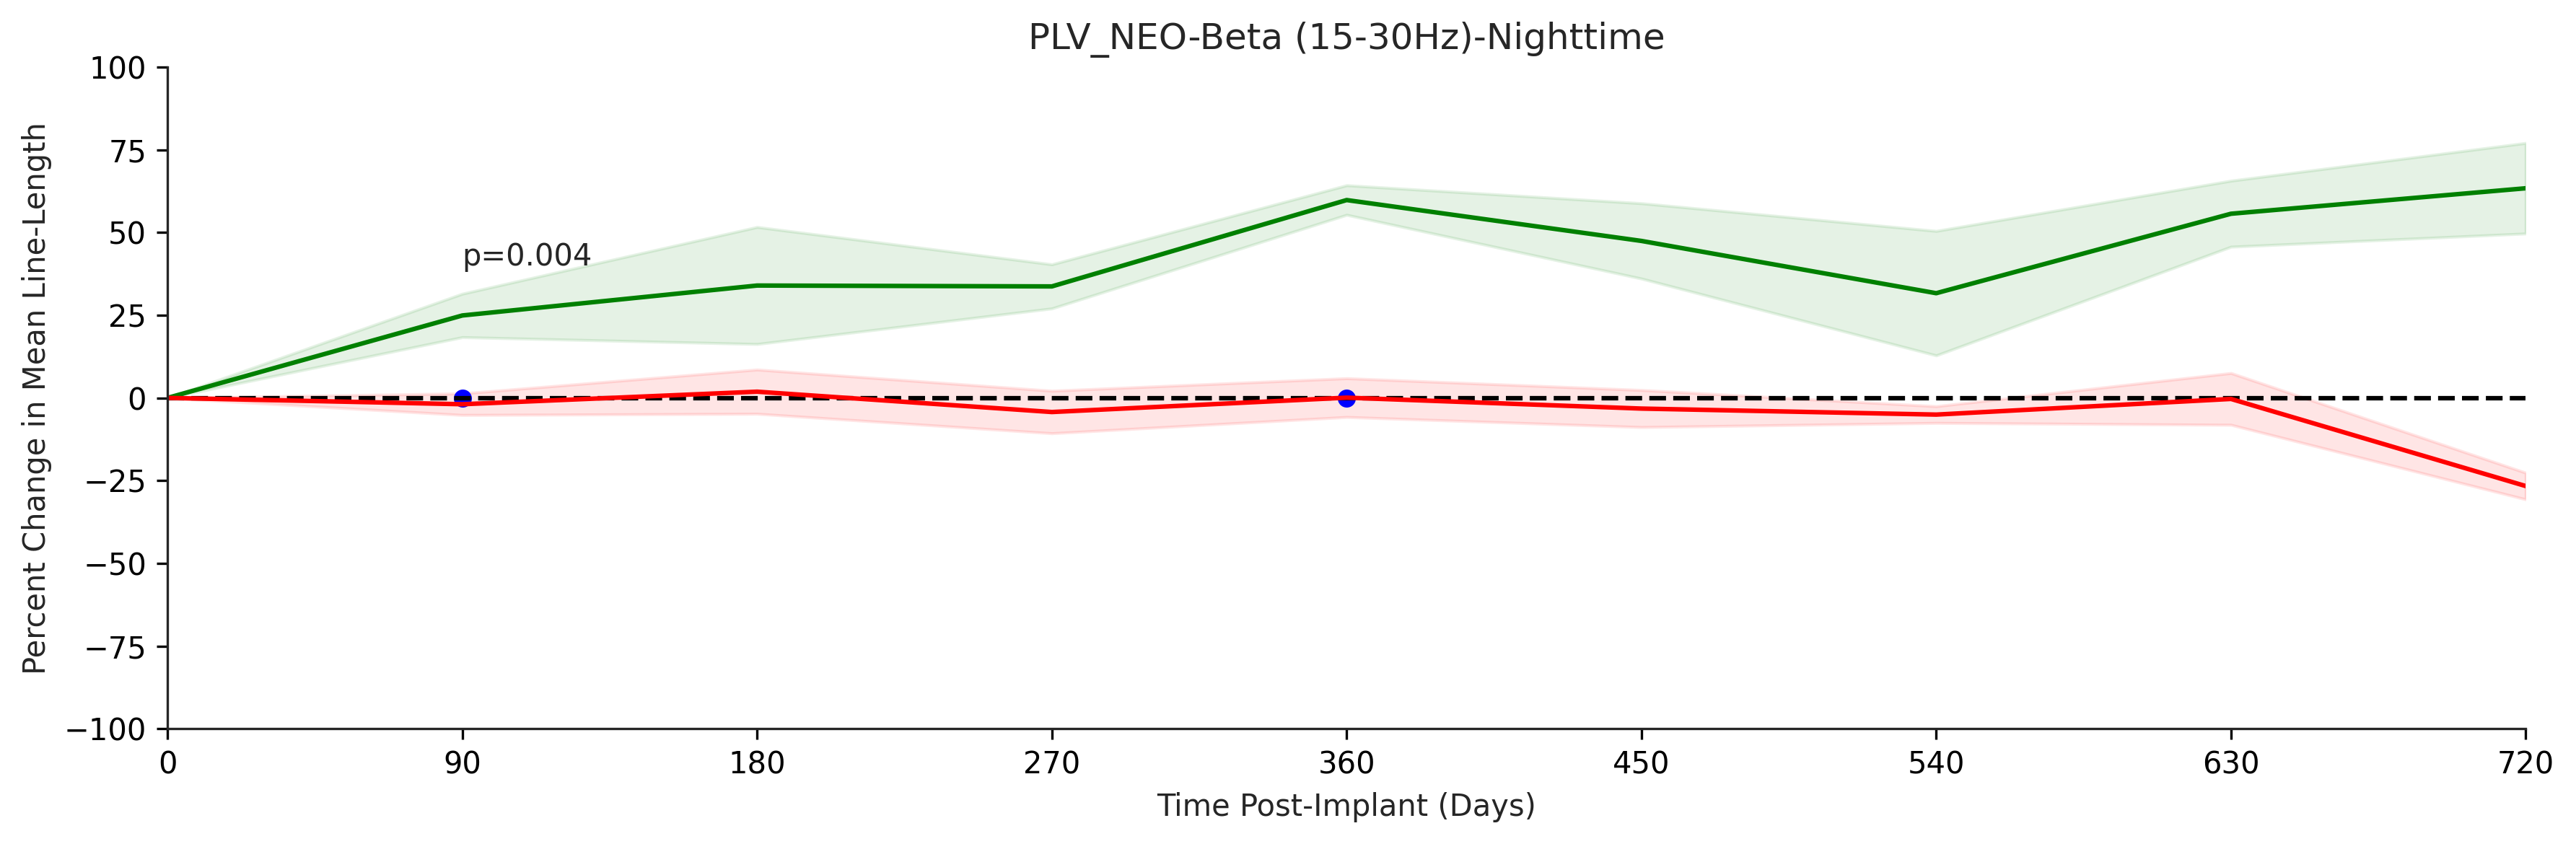

Functional Data Analysis: 0.027


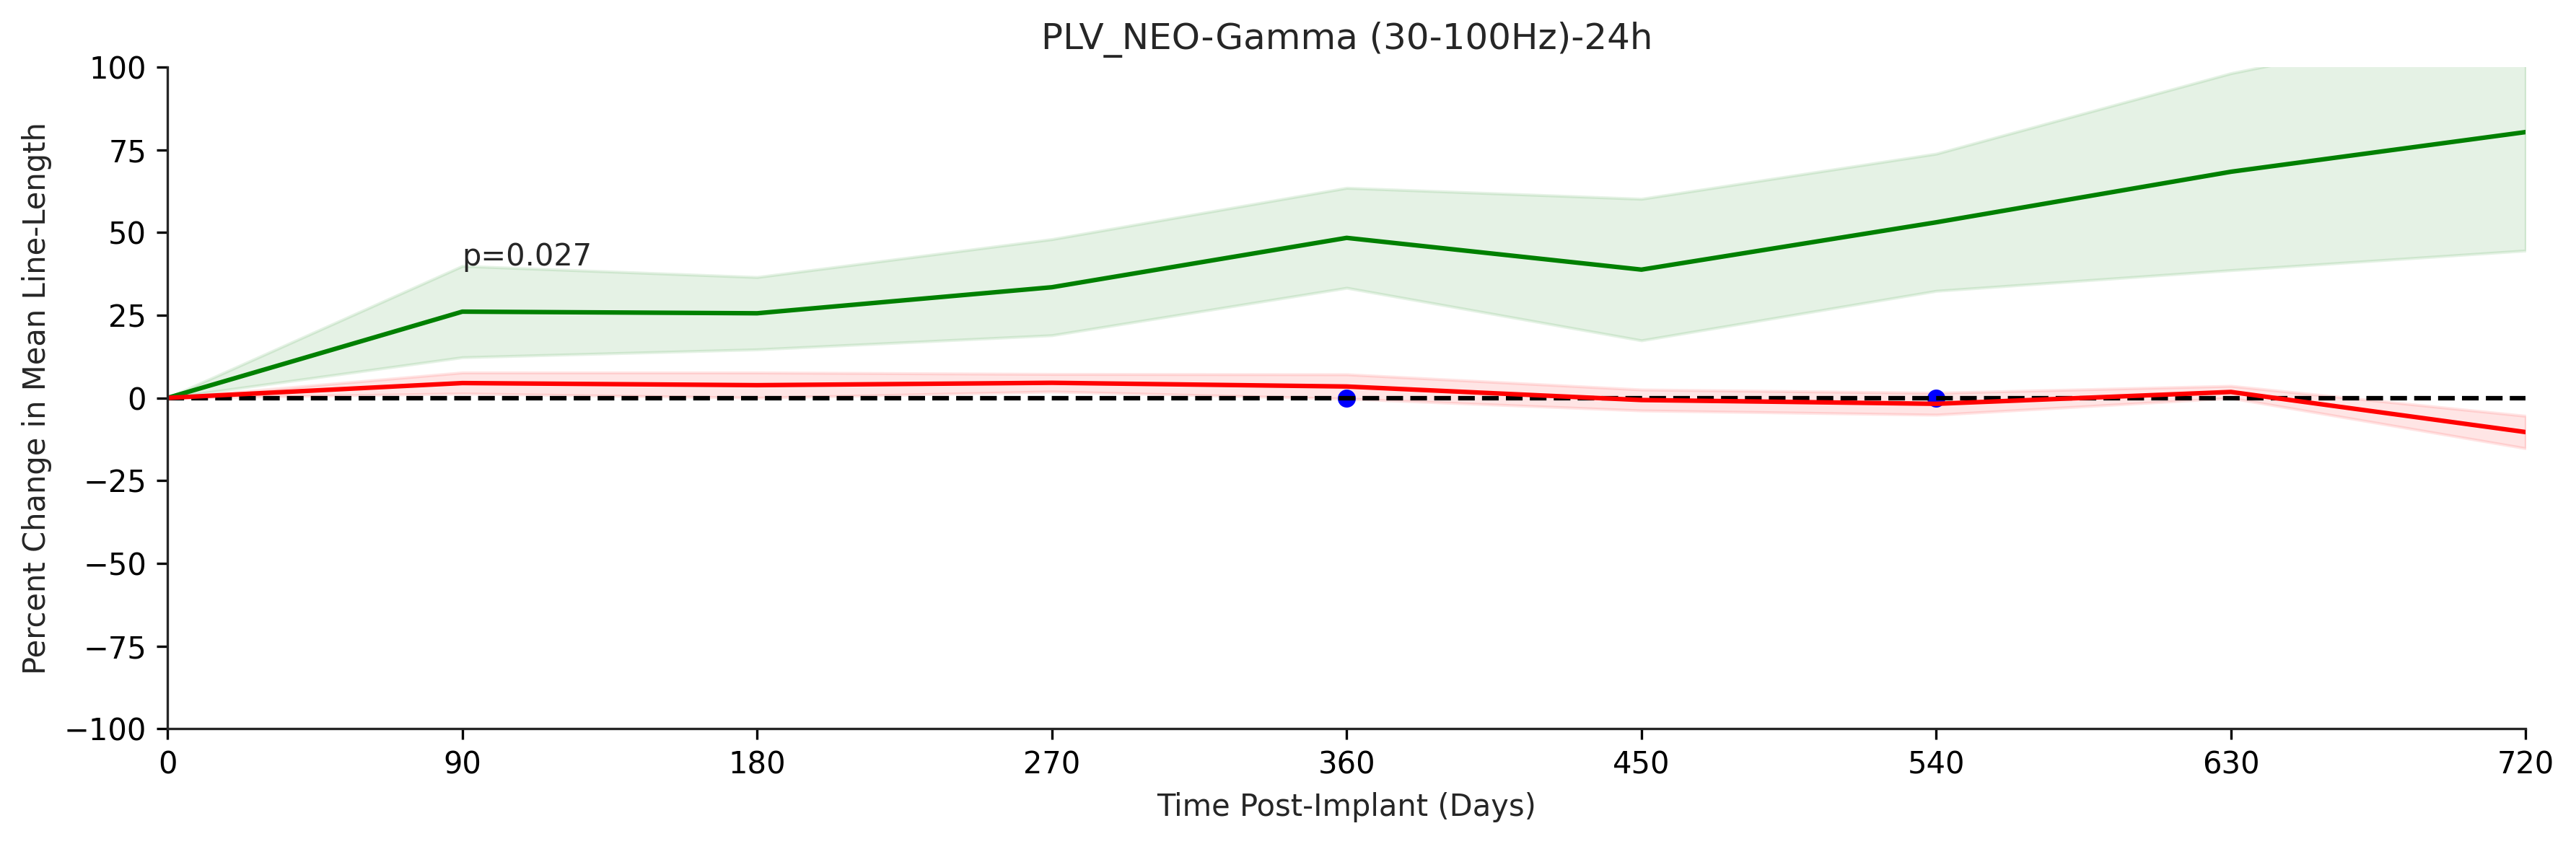

Functional Data Analysis: 0.0222


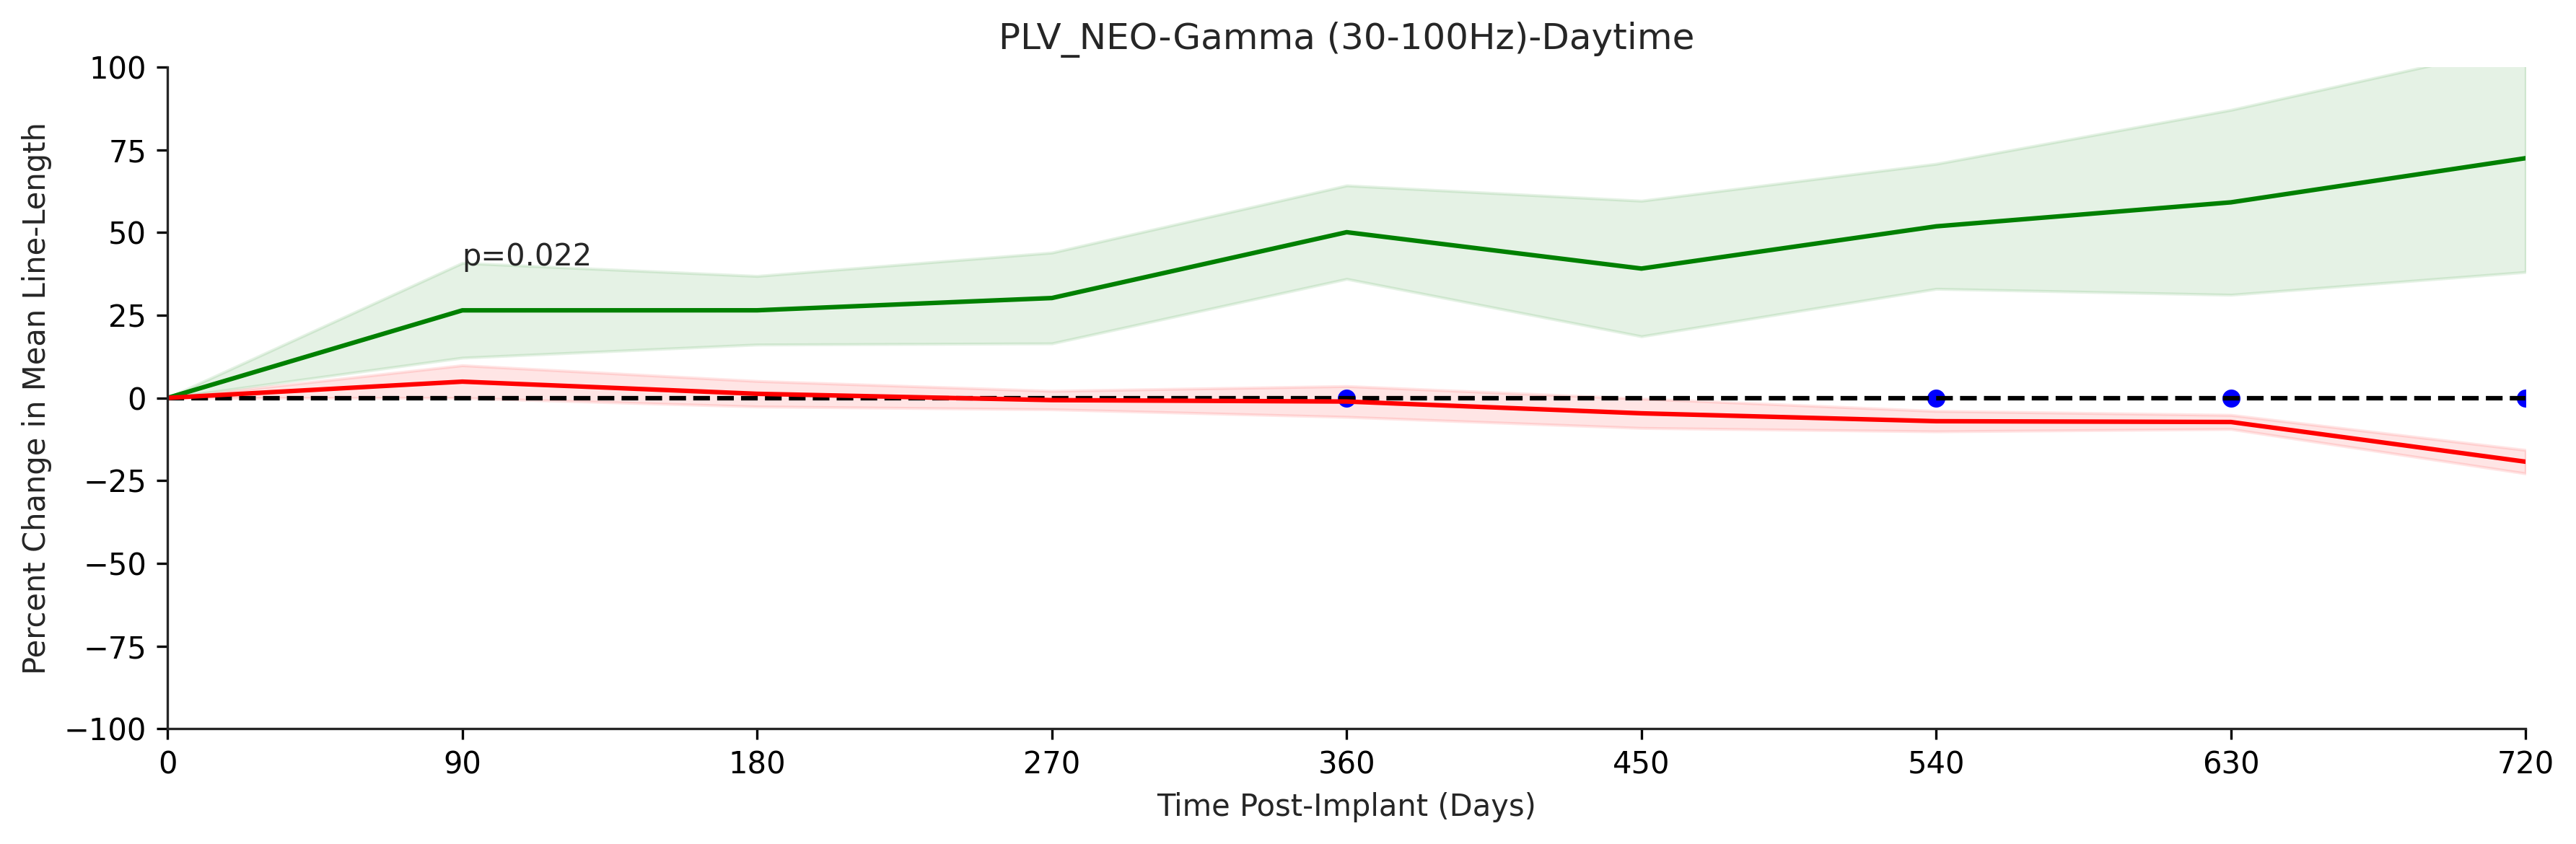

Functional Data Analysis: 0.0245


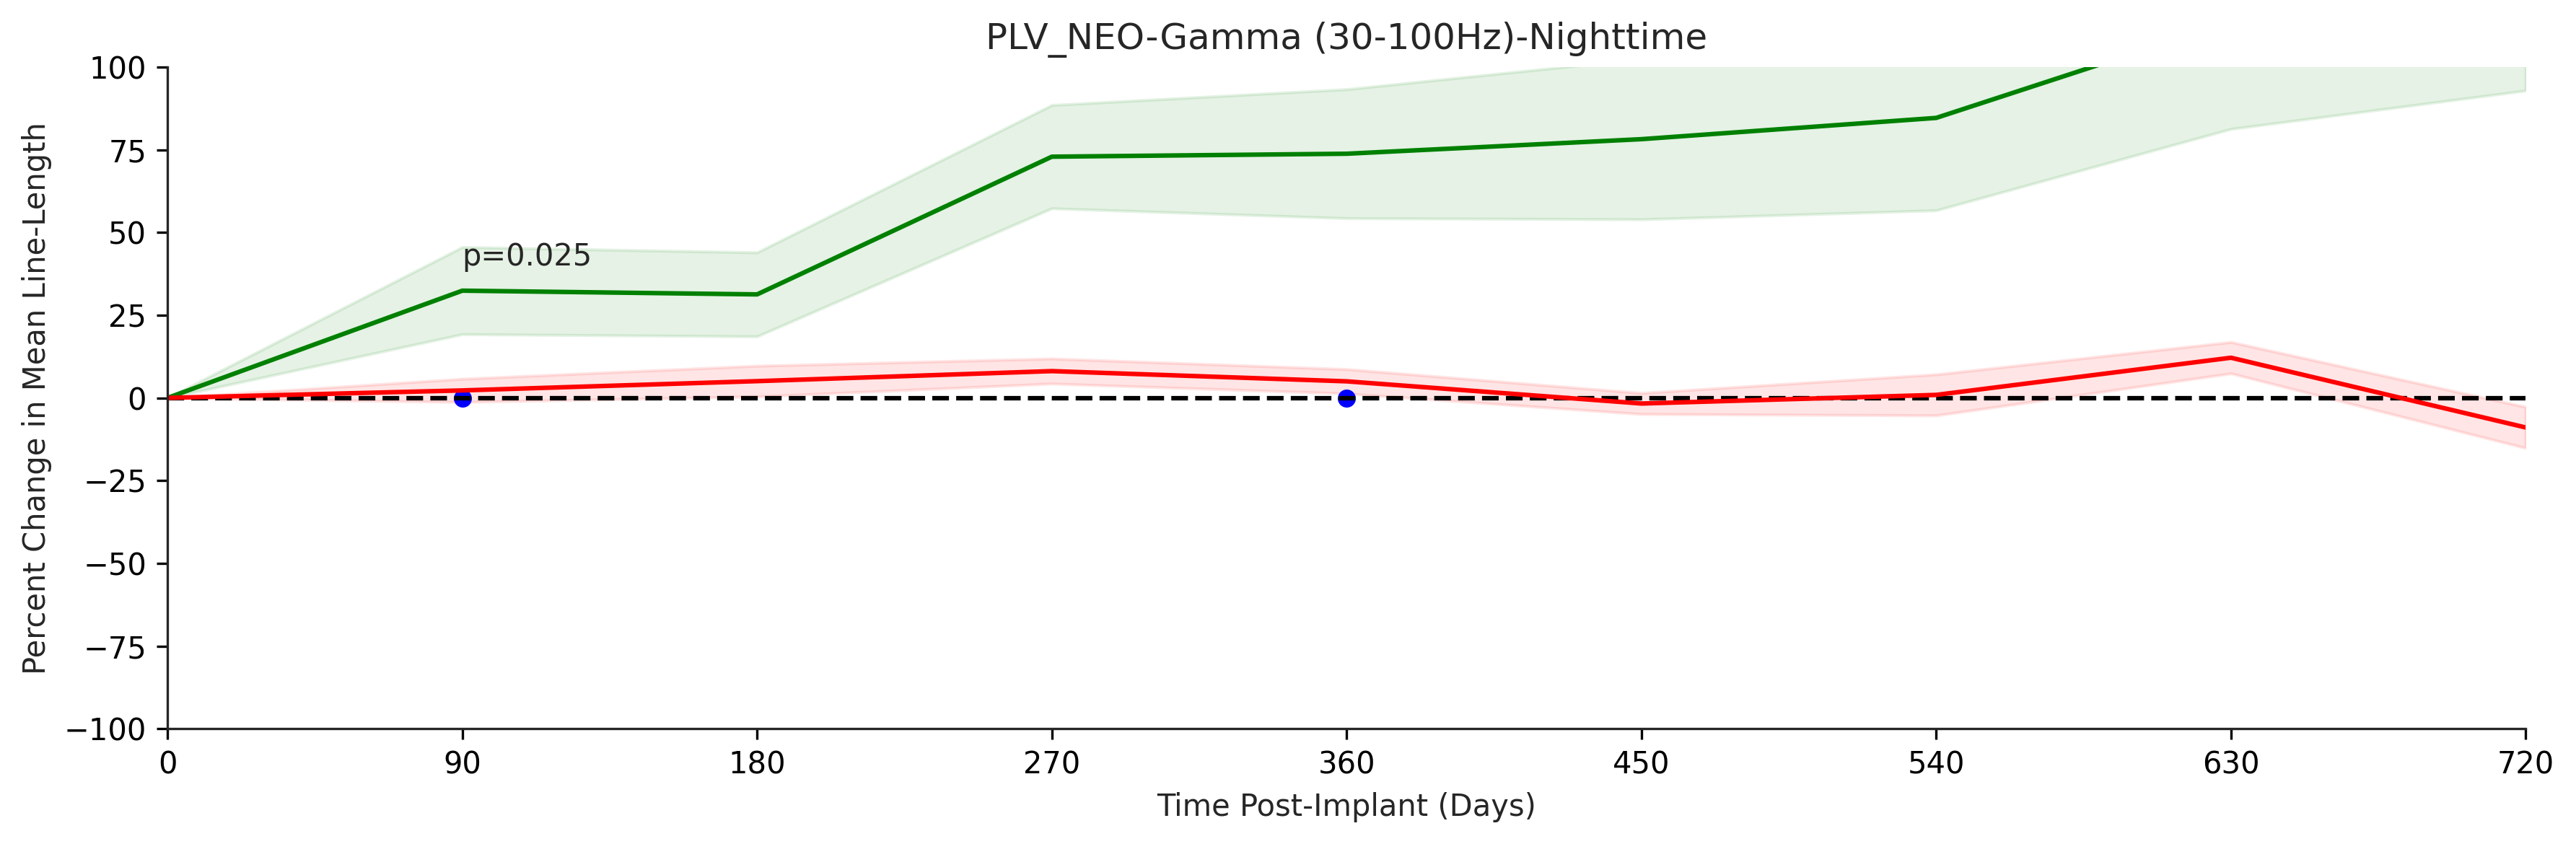

Functional Data Analysis: 0.0246


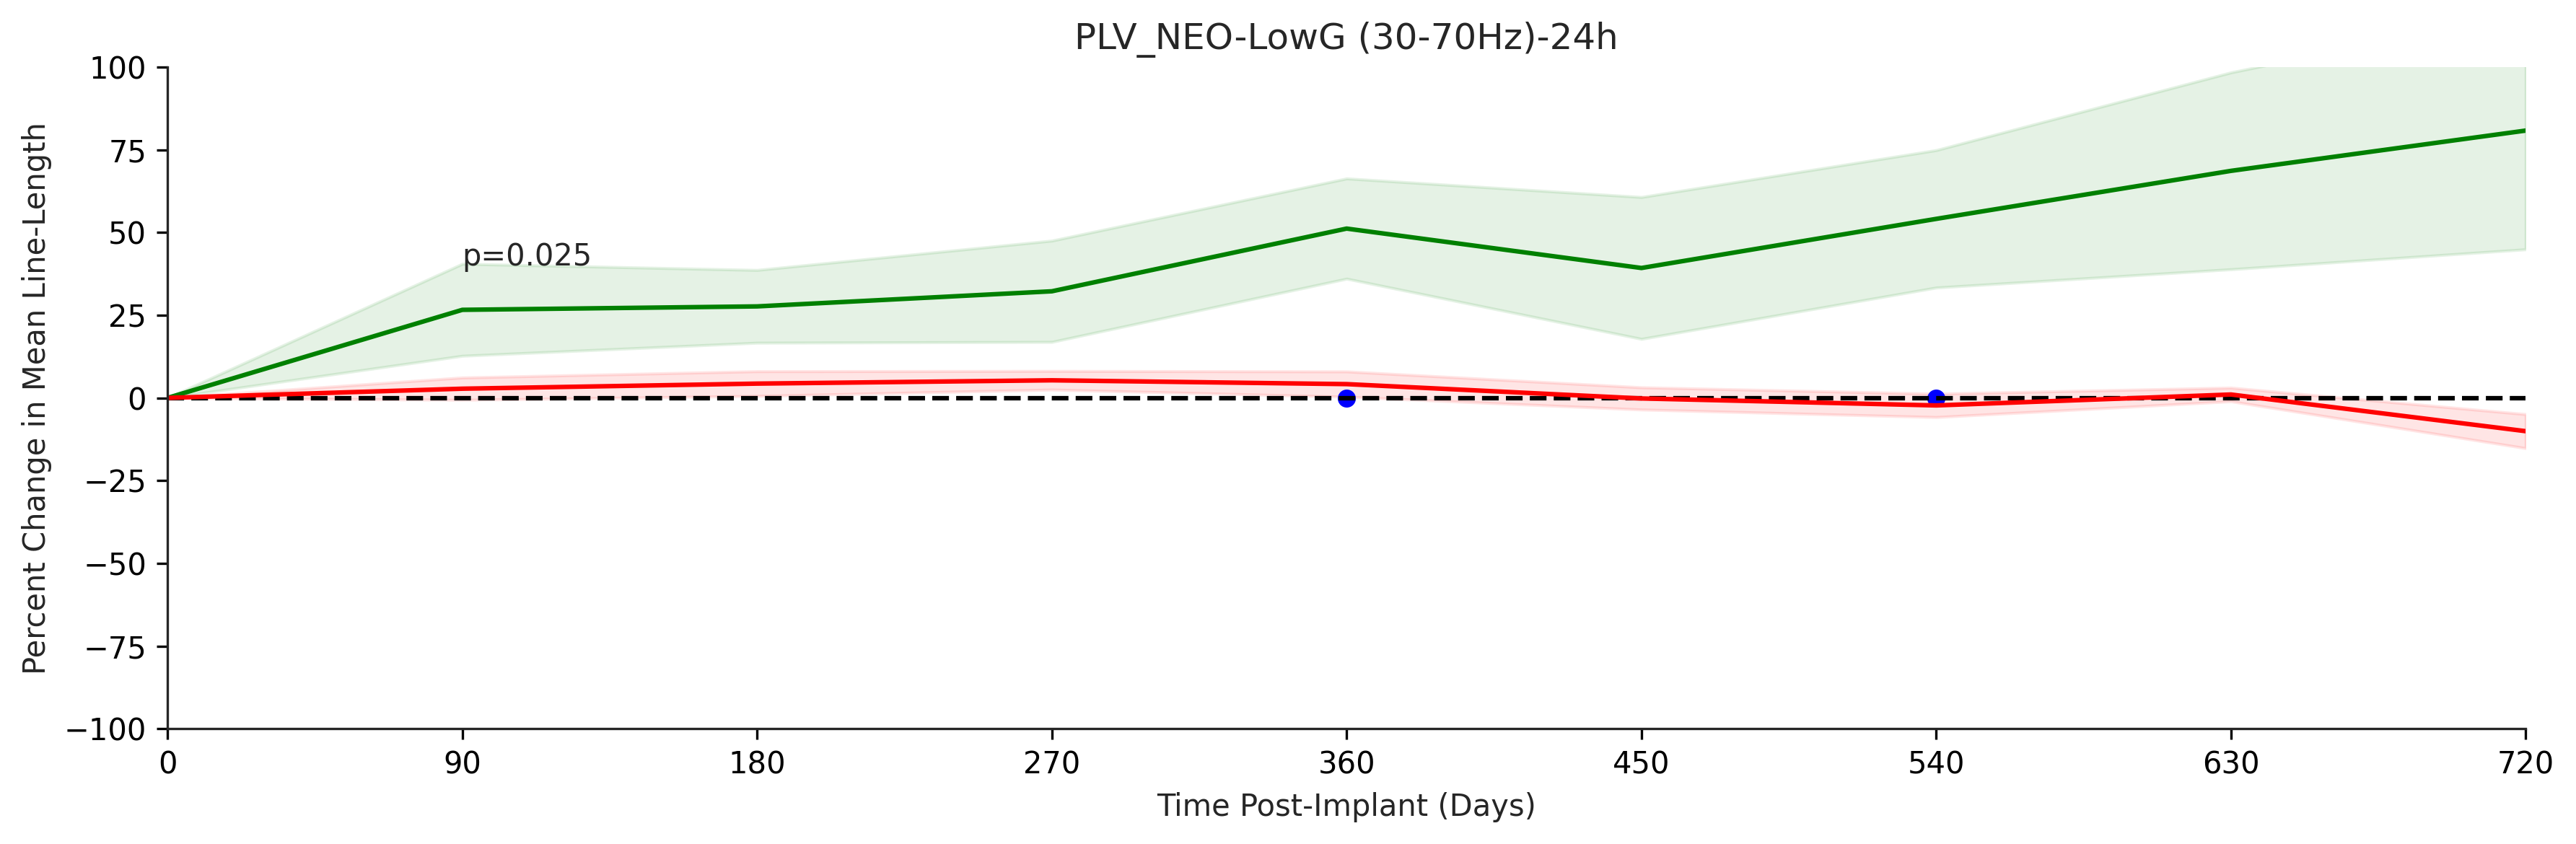

Functional Data Analysis: 0.0205


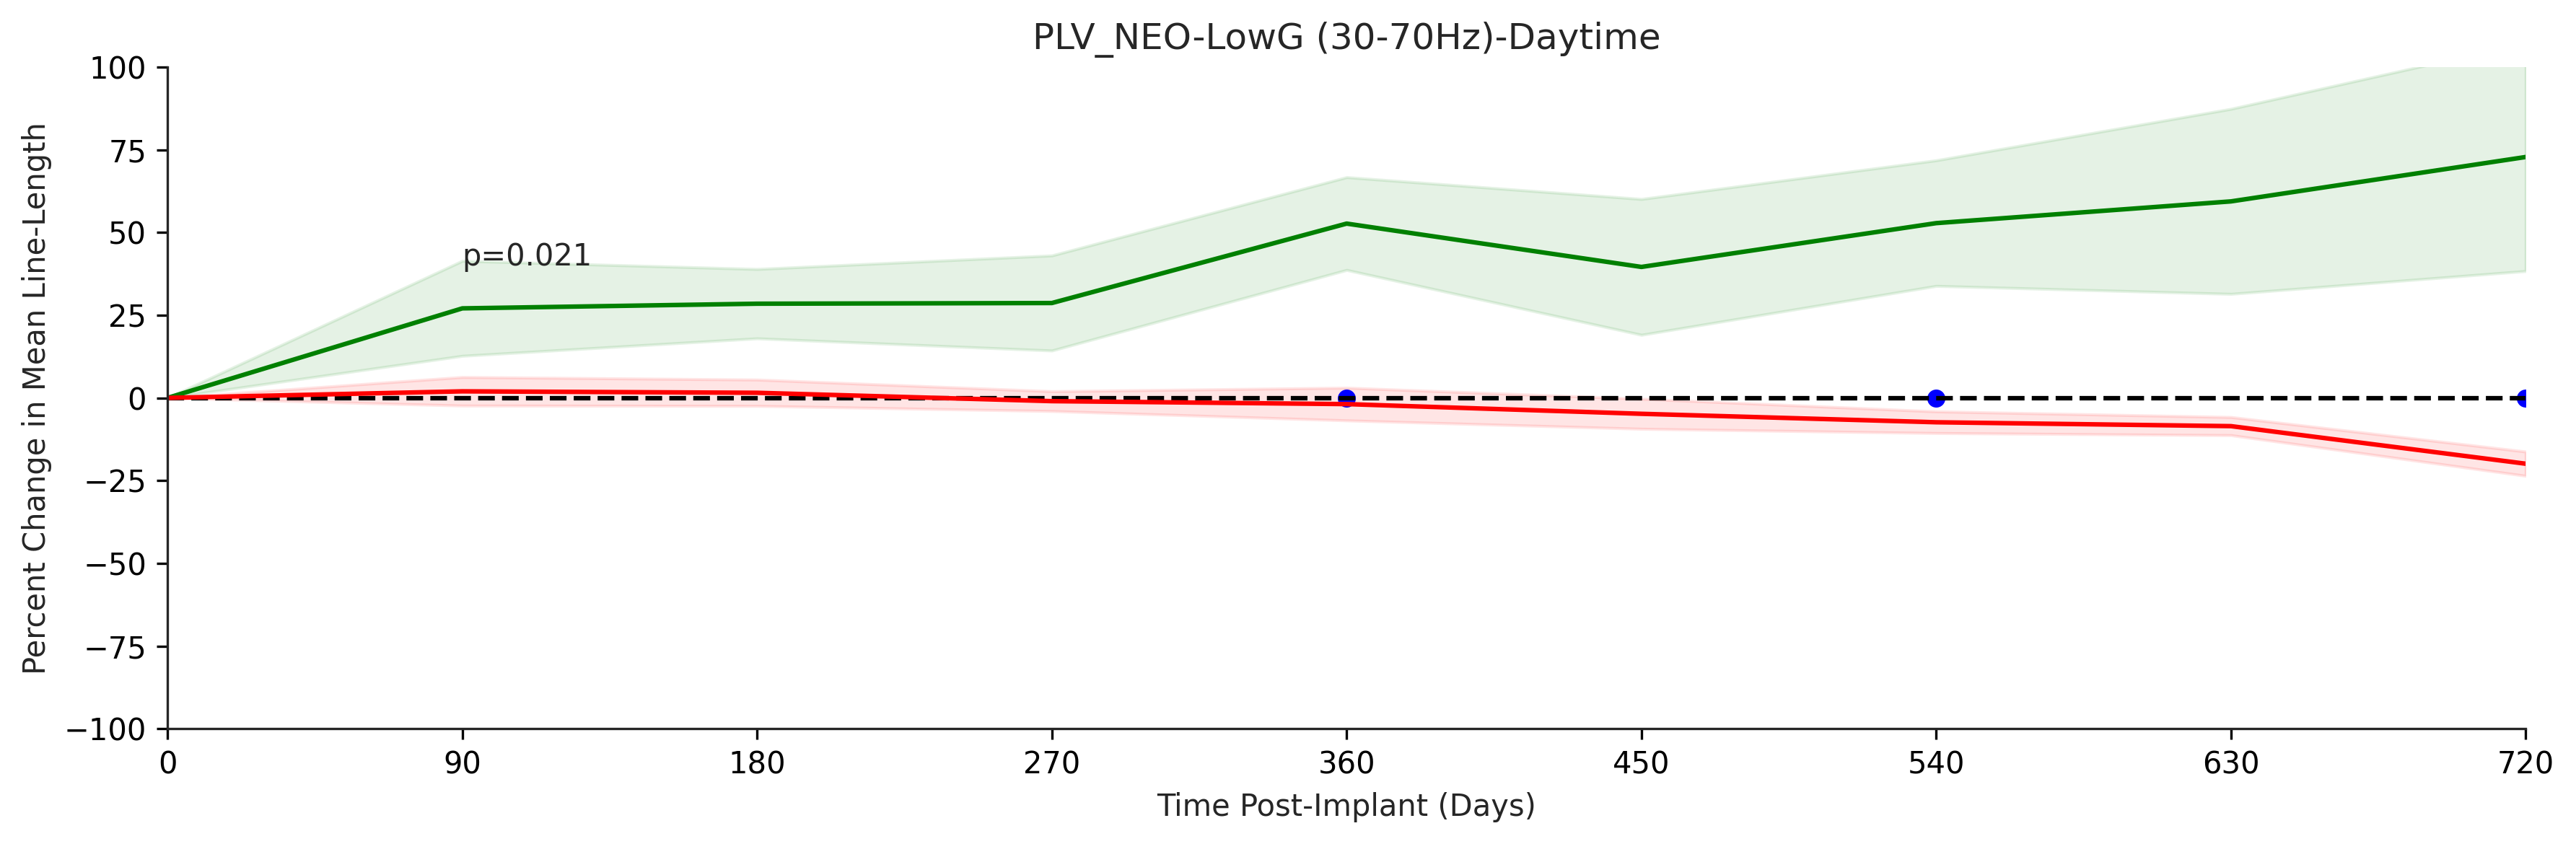

Functional Data Analysis: 0.0229


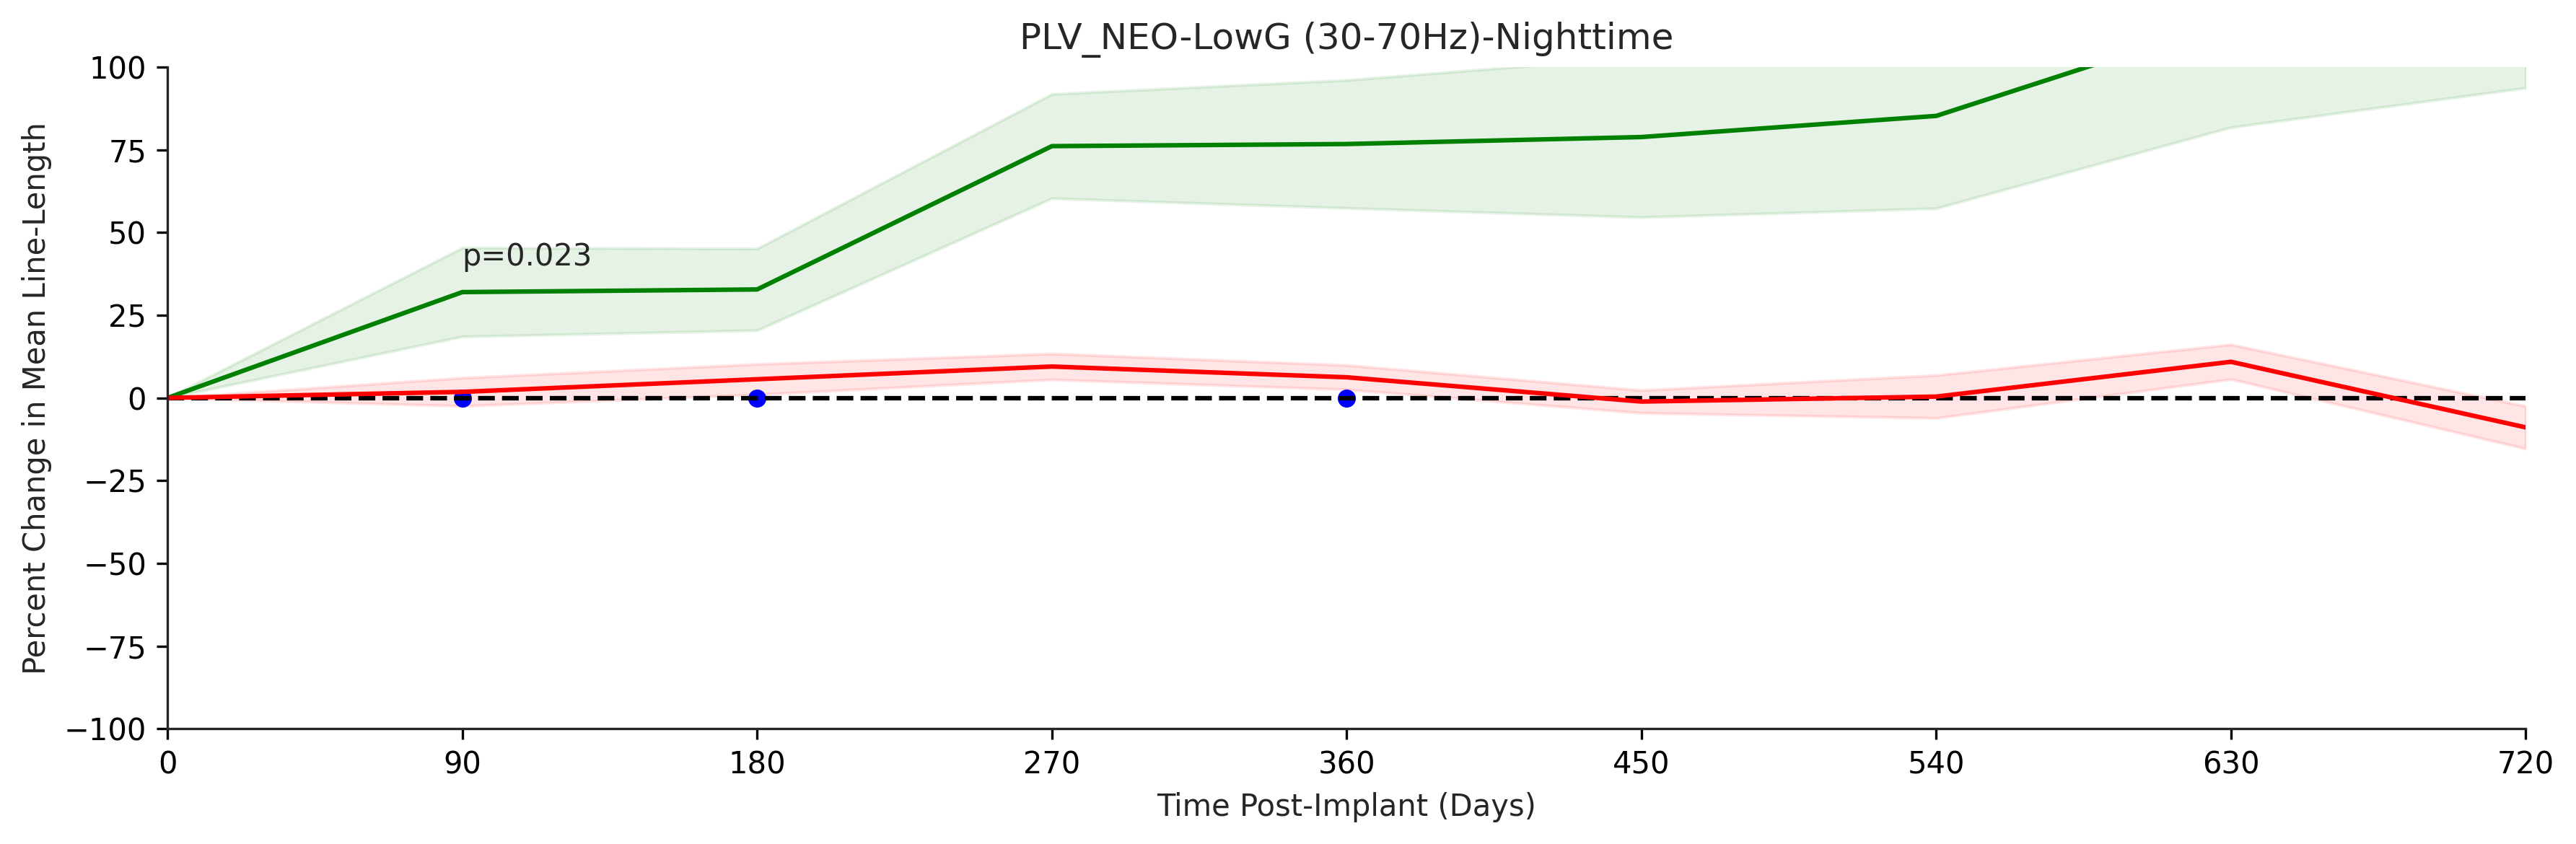

Functional Data Analysis: 0.1935


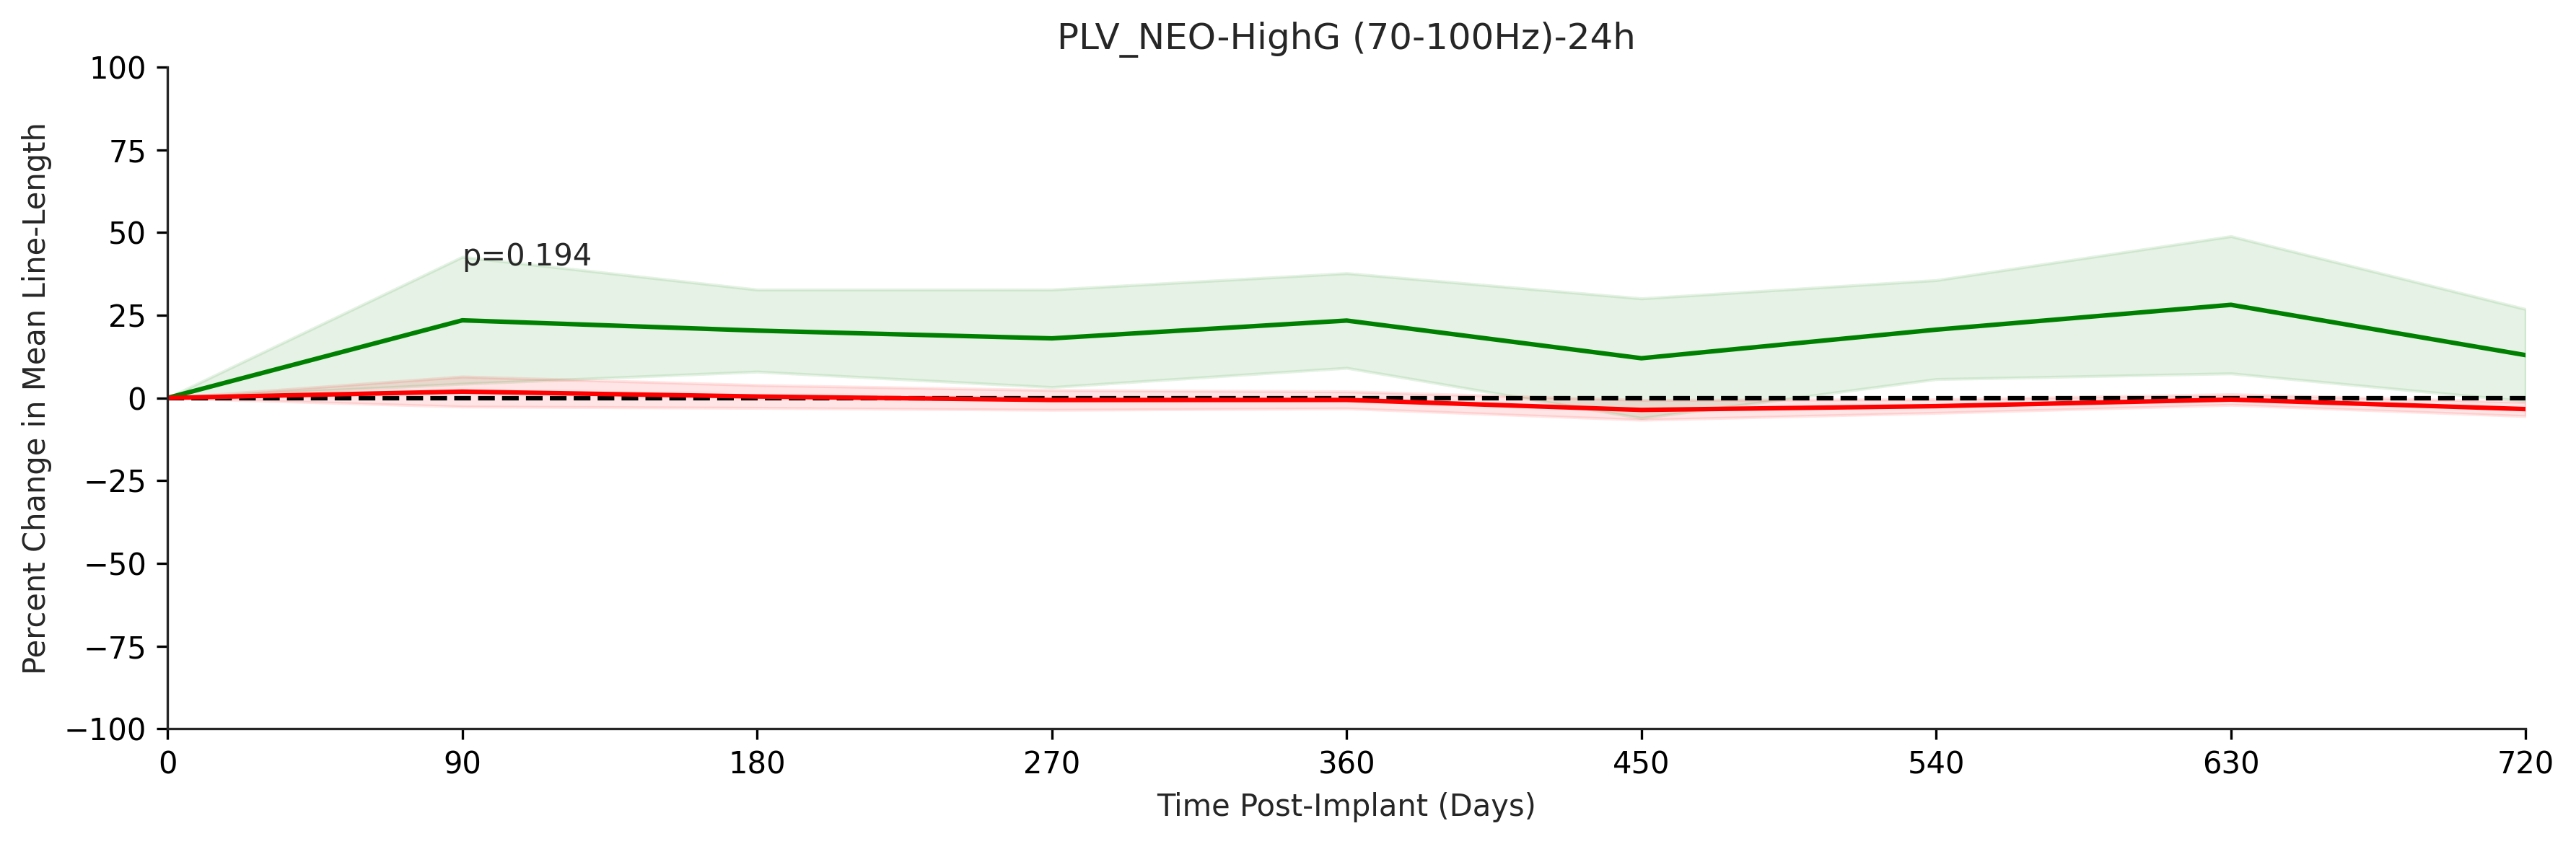

Functional Data Analysis: 0.1045


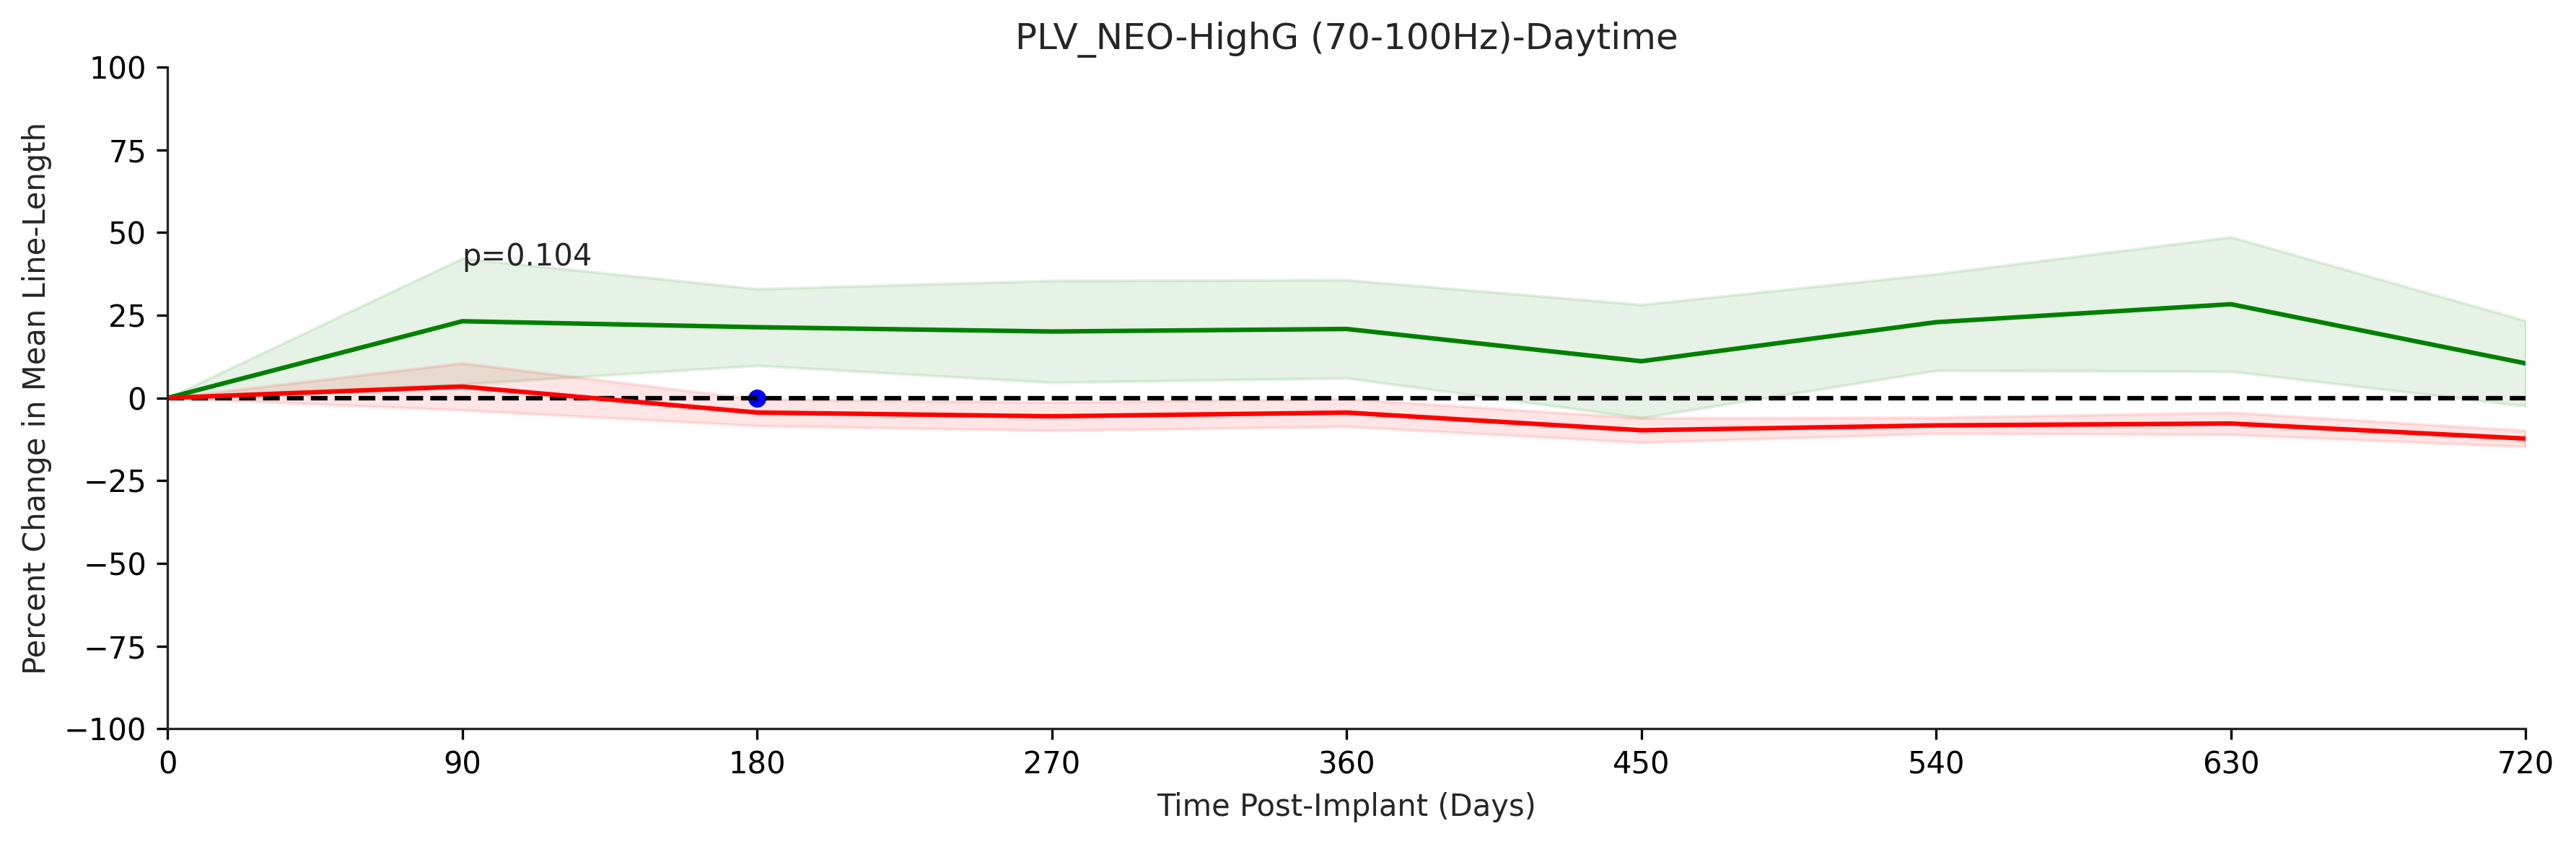

Functional Data Analysis: 0.0463


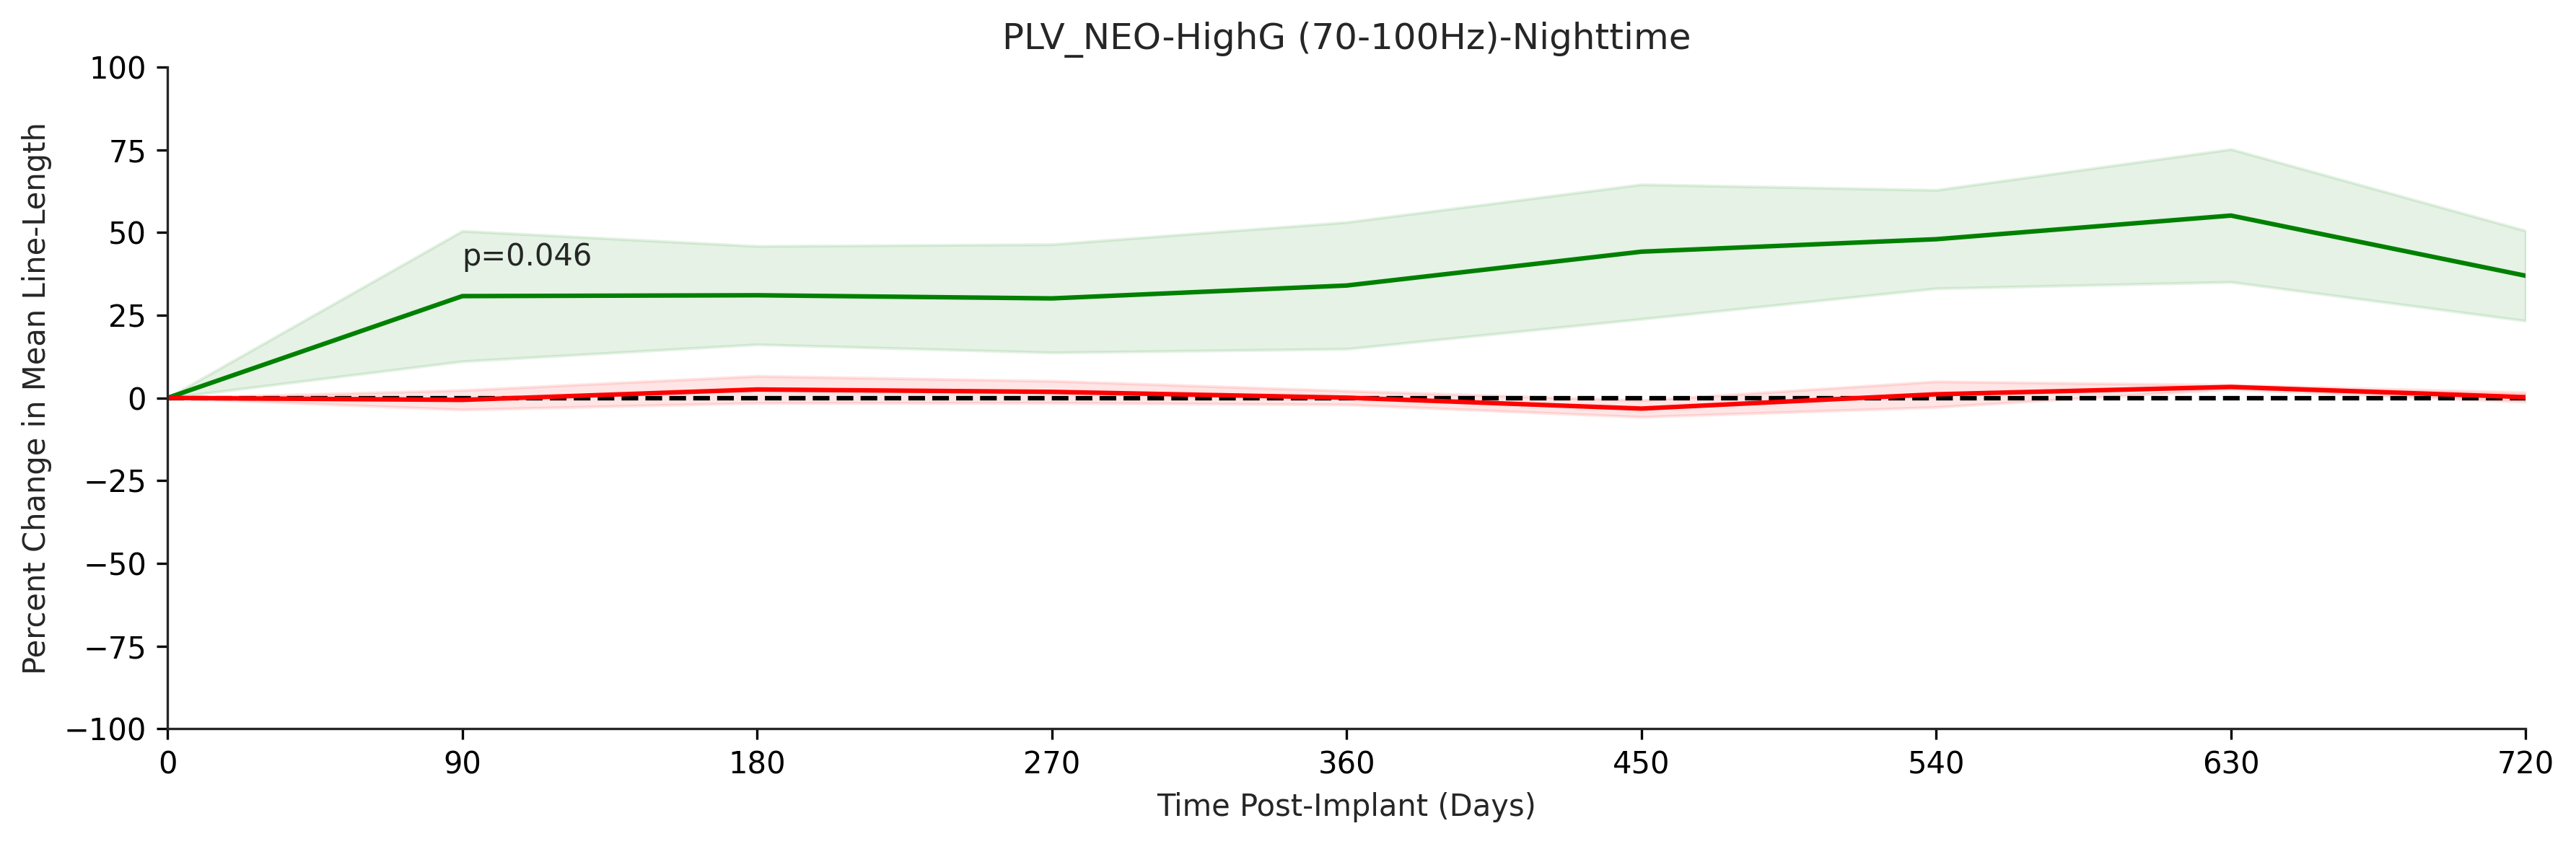

Functional Data Analysis: 0.349


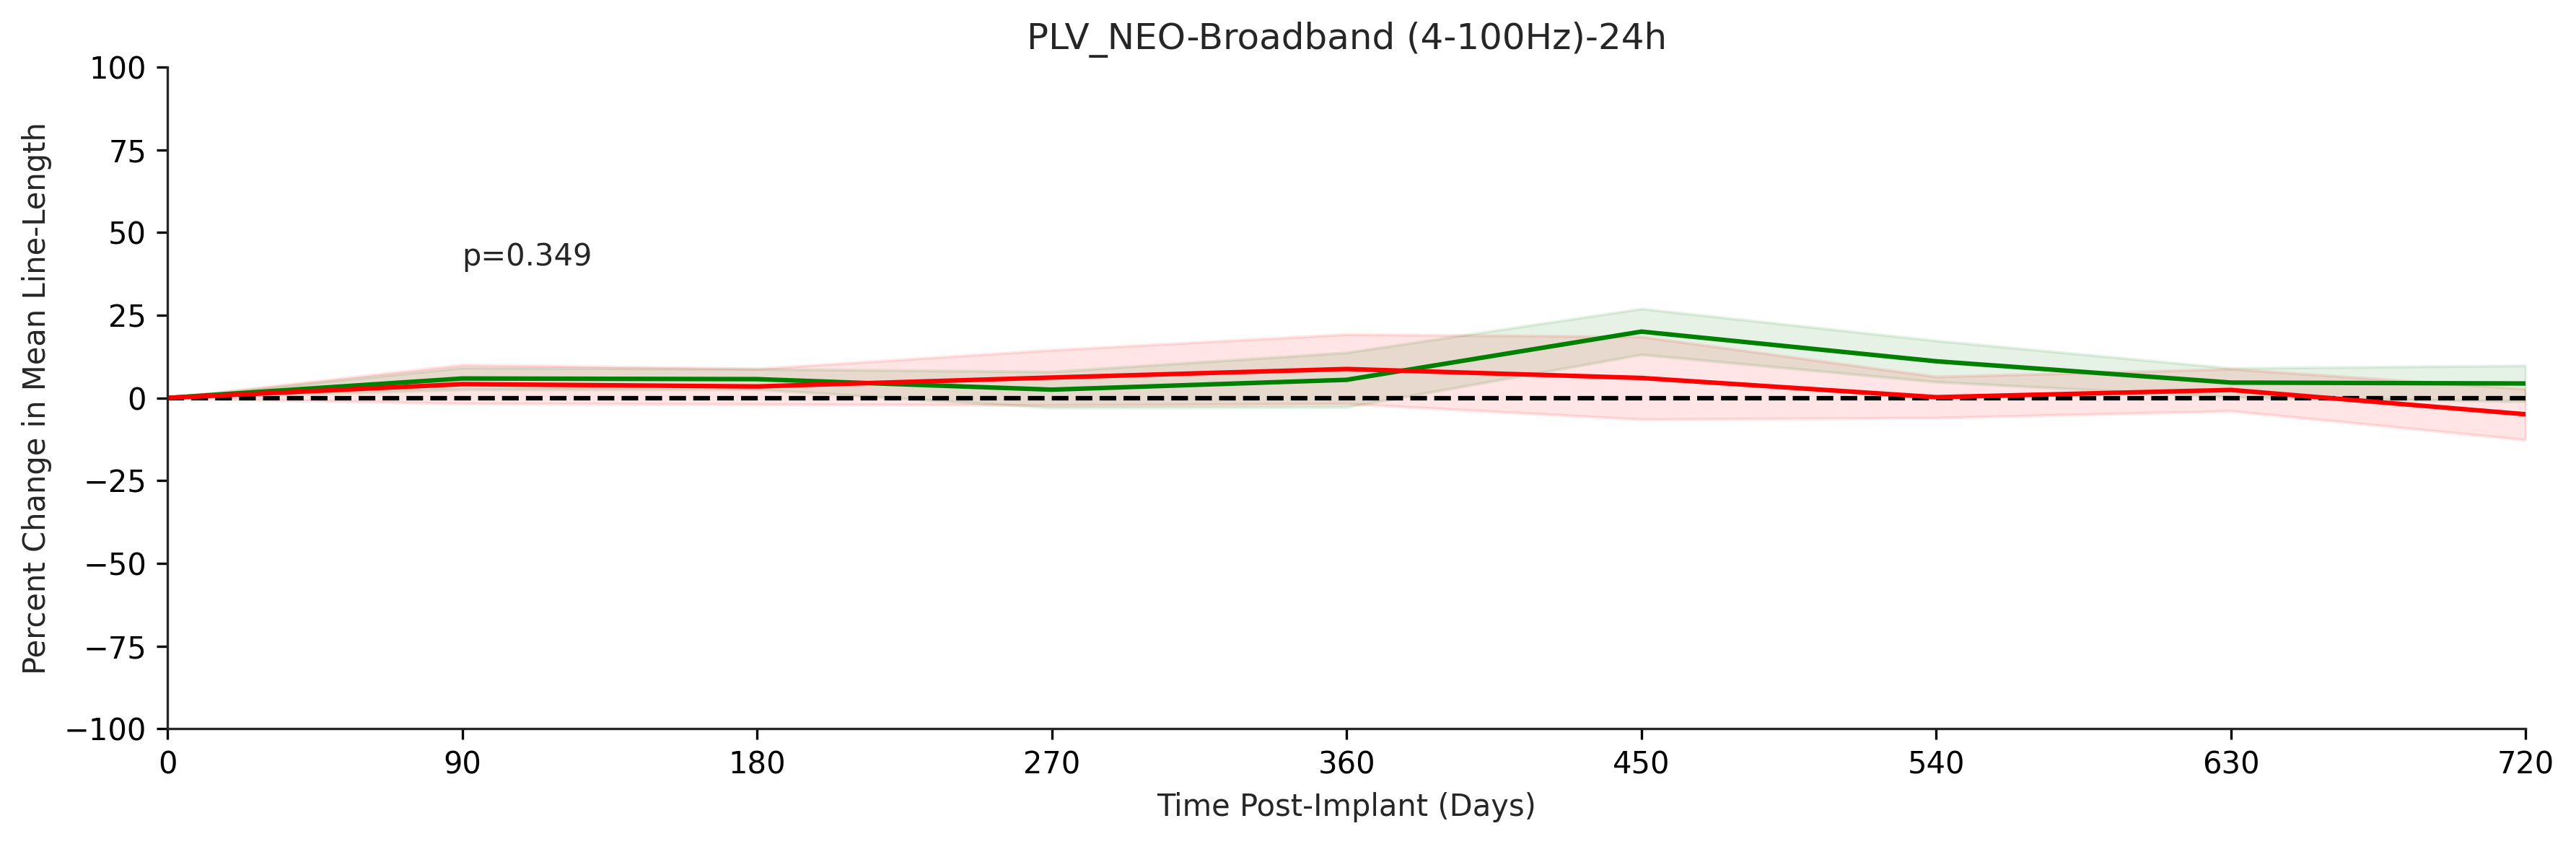

Functional Data Analysis: 0.2298


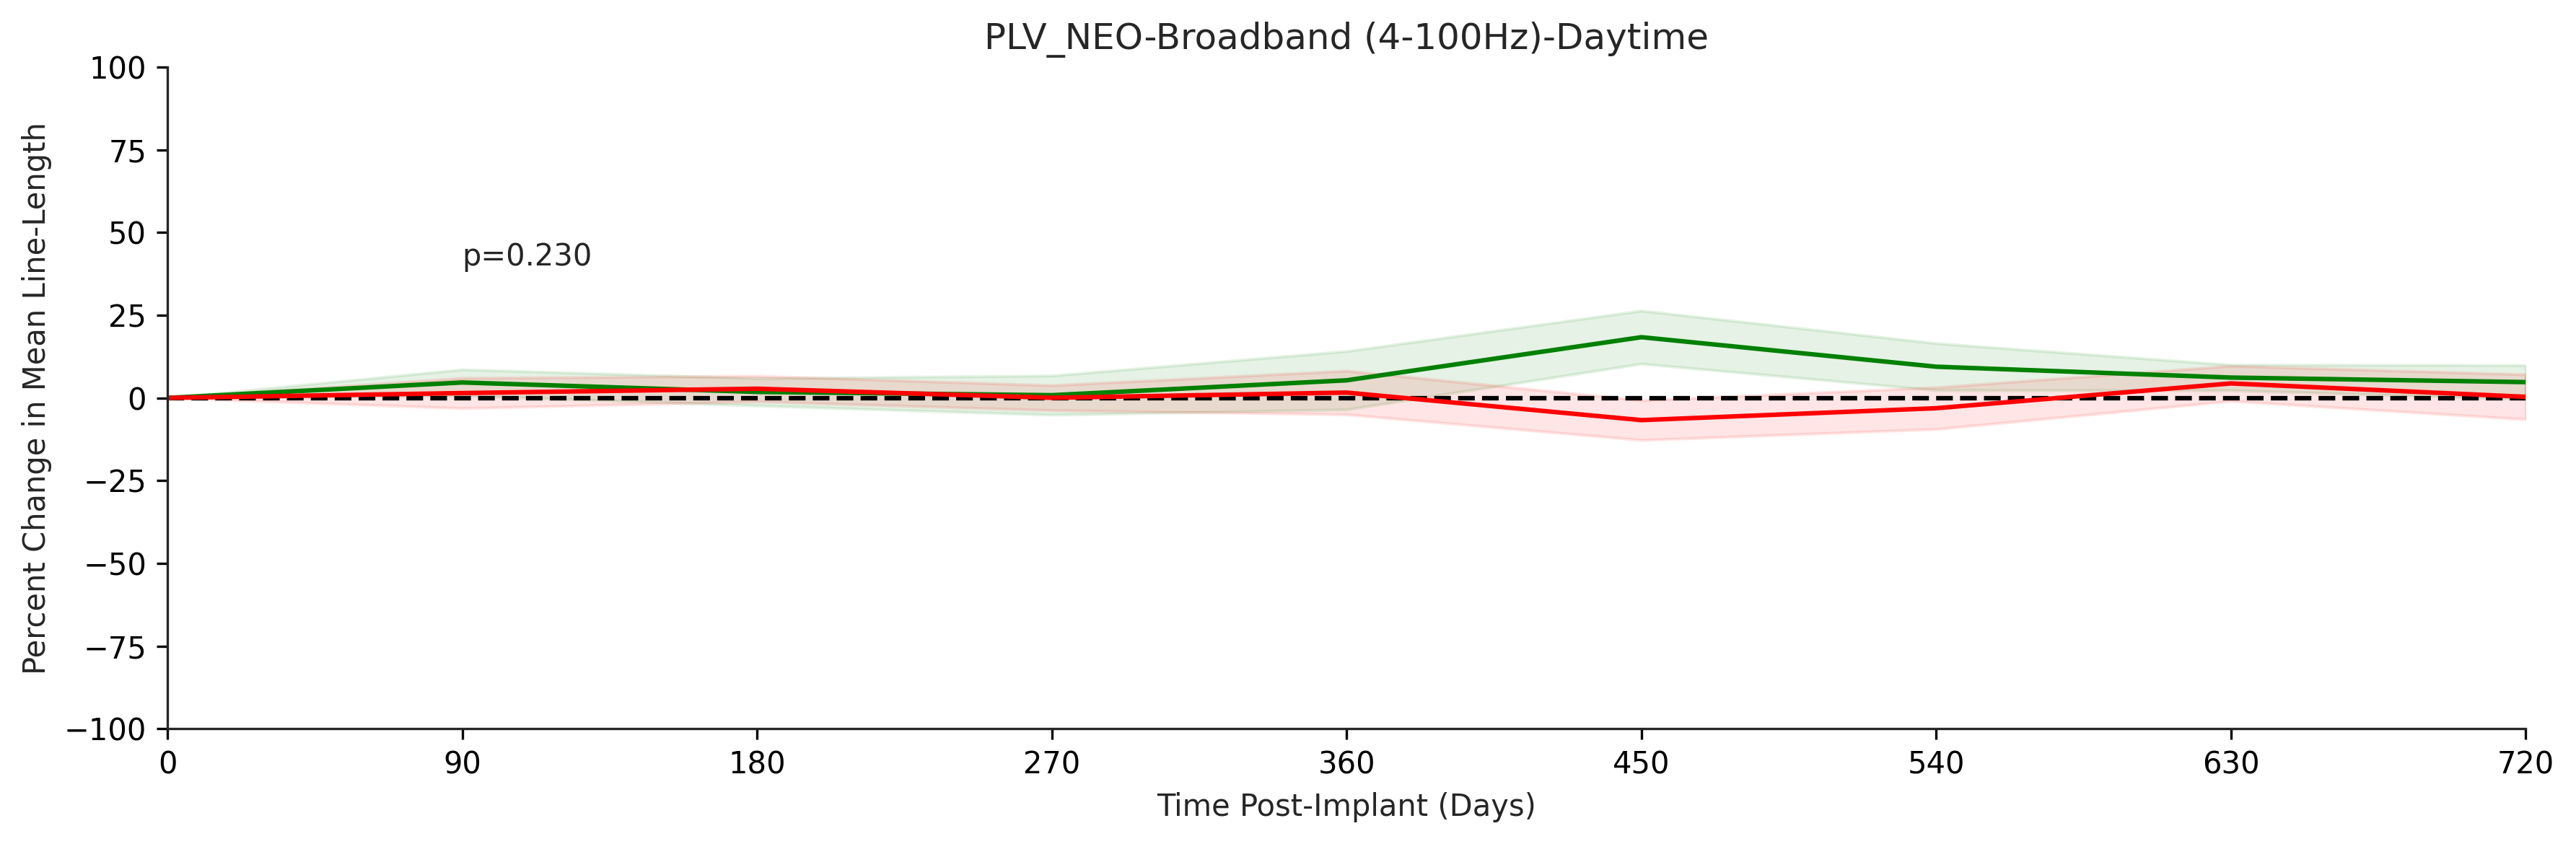

Functional Data Analysis: 0.3737


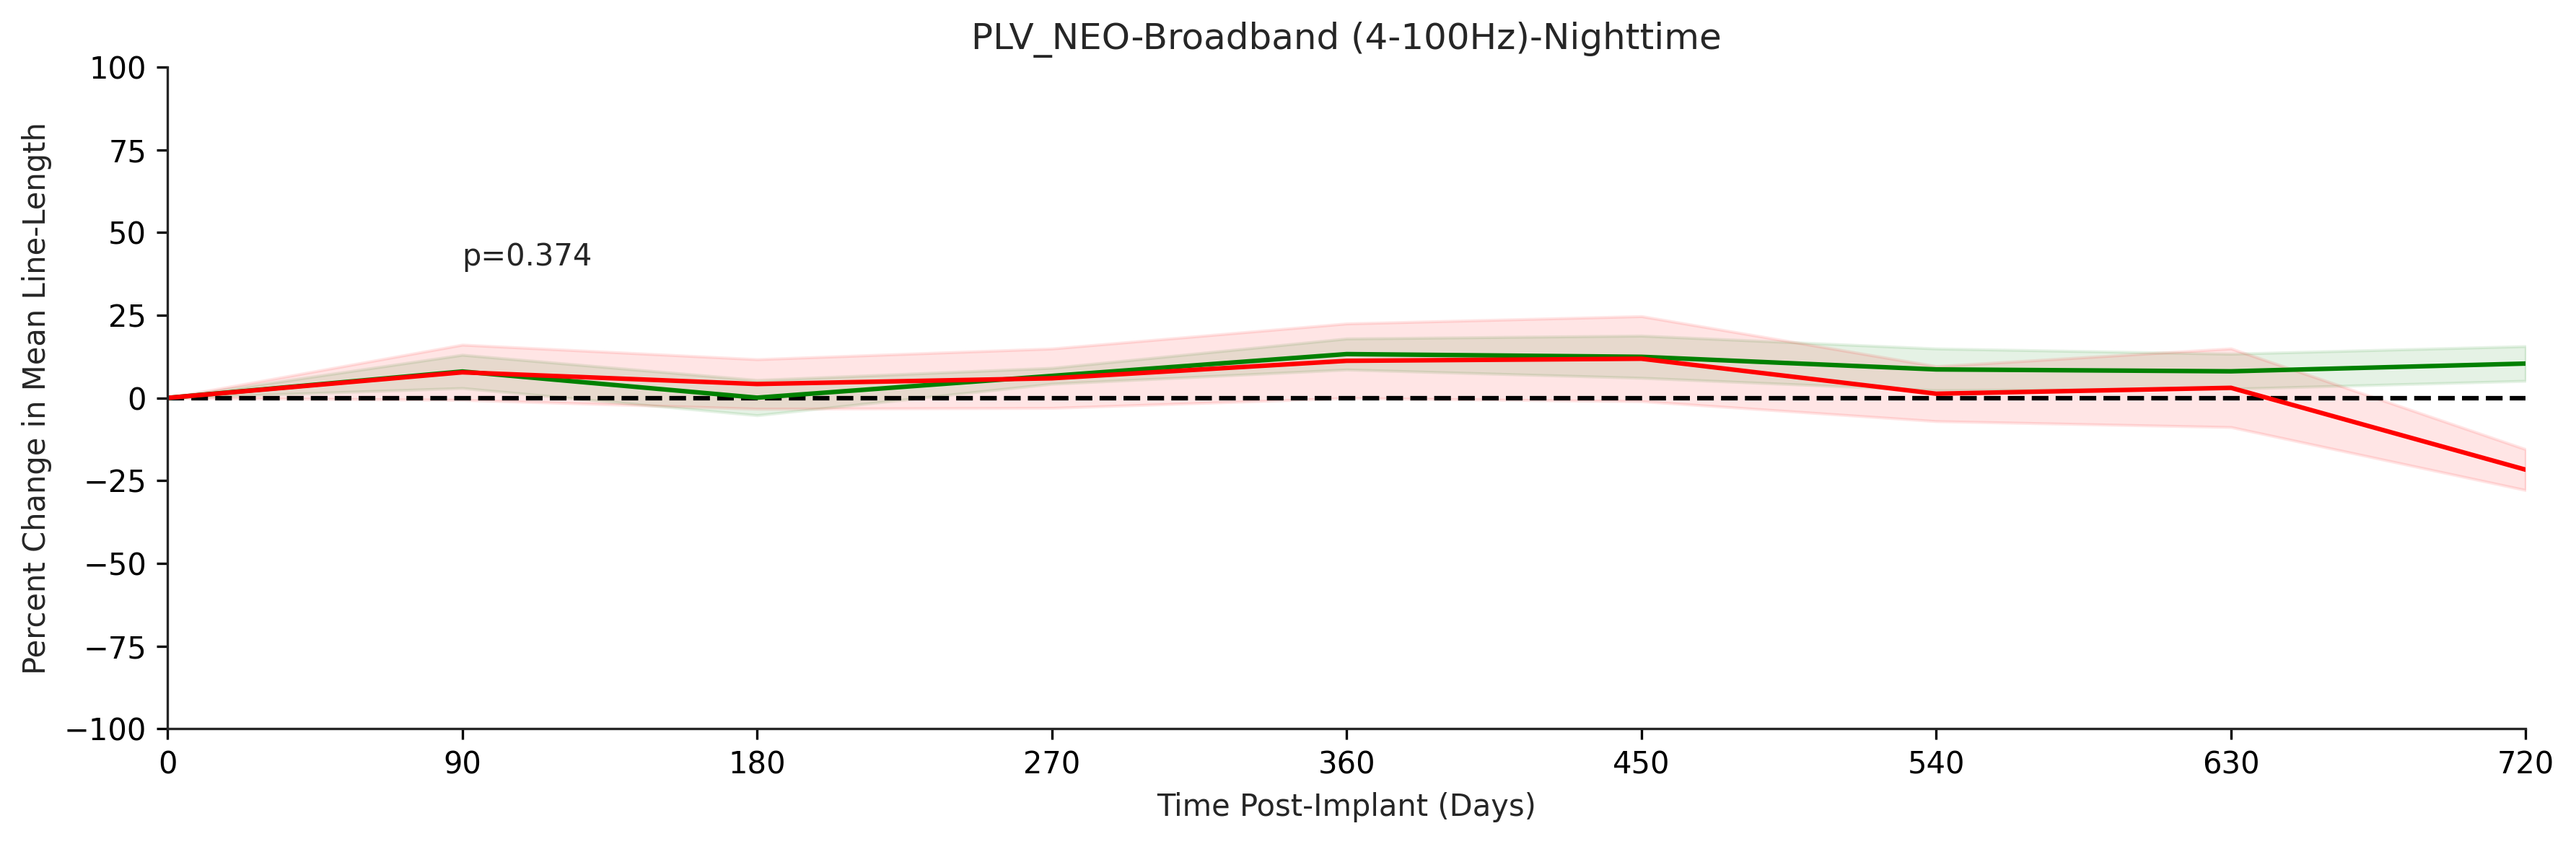

Functional Data Analysis: 0.2993


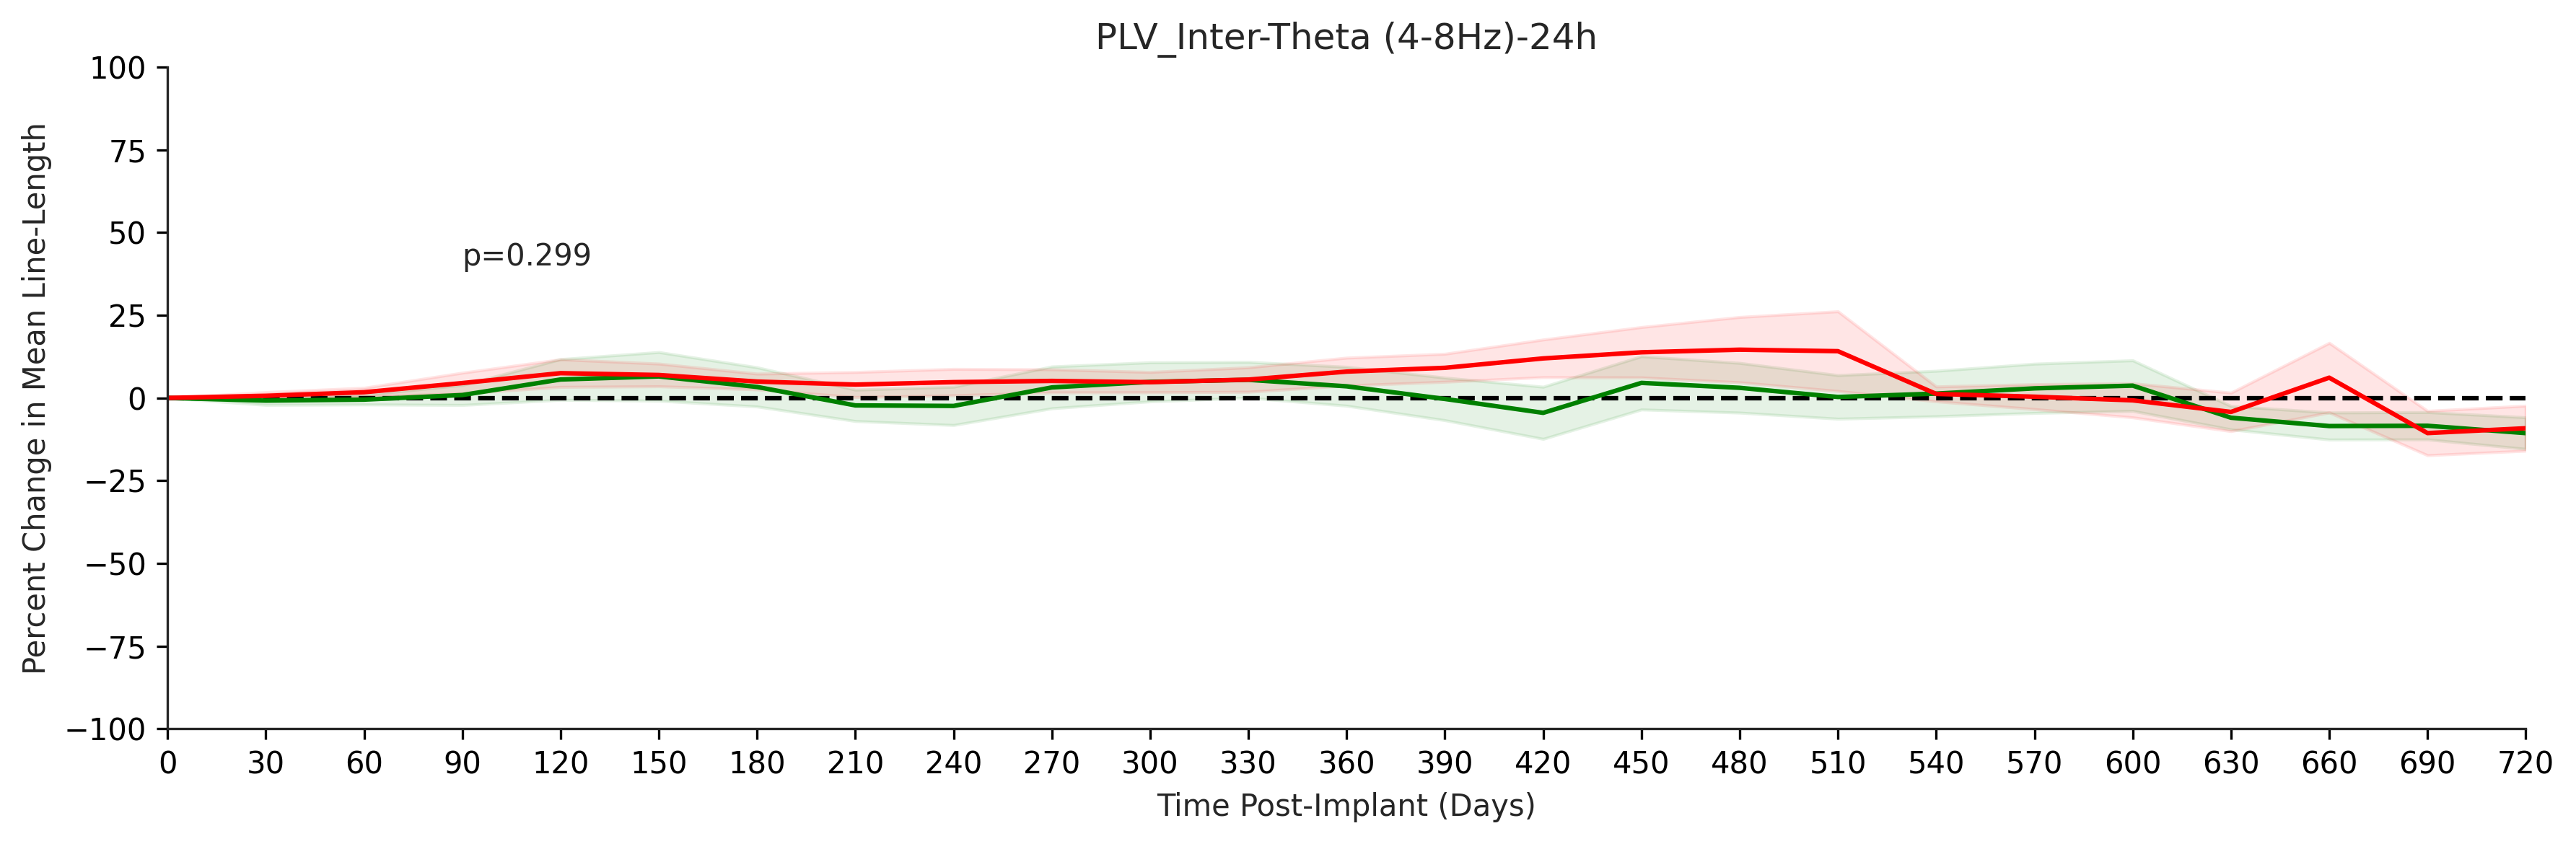

Functional Data Analysis: 0.2673


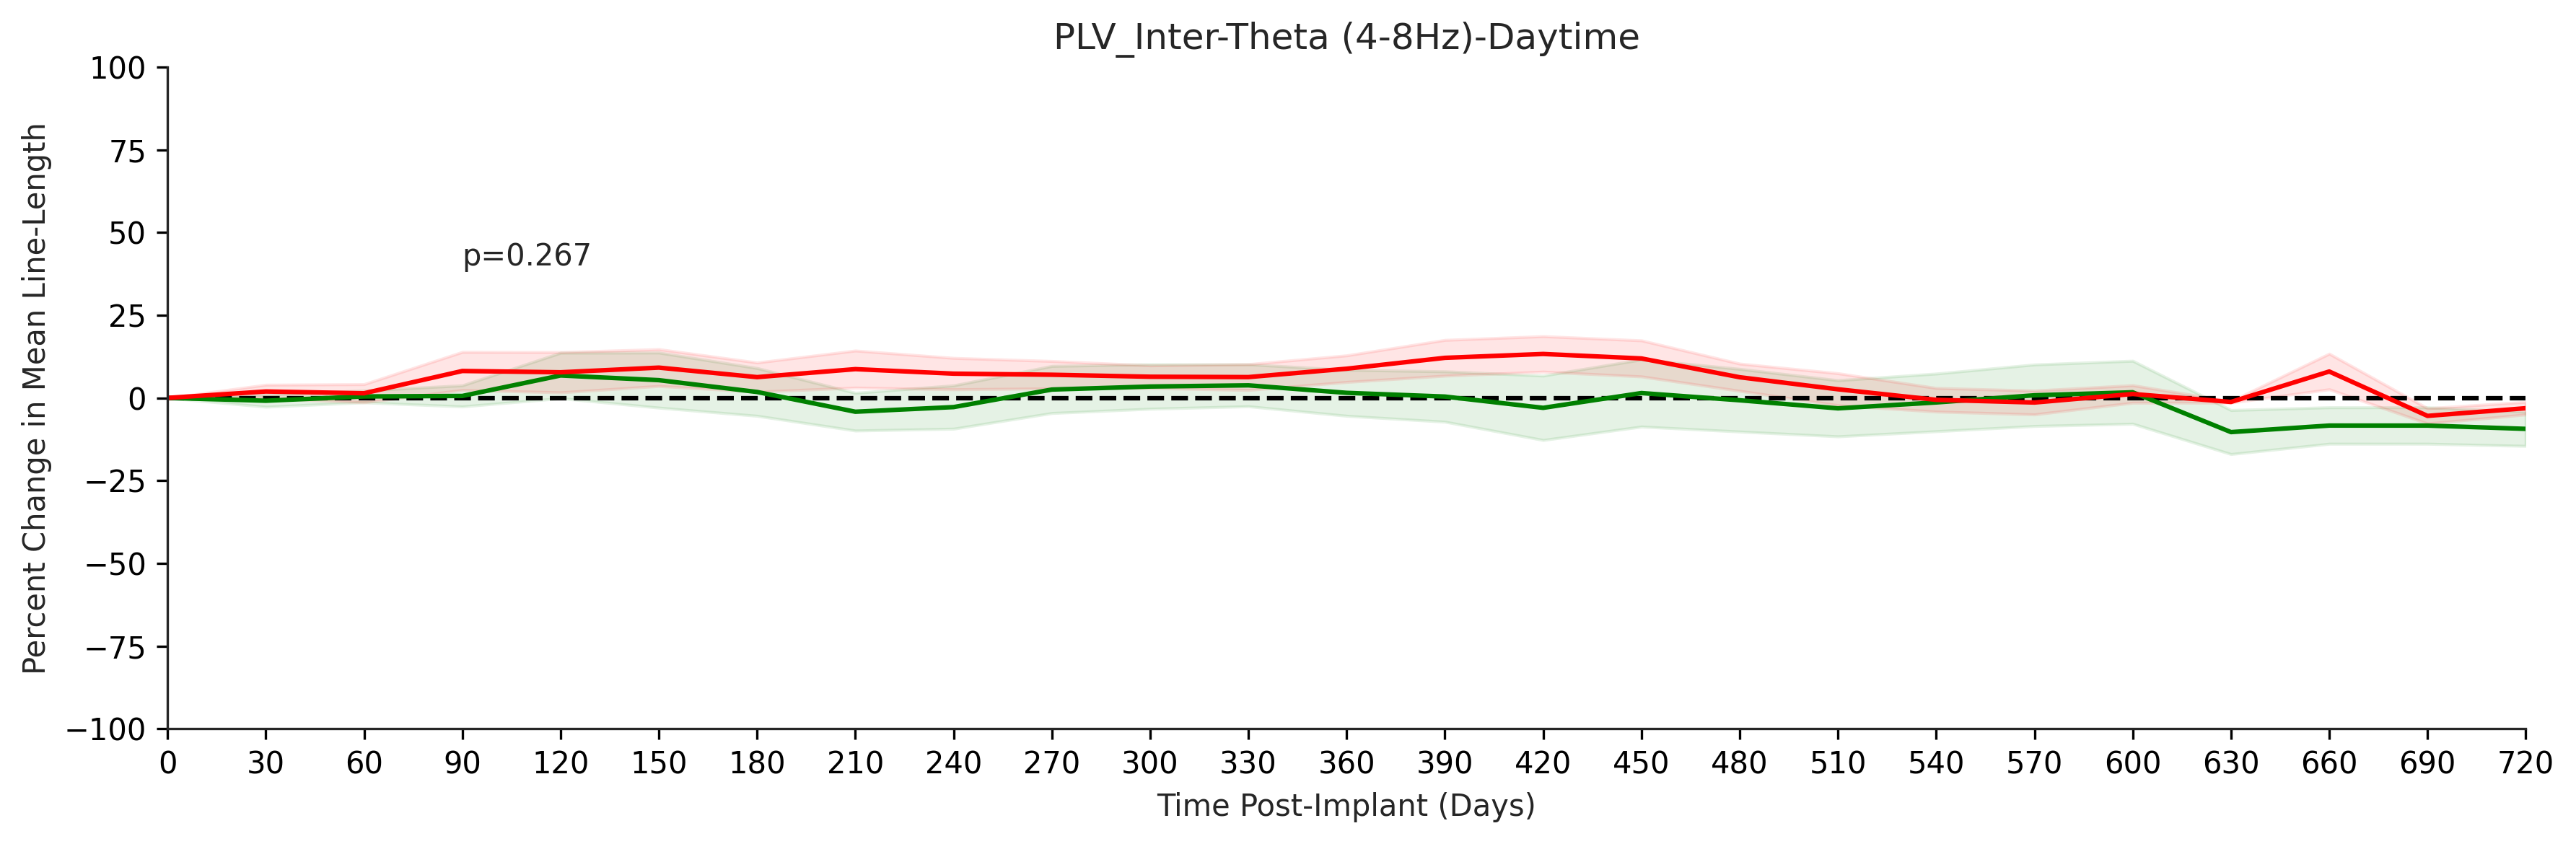

Functional Data Analysis: 0.1299


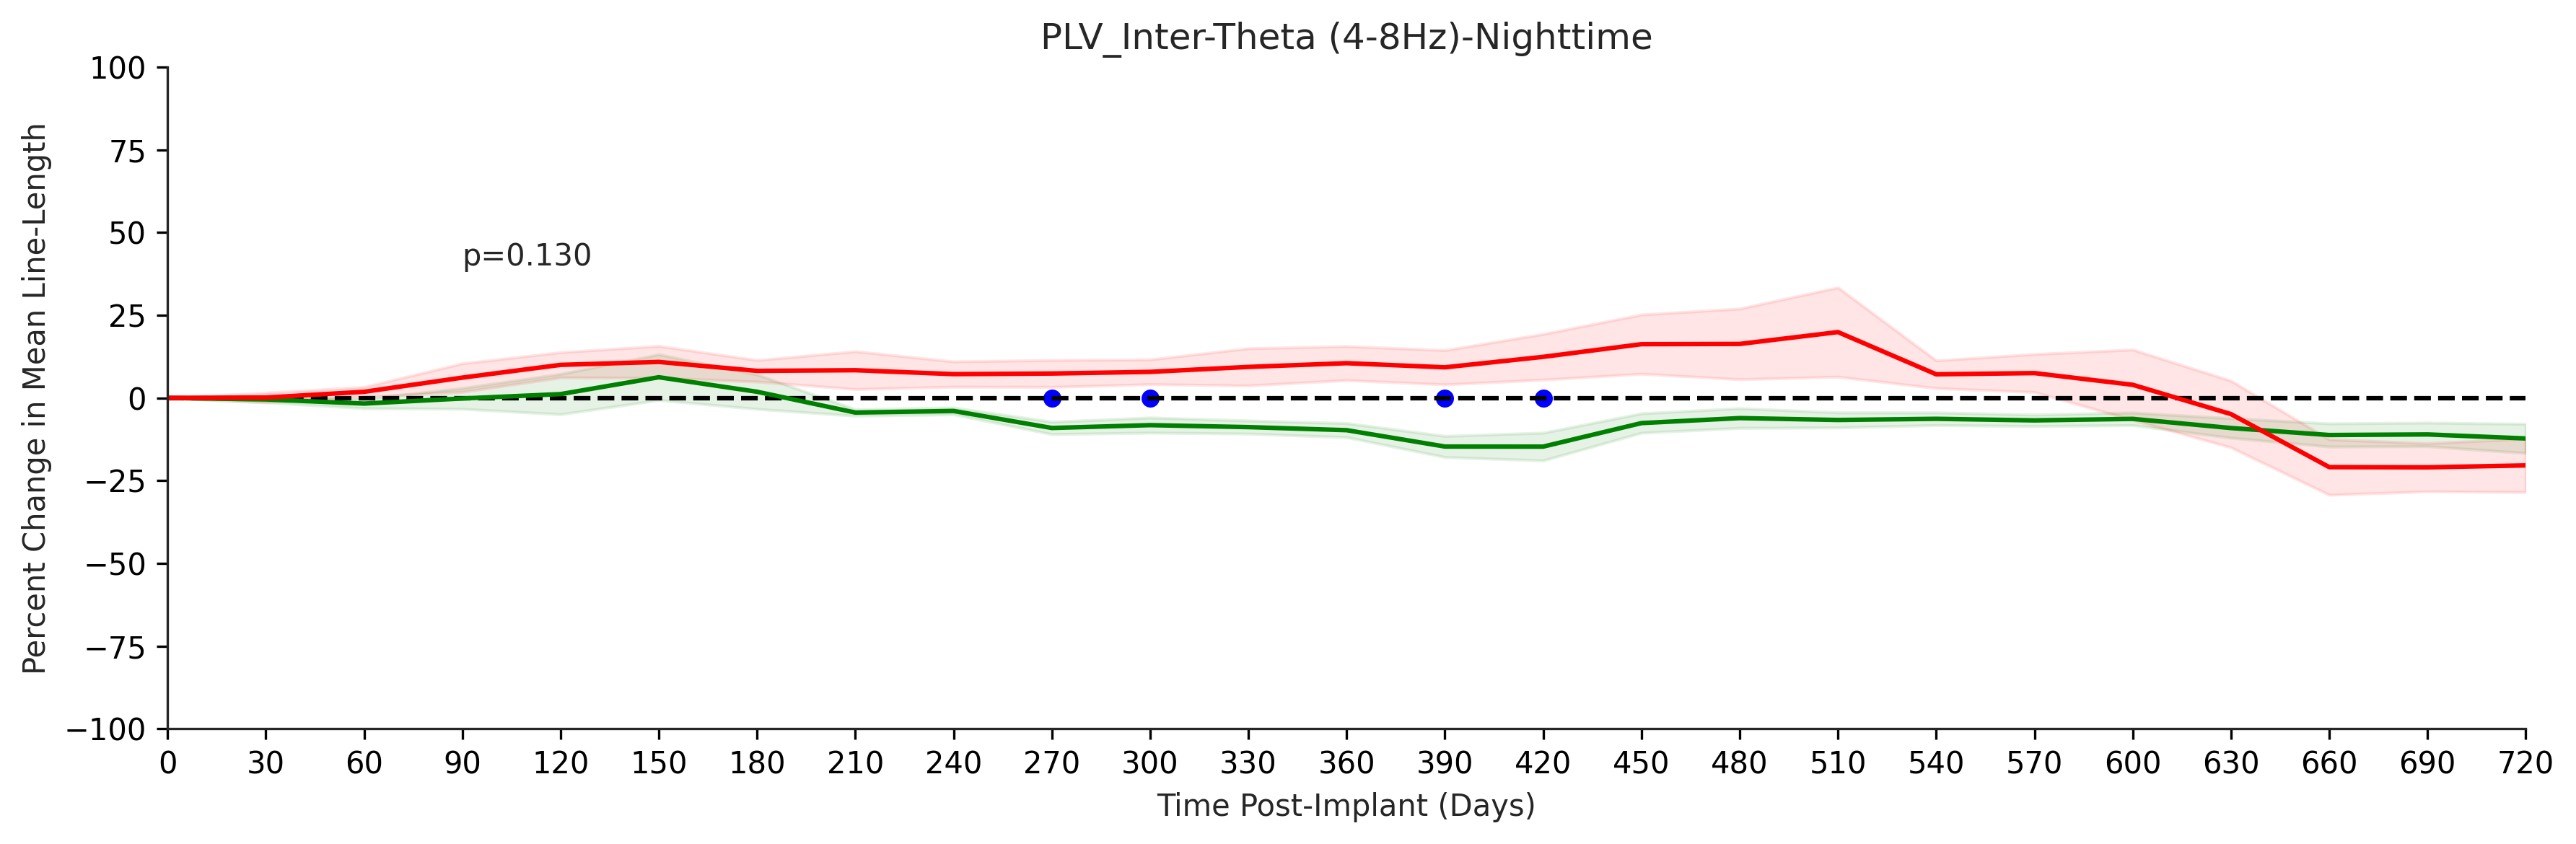

Functional Data Analysis: 0.0864


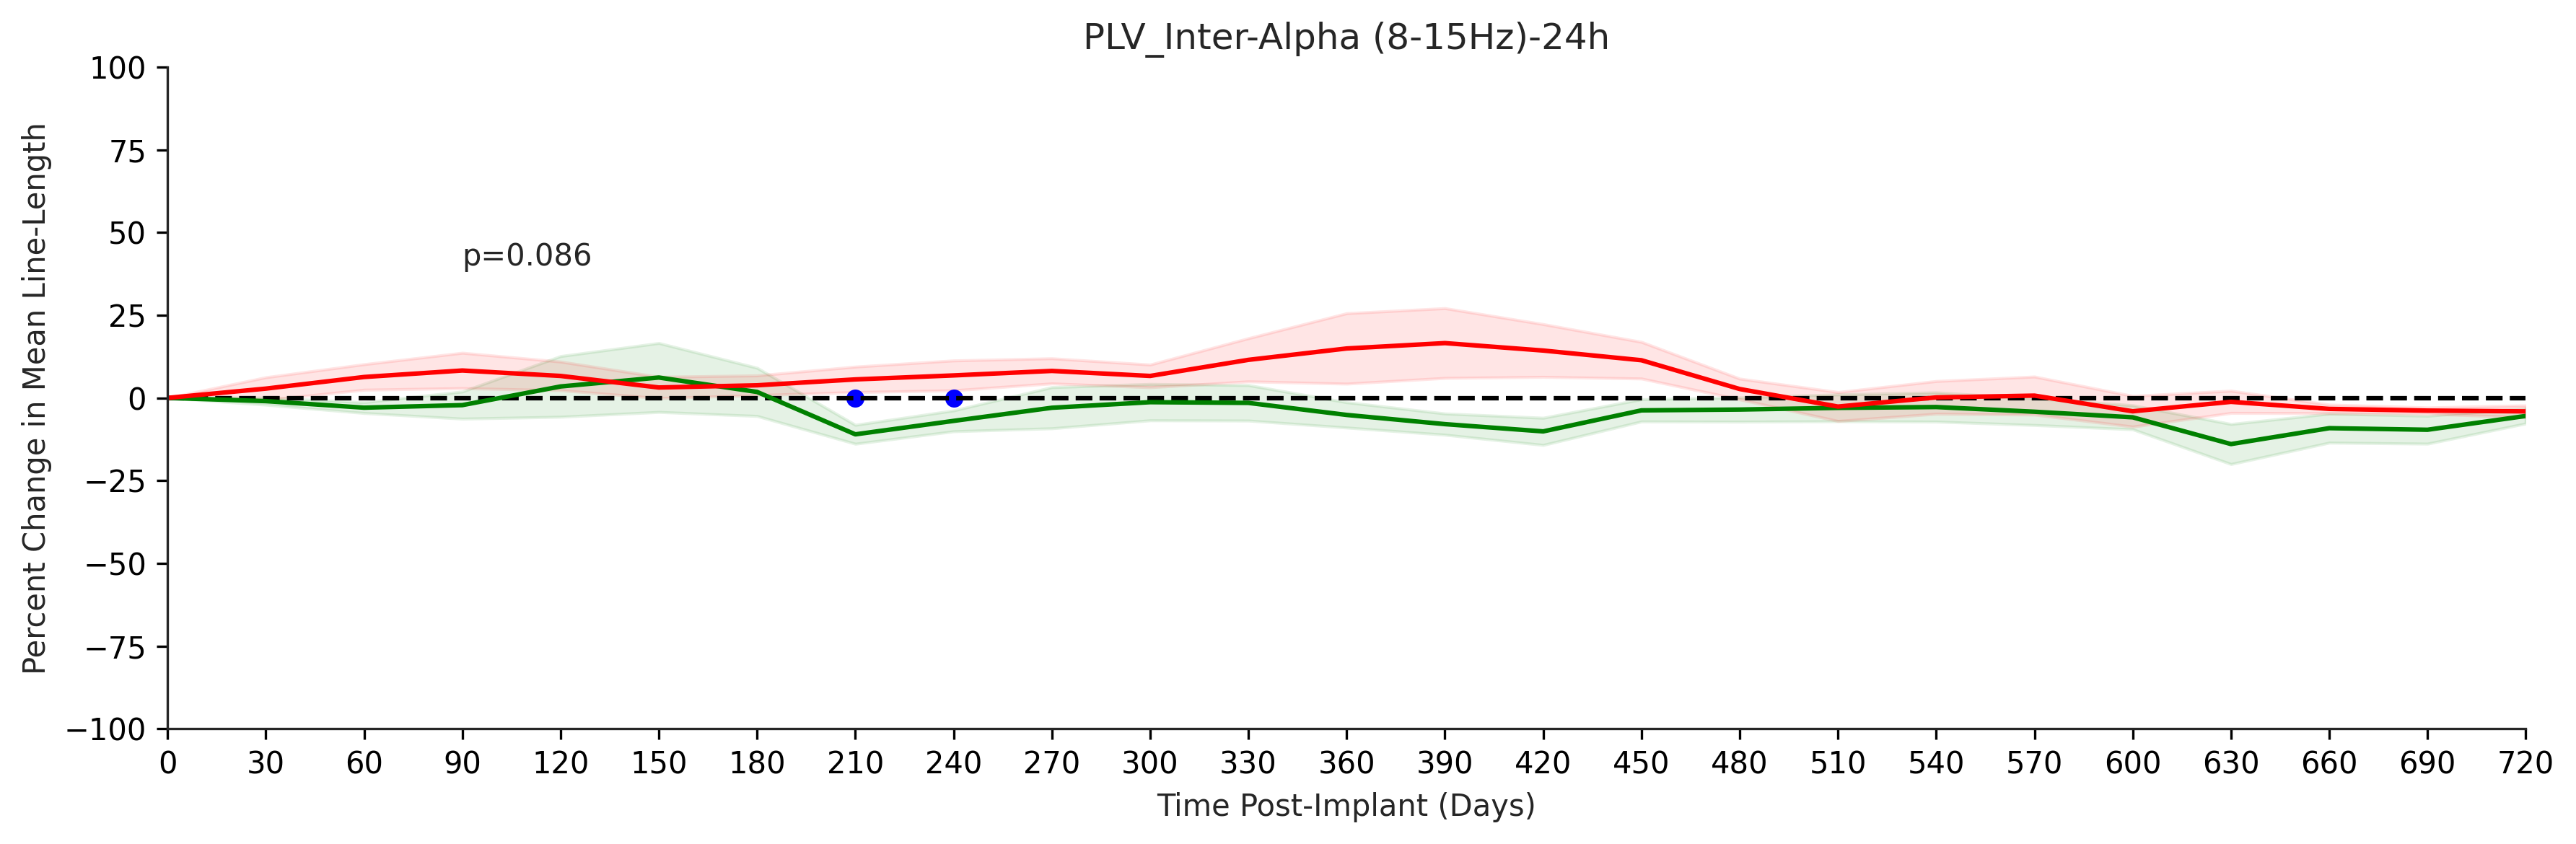

Functional Data Analysis: 0.4641


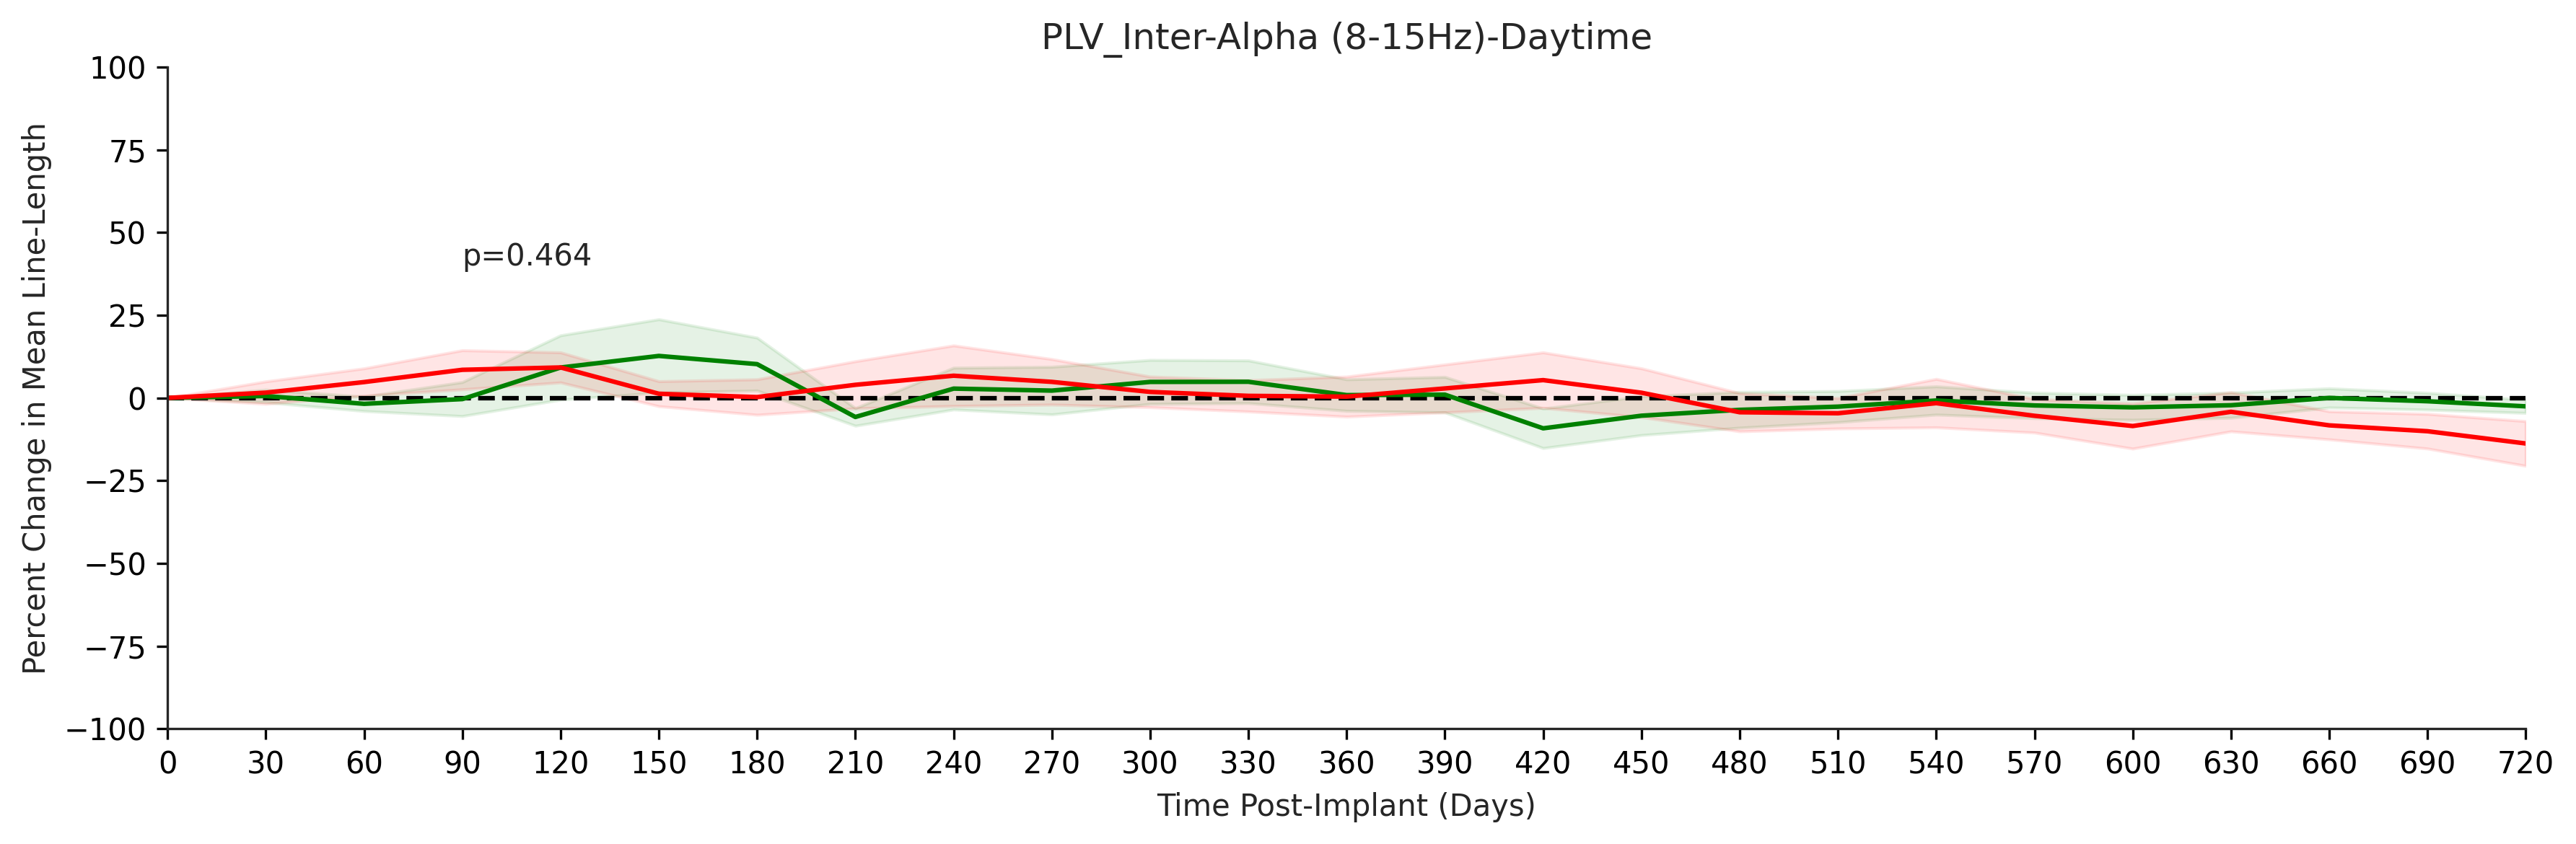

Functional Data Analysis: 0.0251


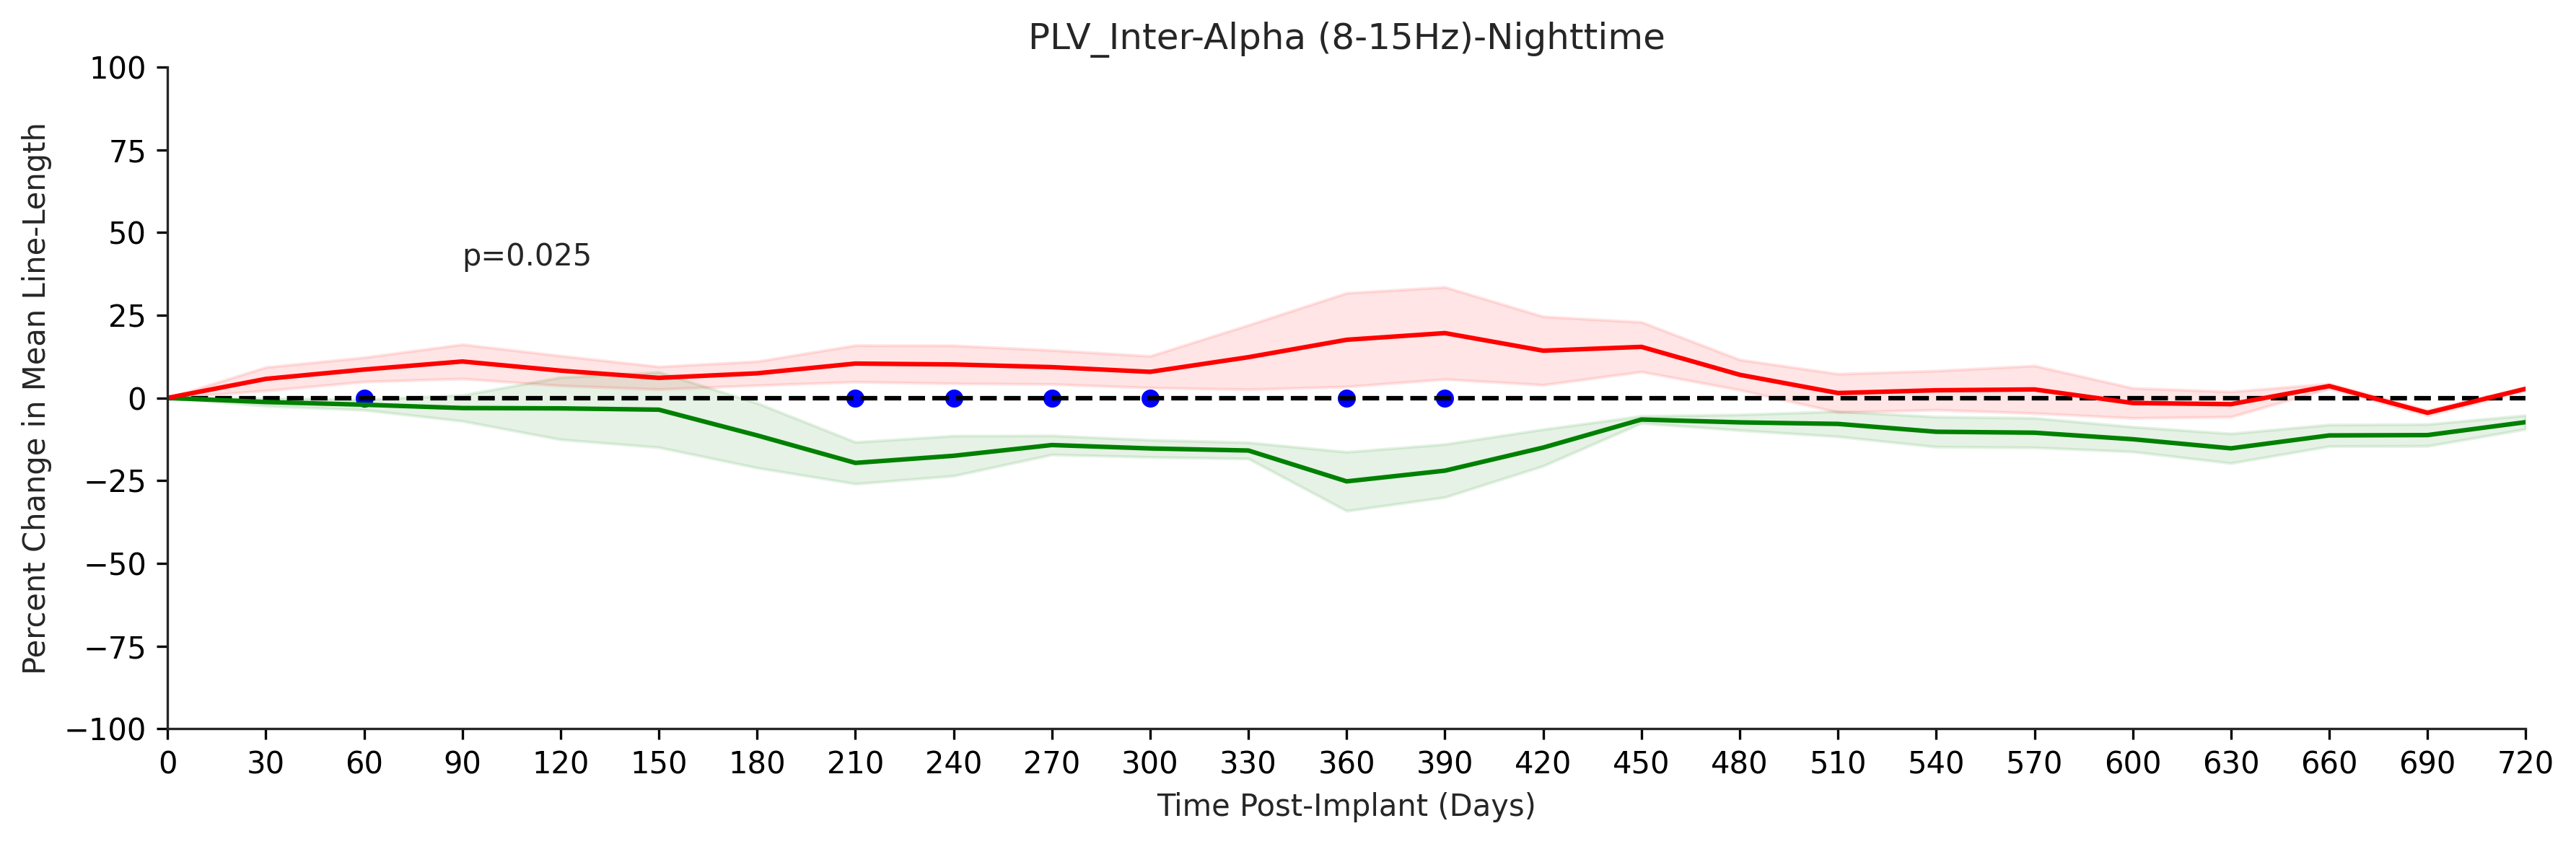

Functional Data Analysis: 0.0558


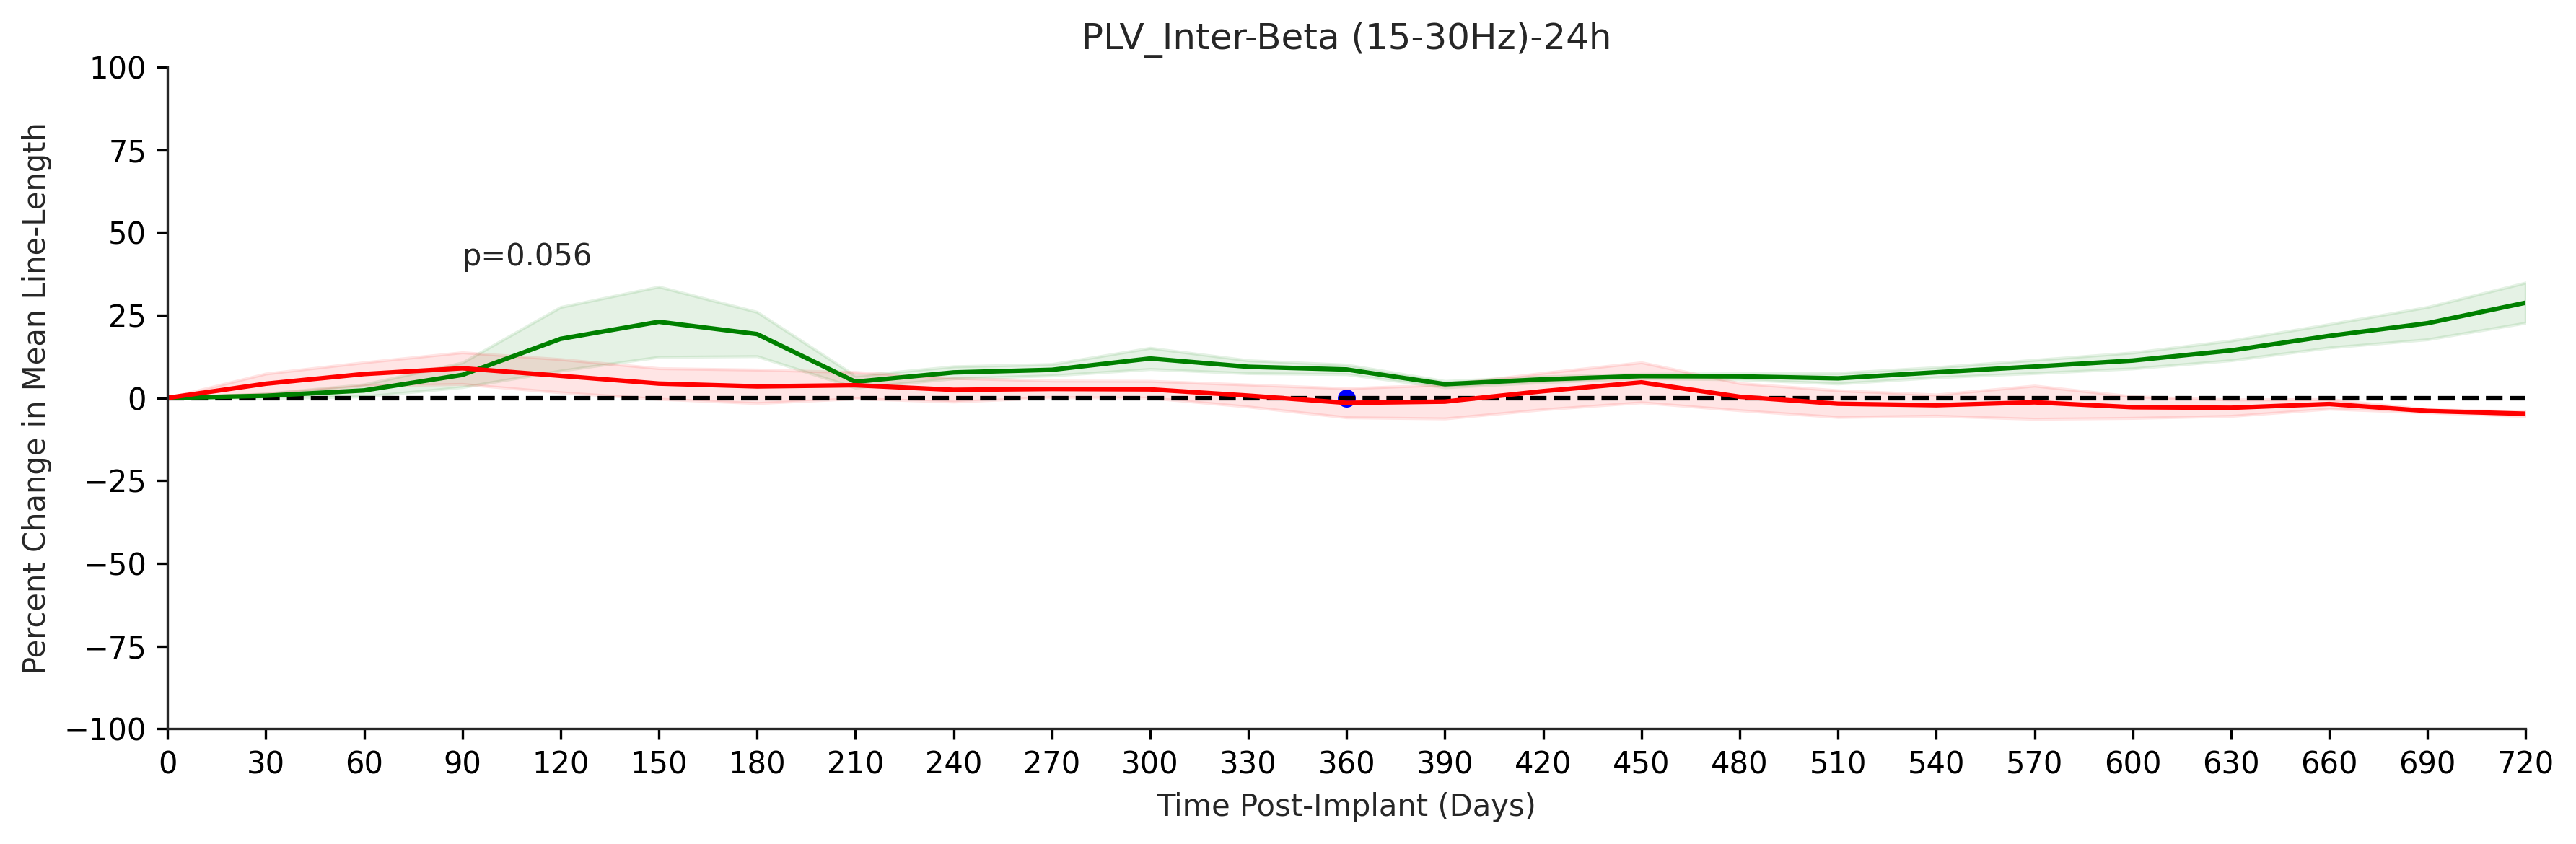

Functional Data Analysis: 0.0831


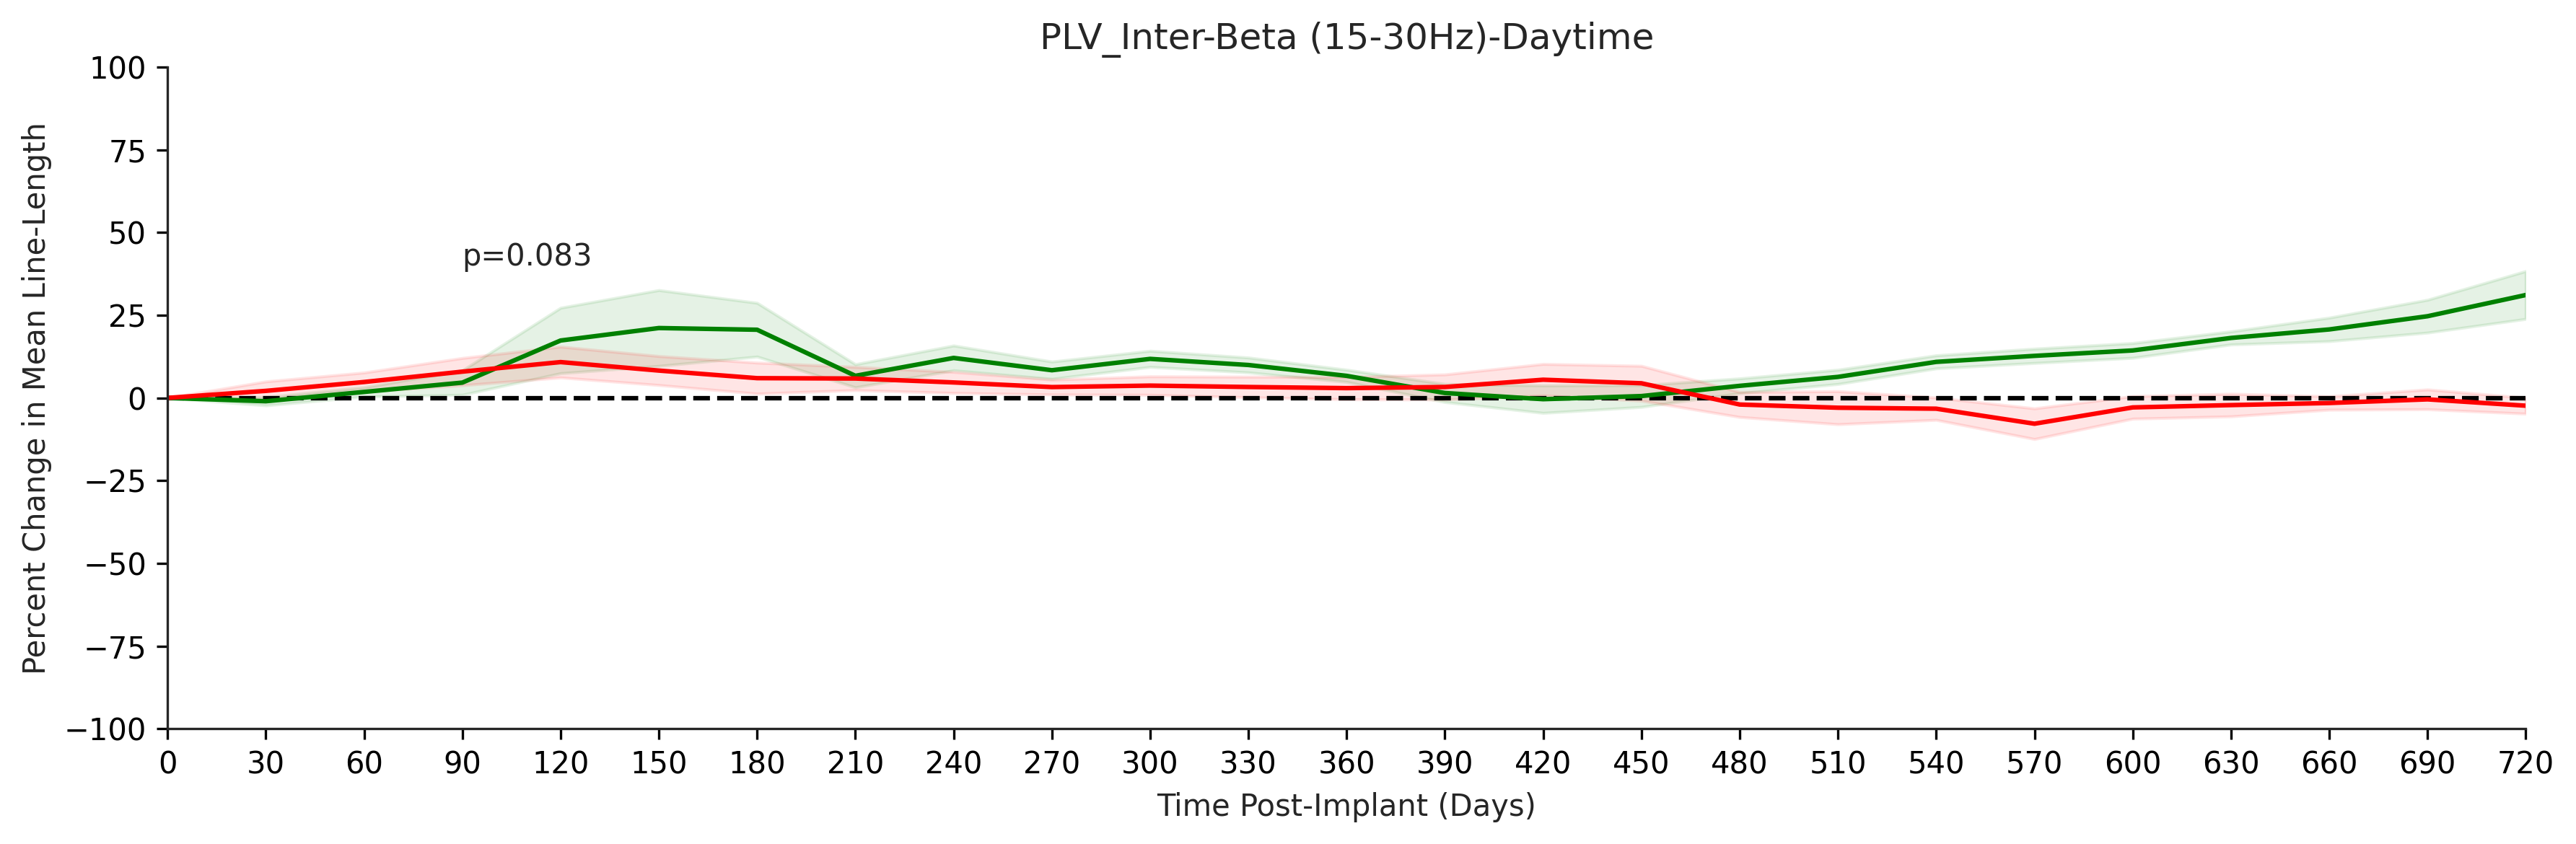

Functional Data Analysis: 0.0441


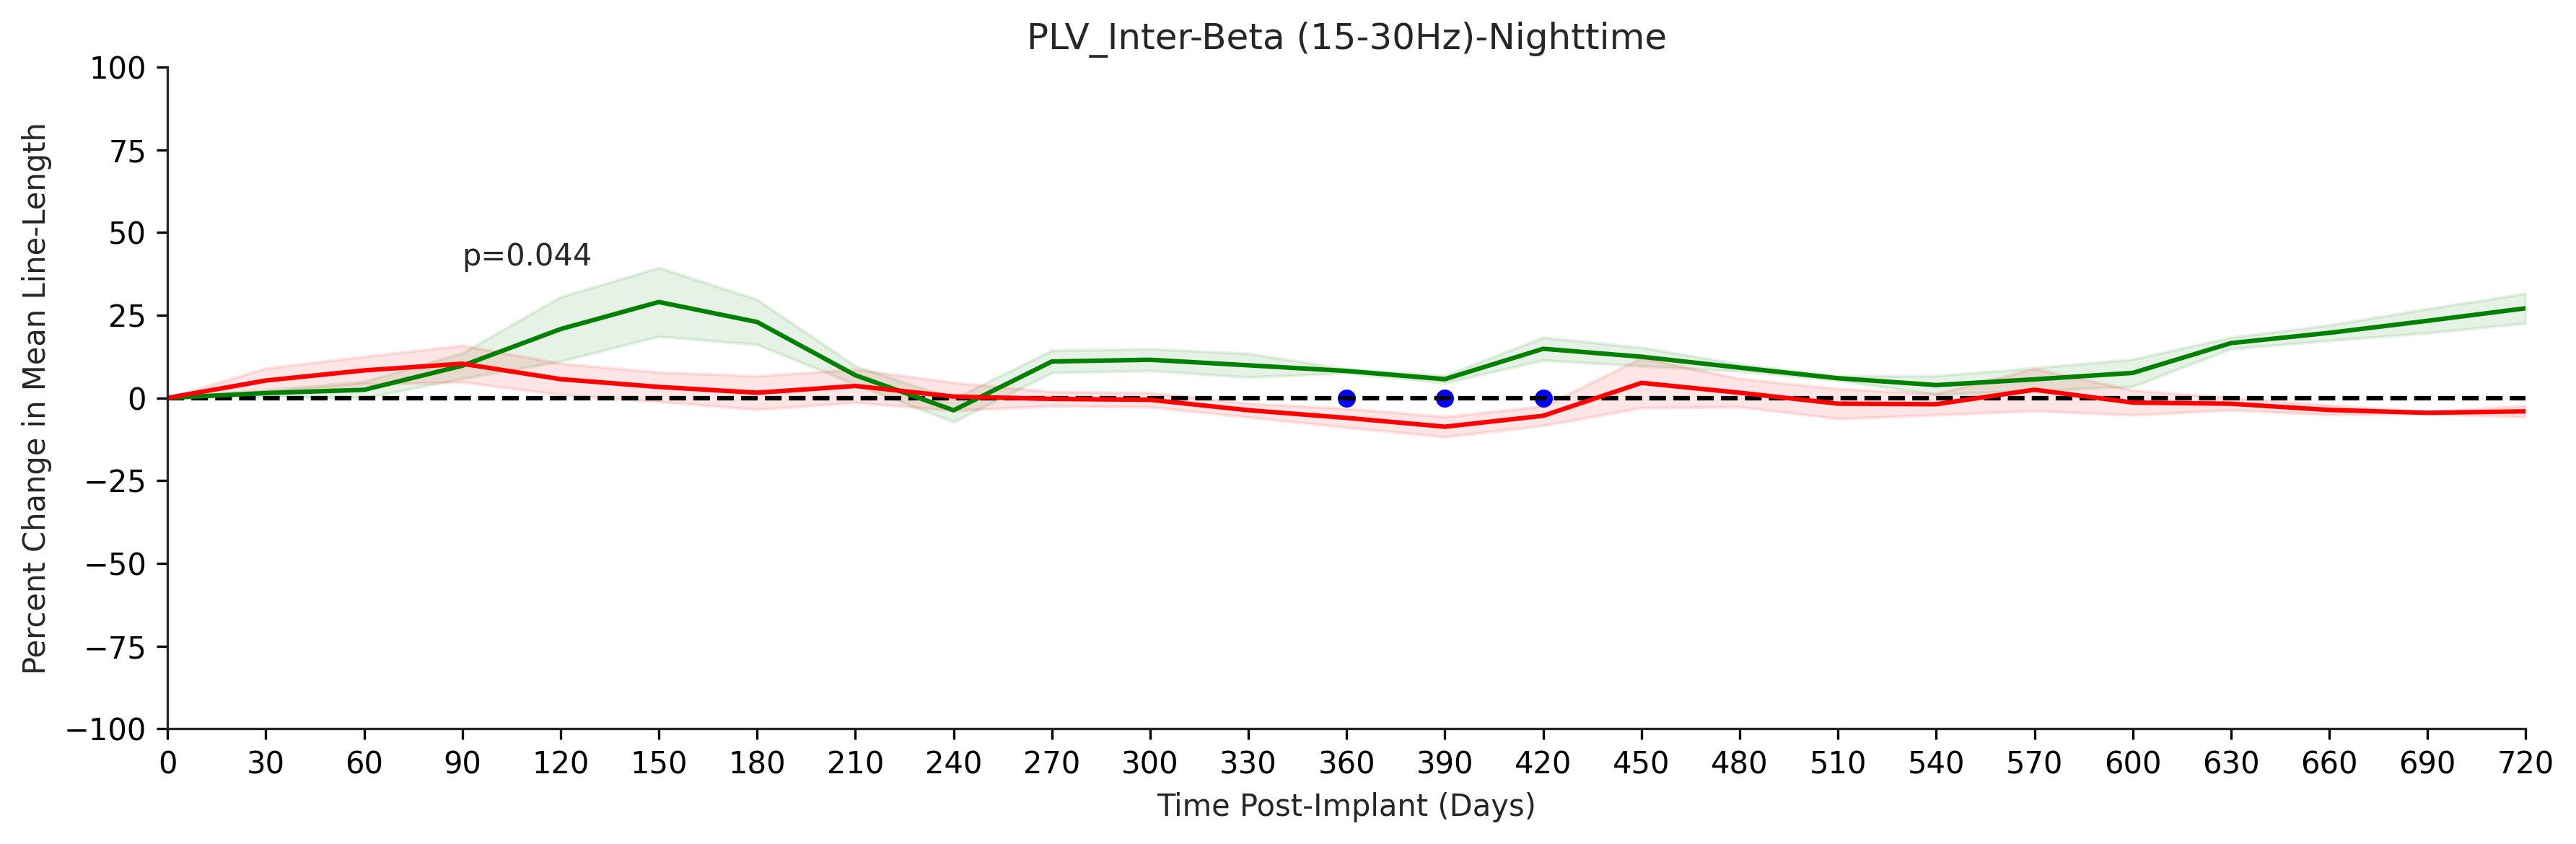

Functional Data Analysis: 0.0902


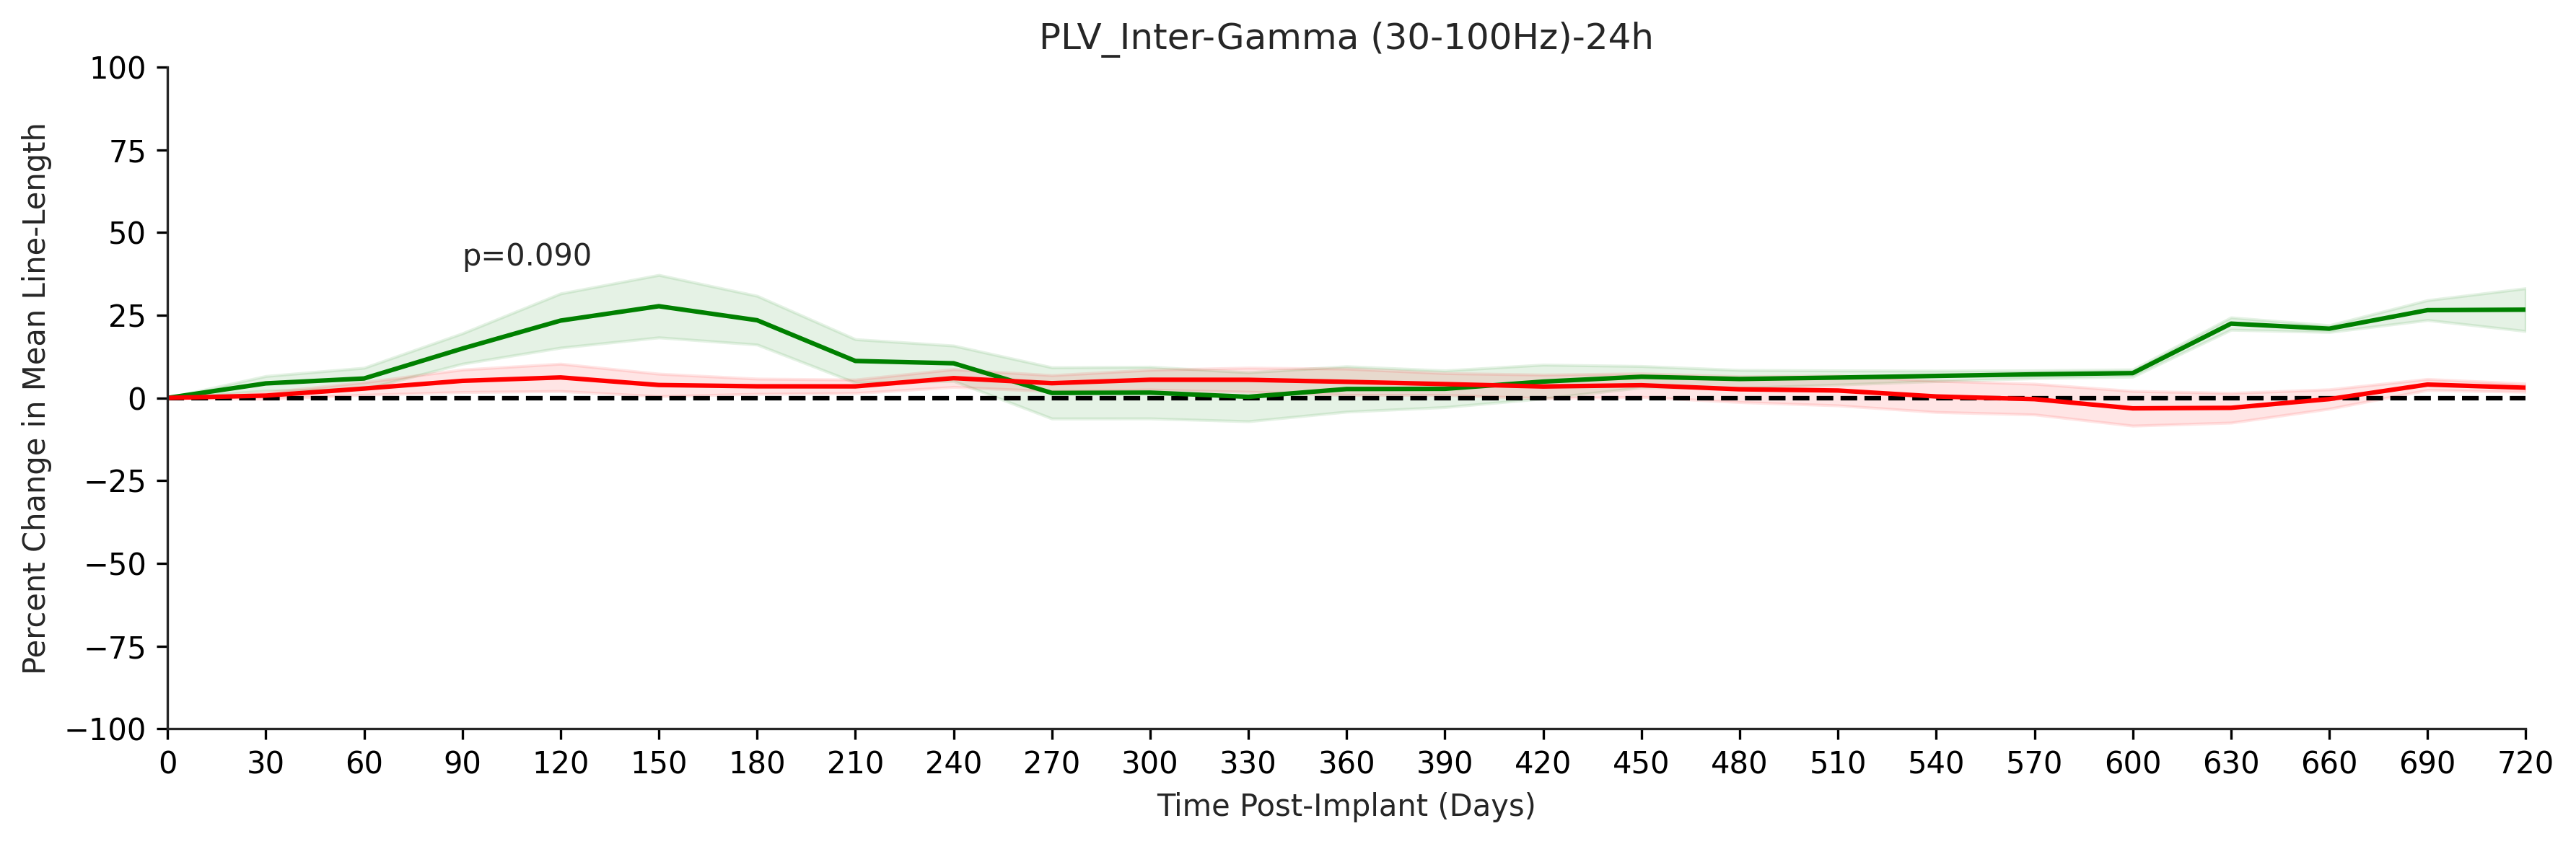

Functional Data Analysis: 0.3308


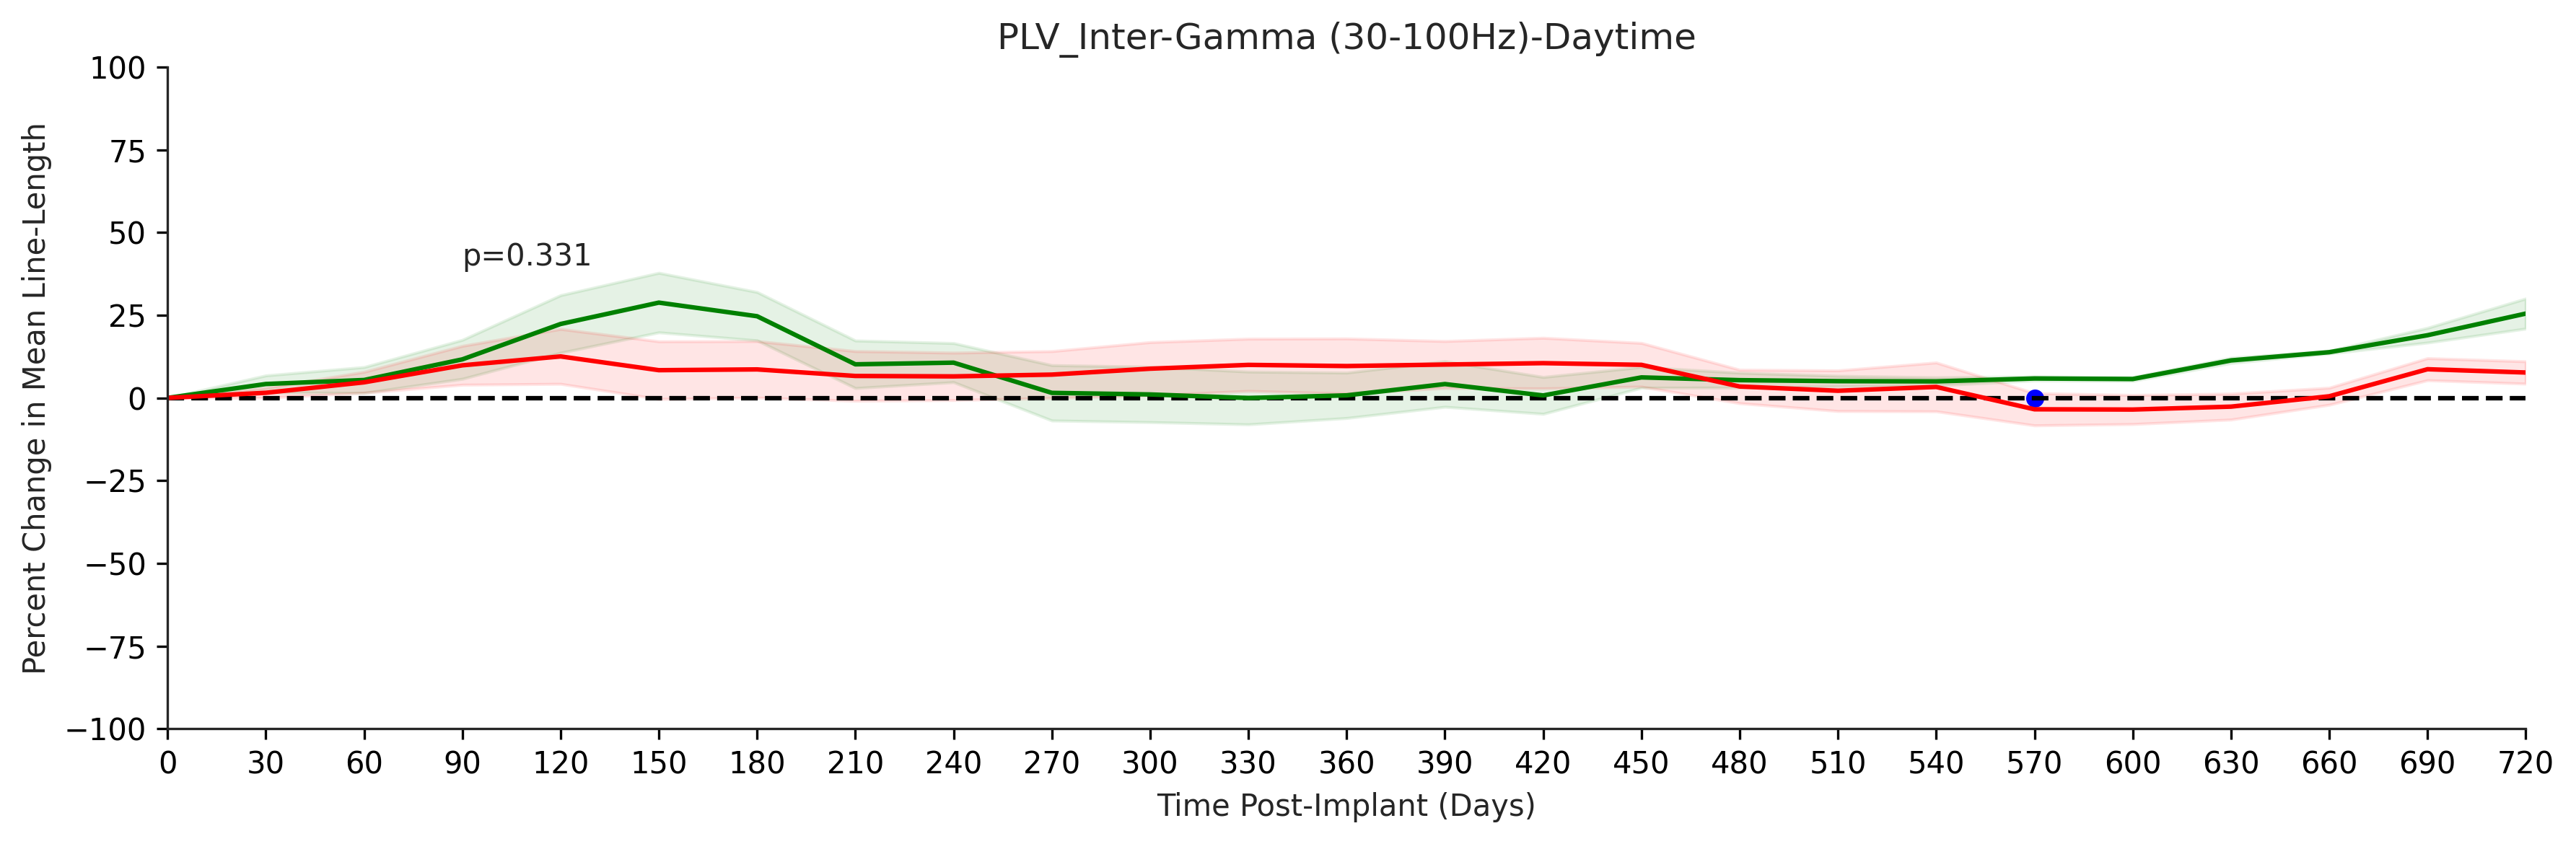

Functional Data Analysis: 0.0146


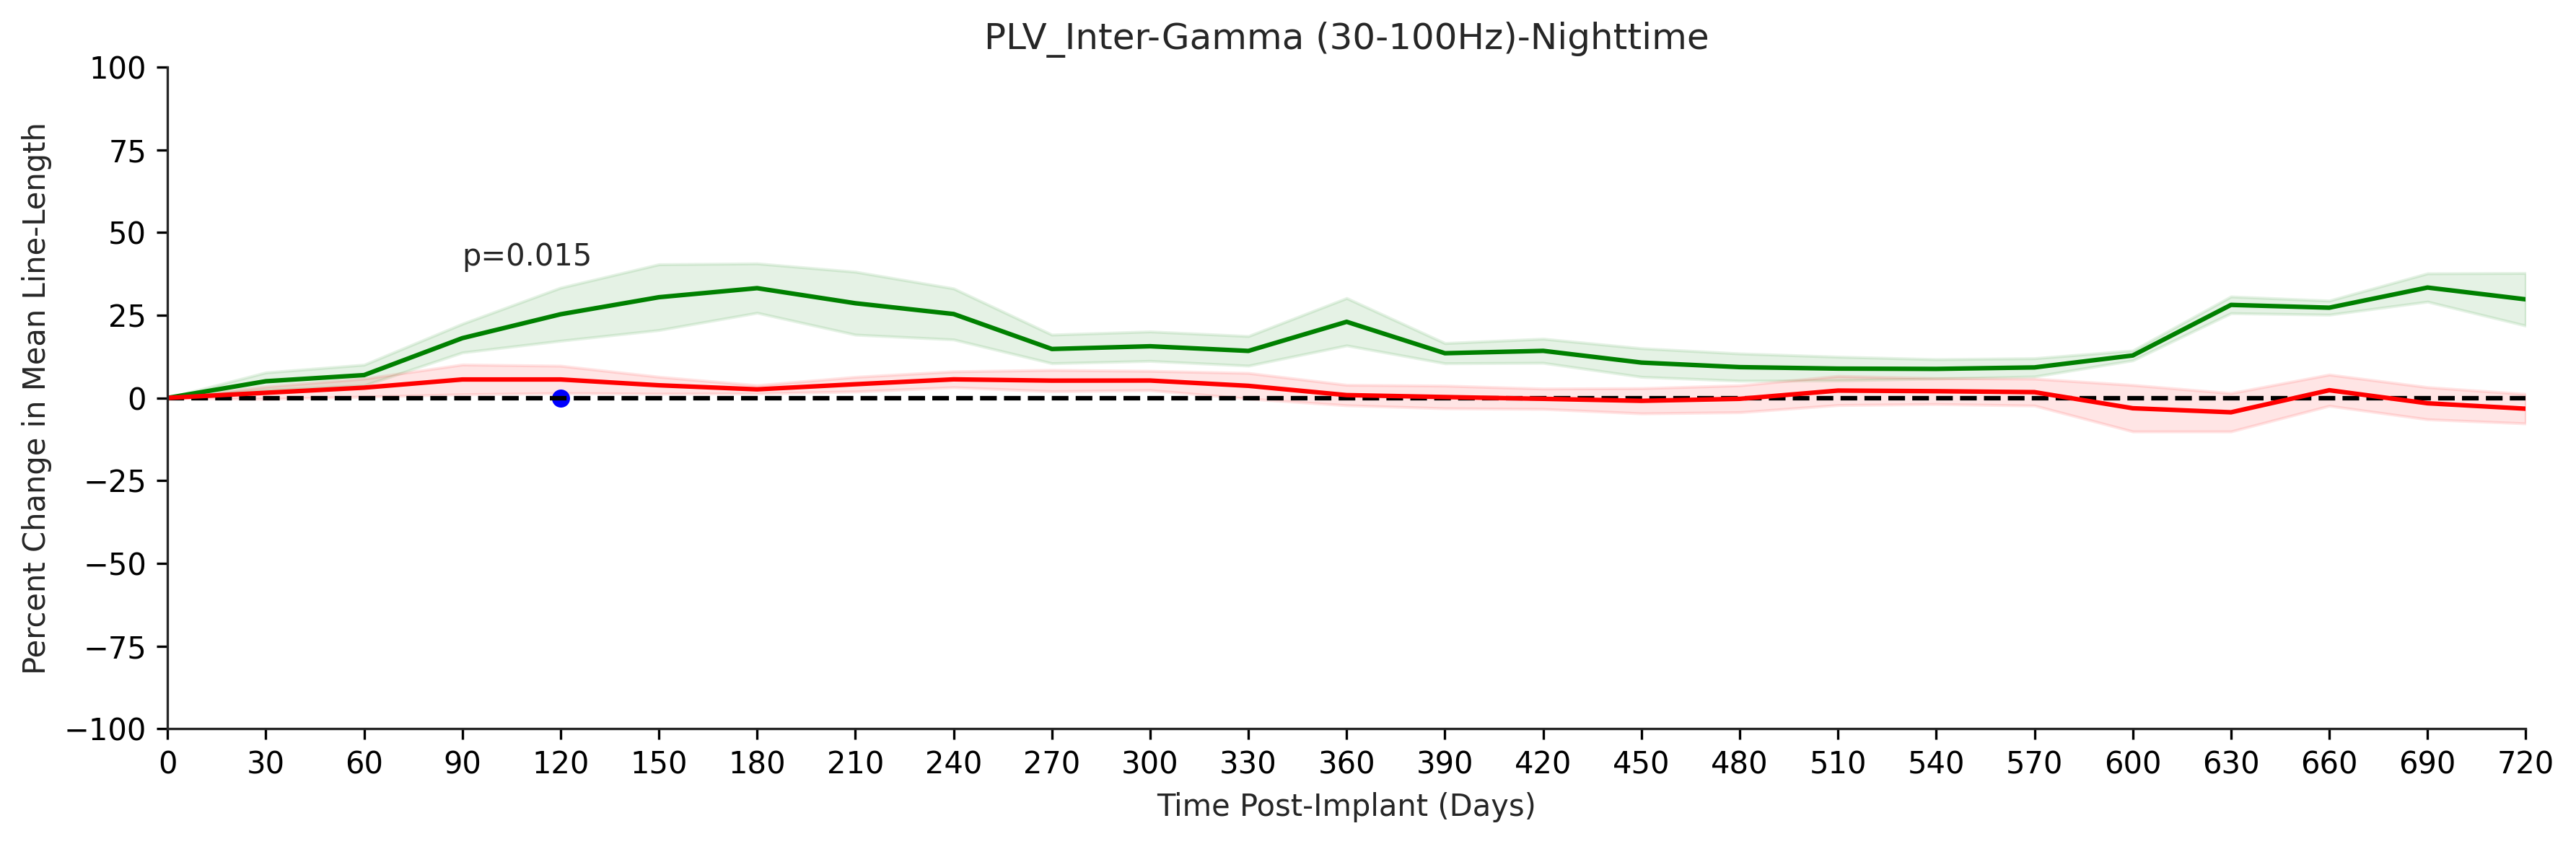

Functional Data Analysis: 0.0868


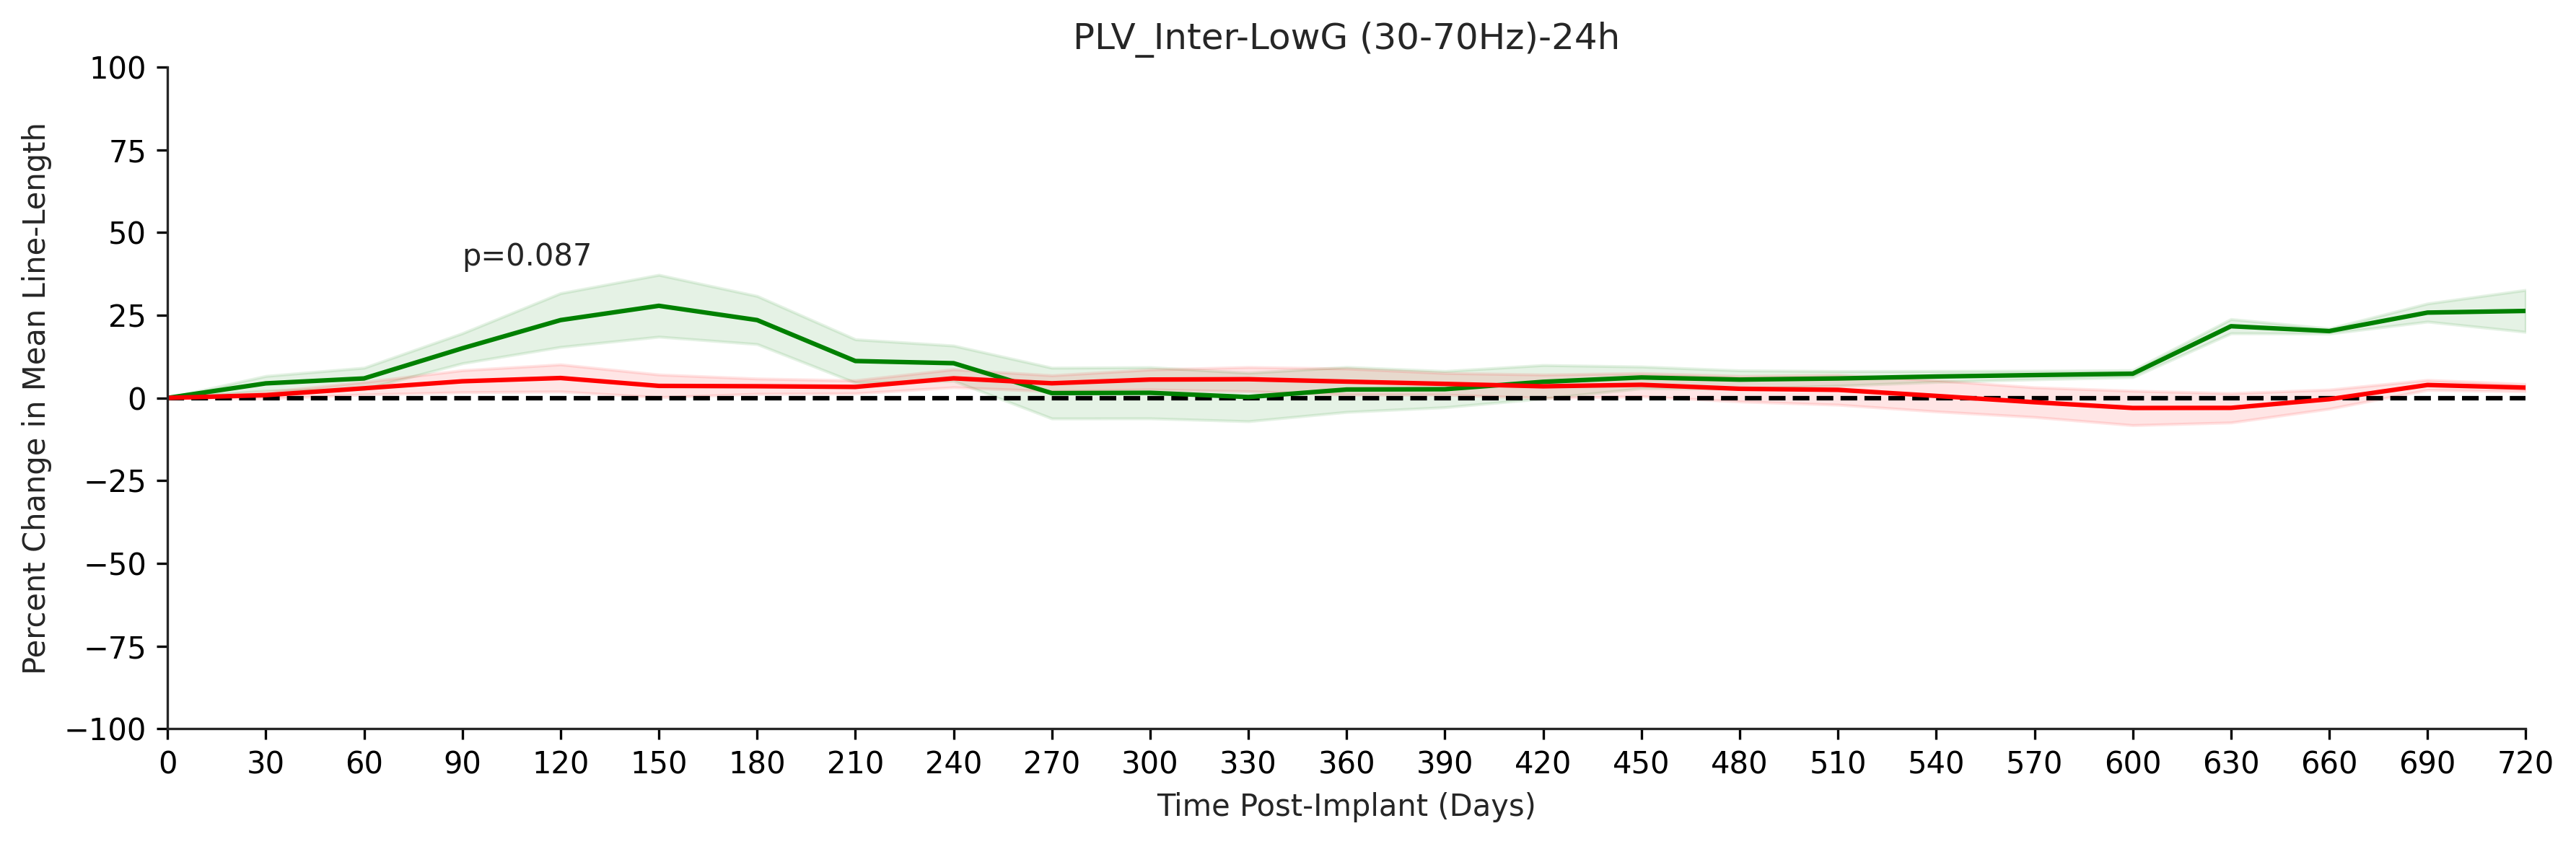

Functional Data Analysis: 0.3327


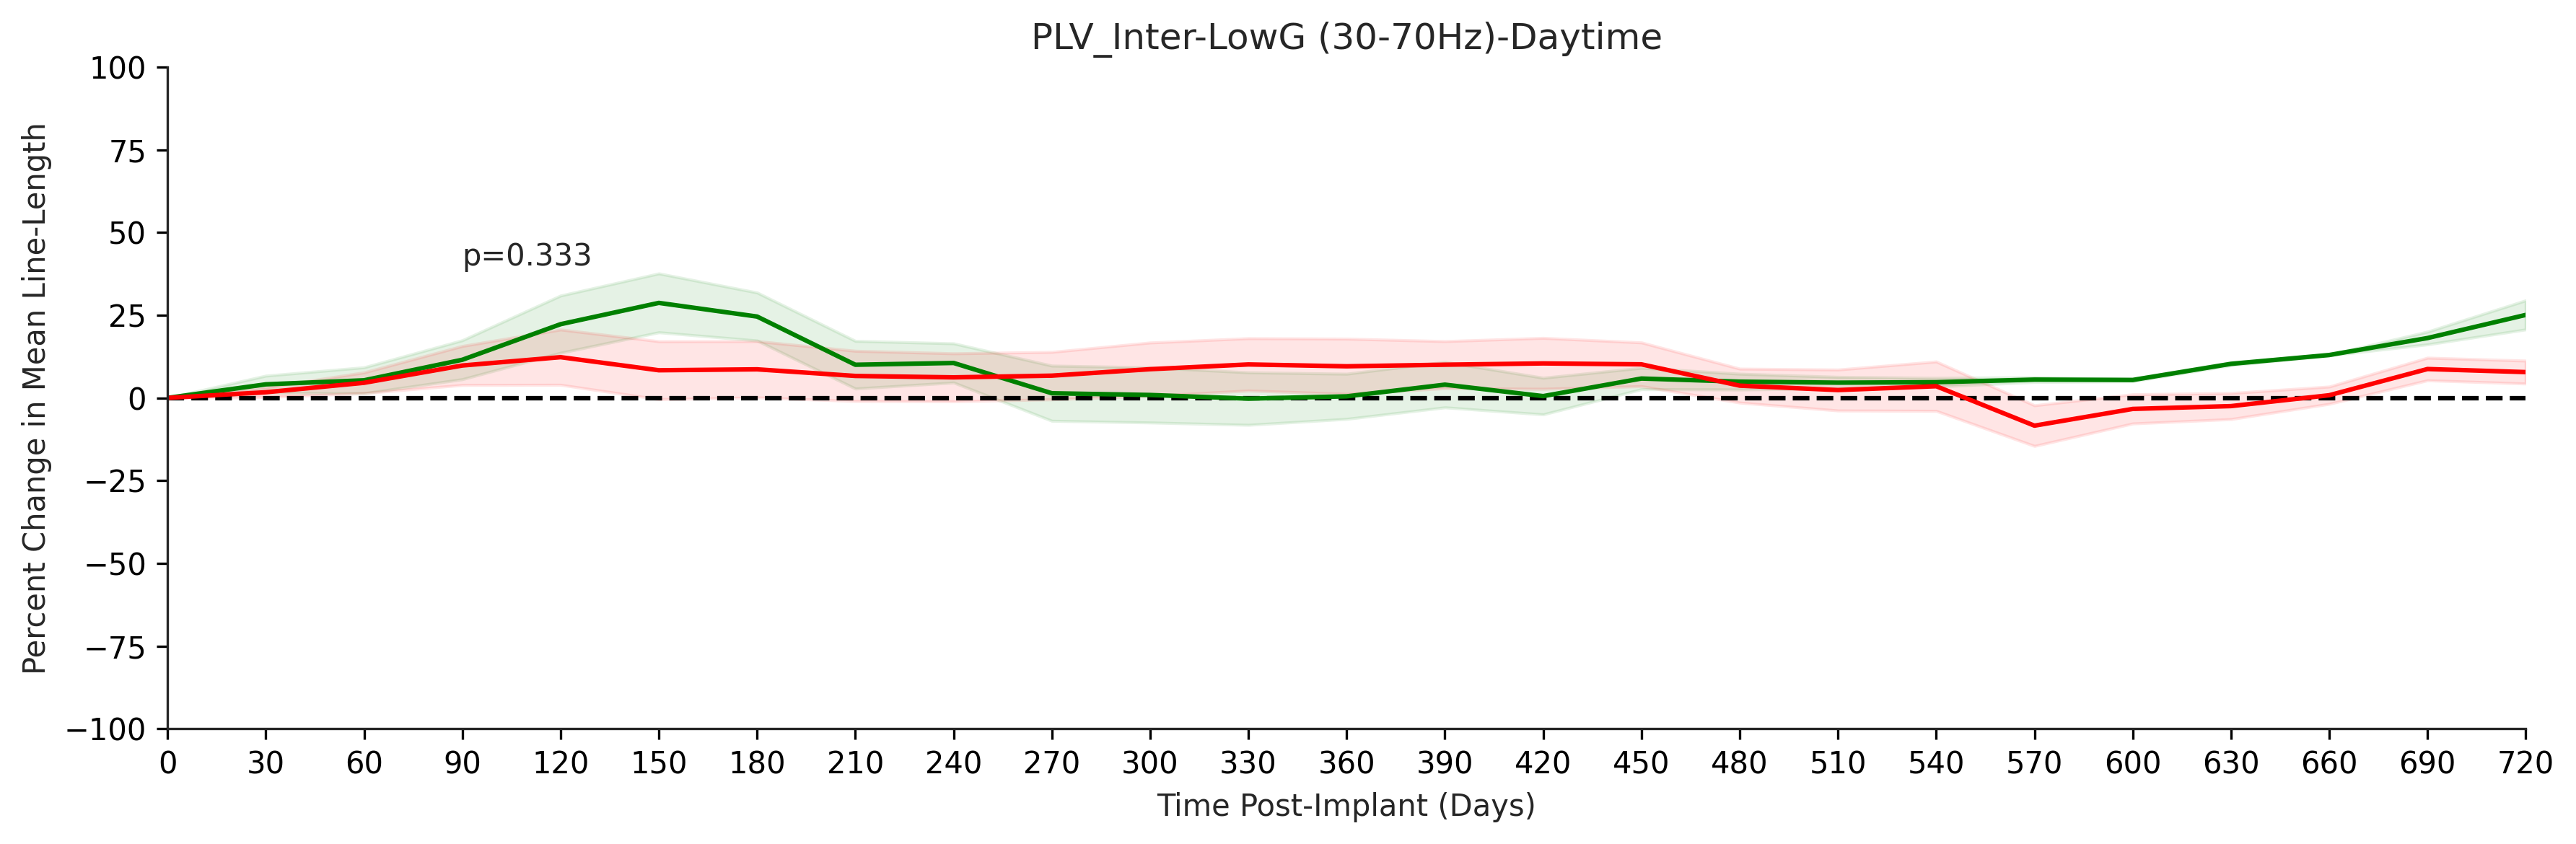

Functional Data Analysis: 0.0166


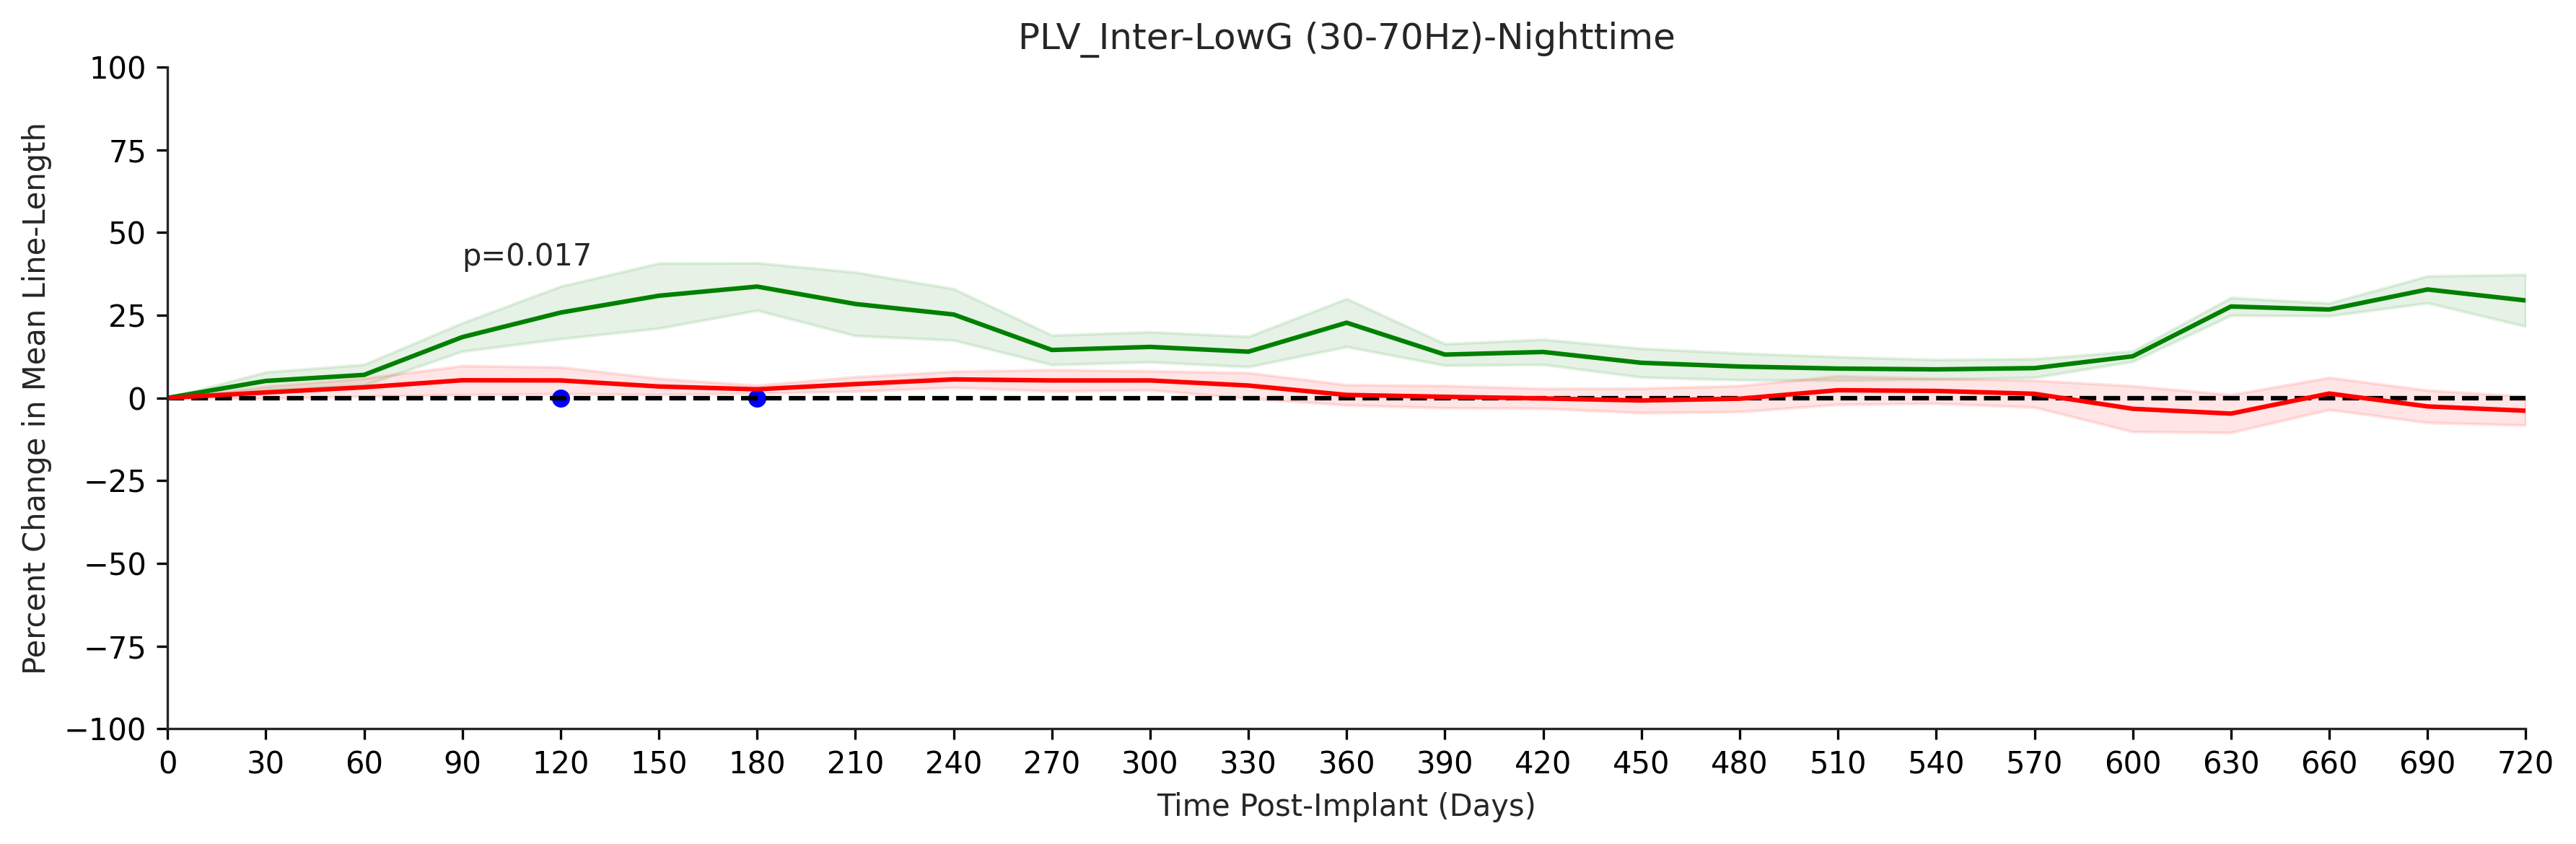

Functional Data Analysis: 0.0989


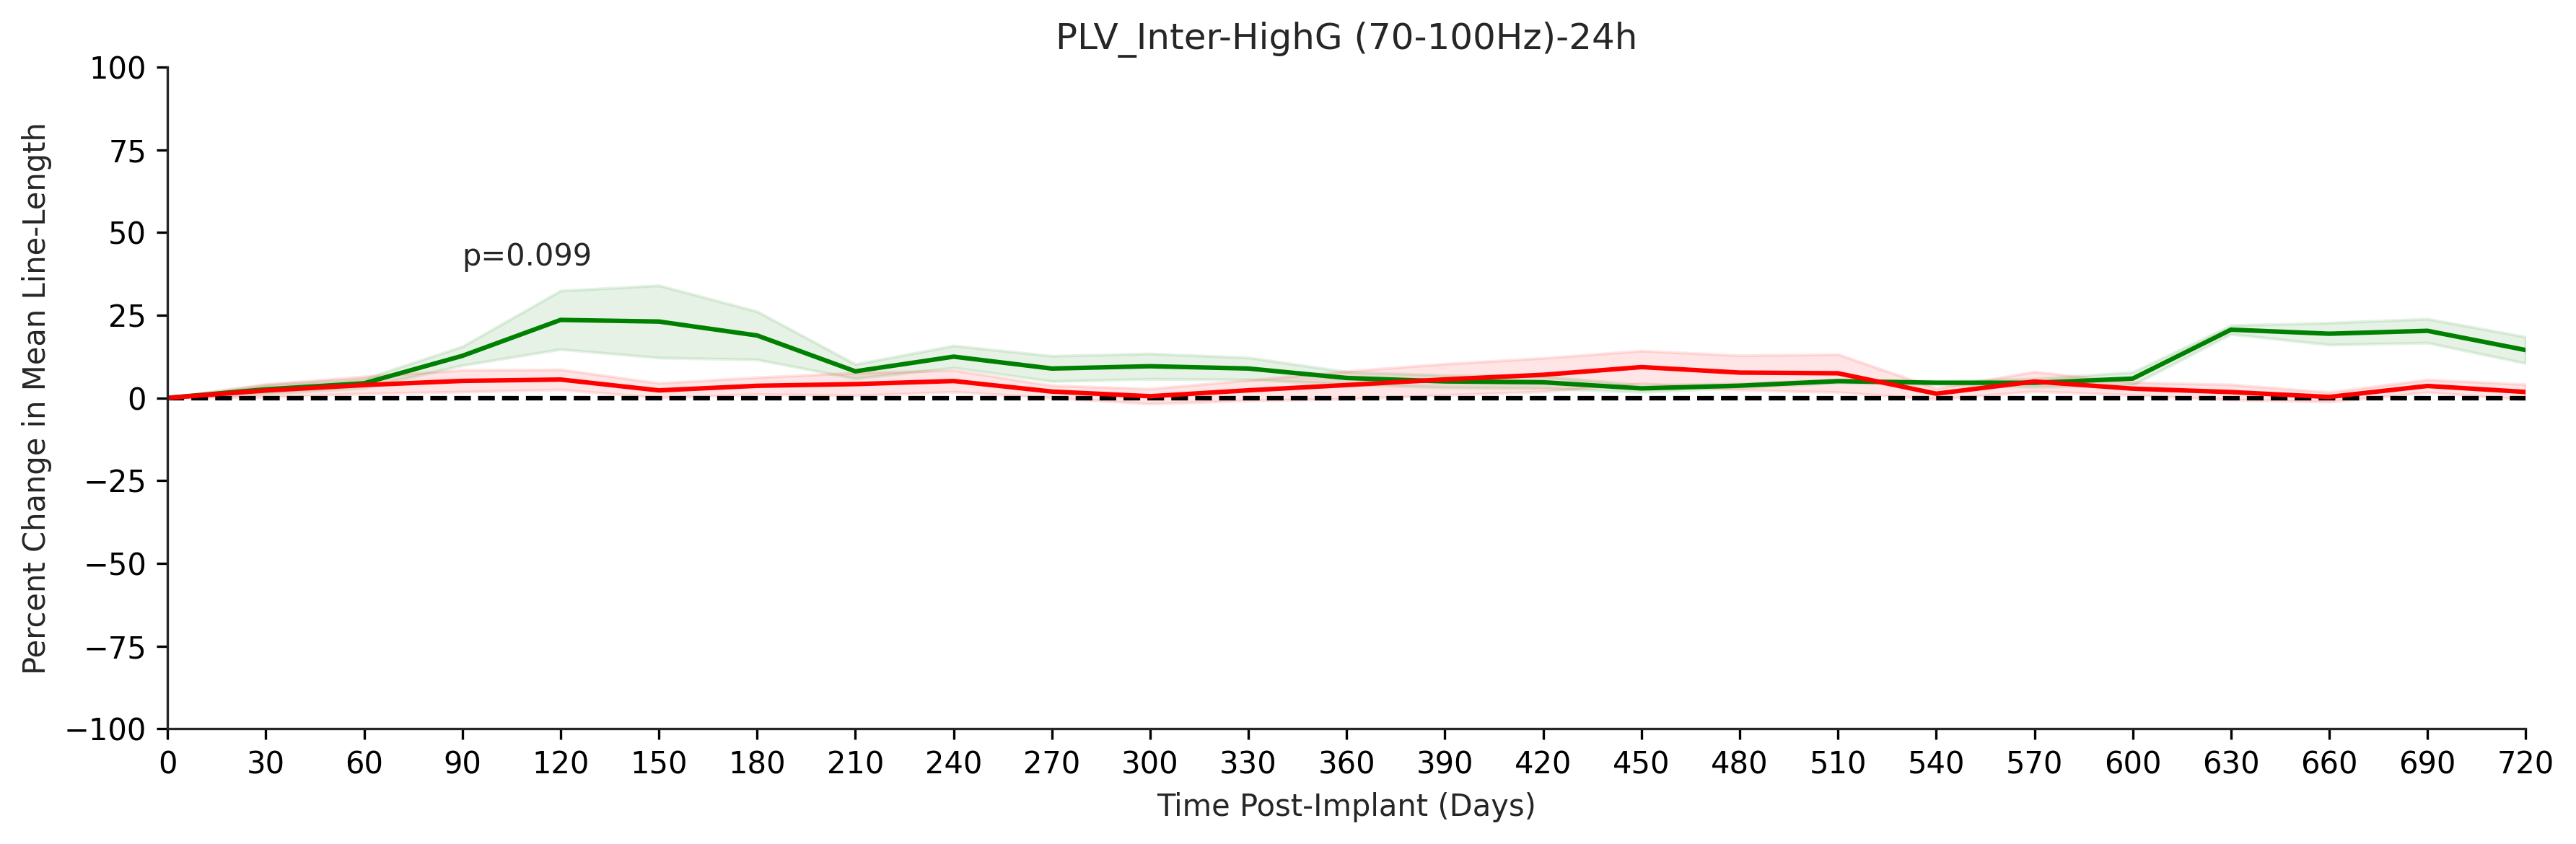

Functional Data Analysis: 0.0829


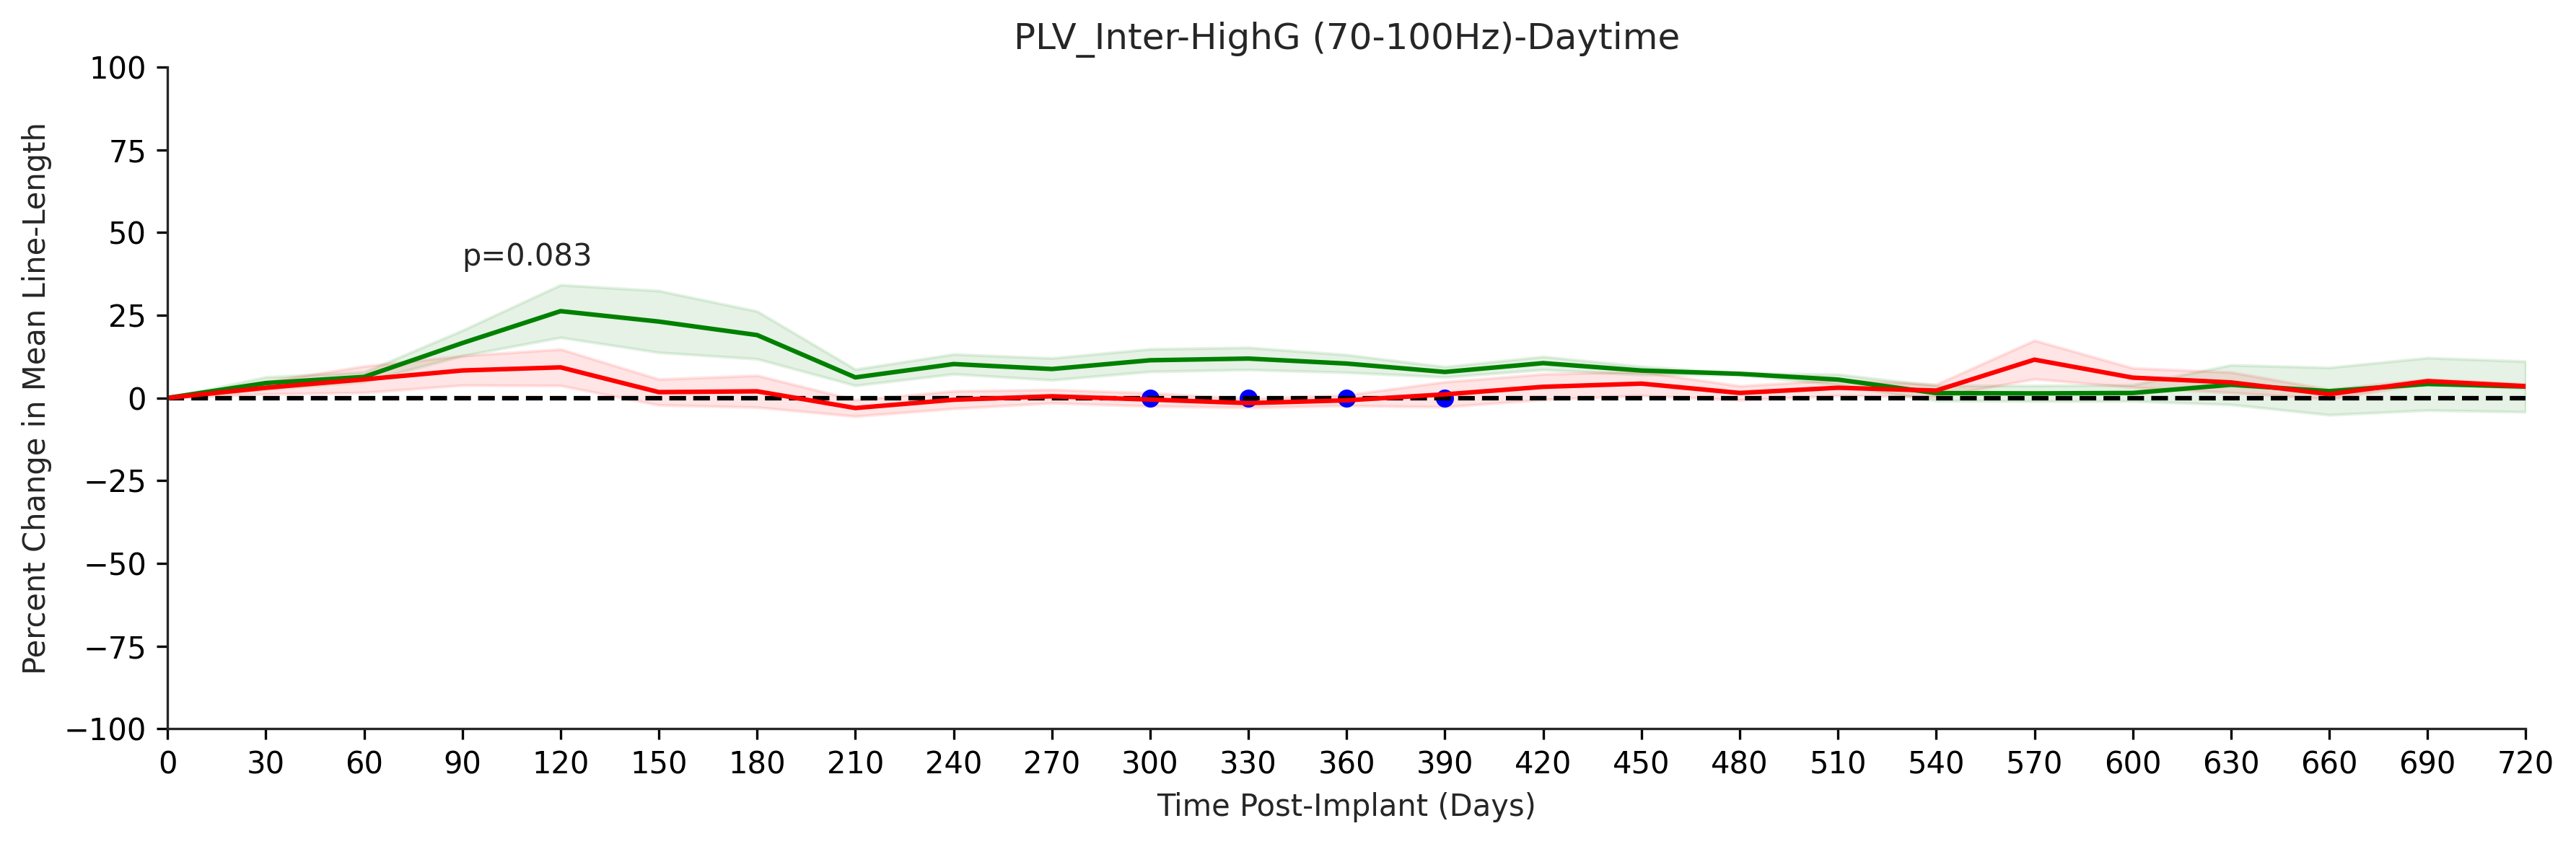

Functional Data Analysis: 0.0509


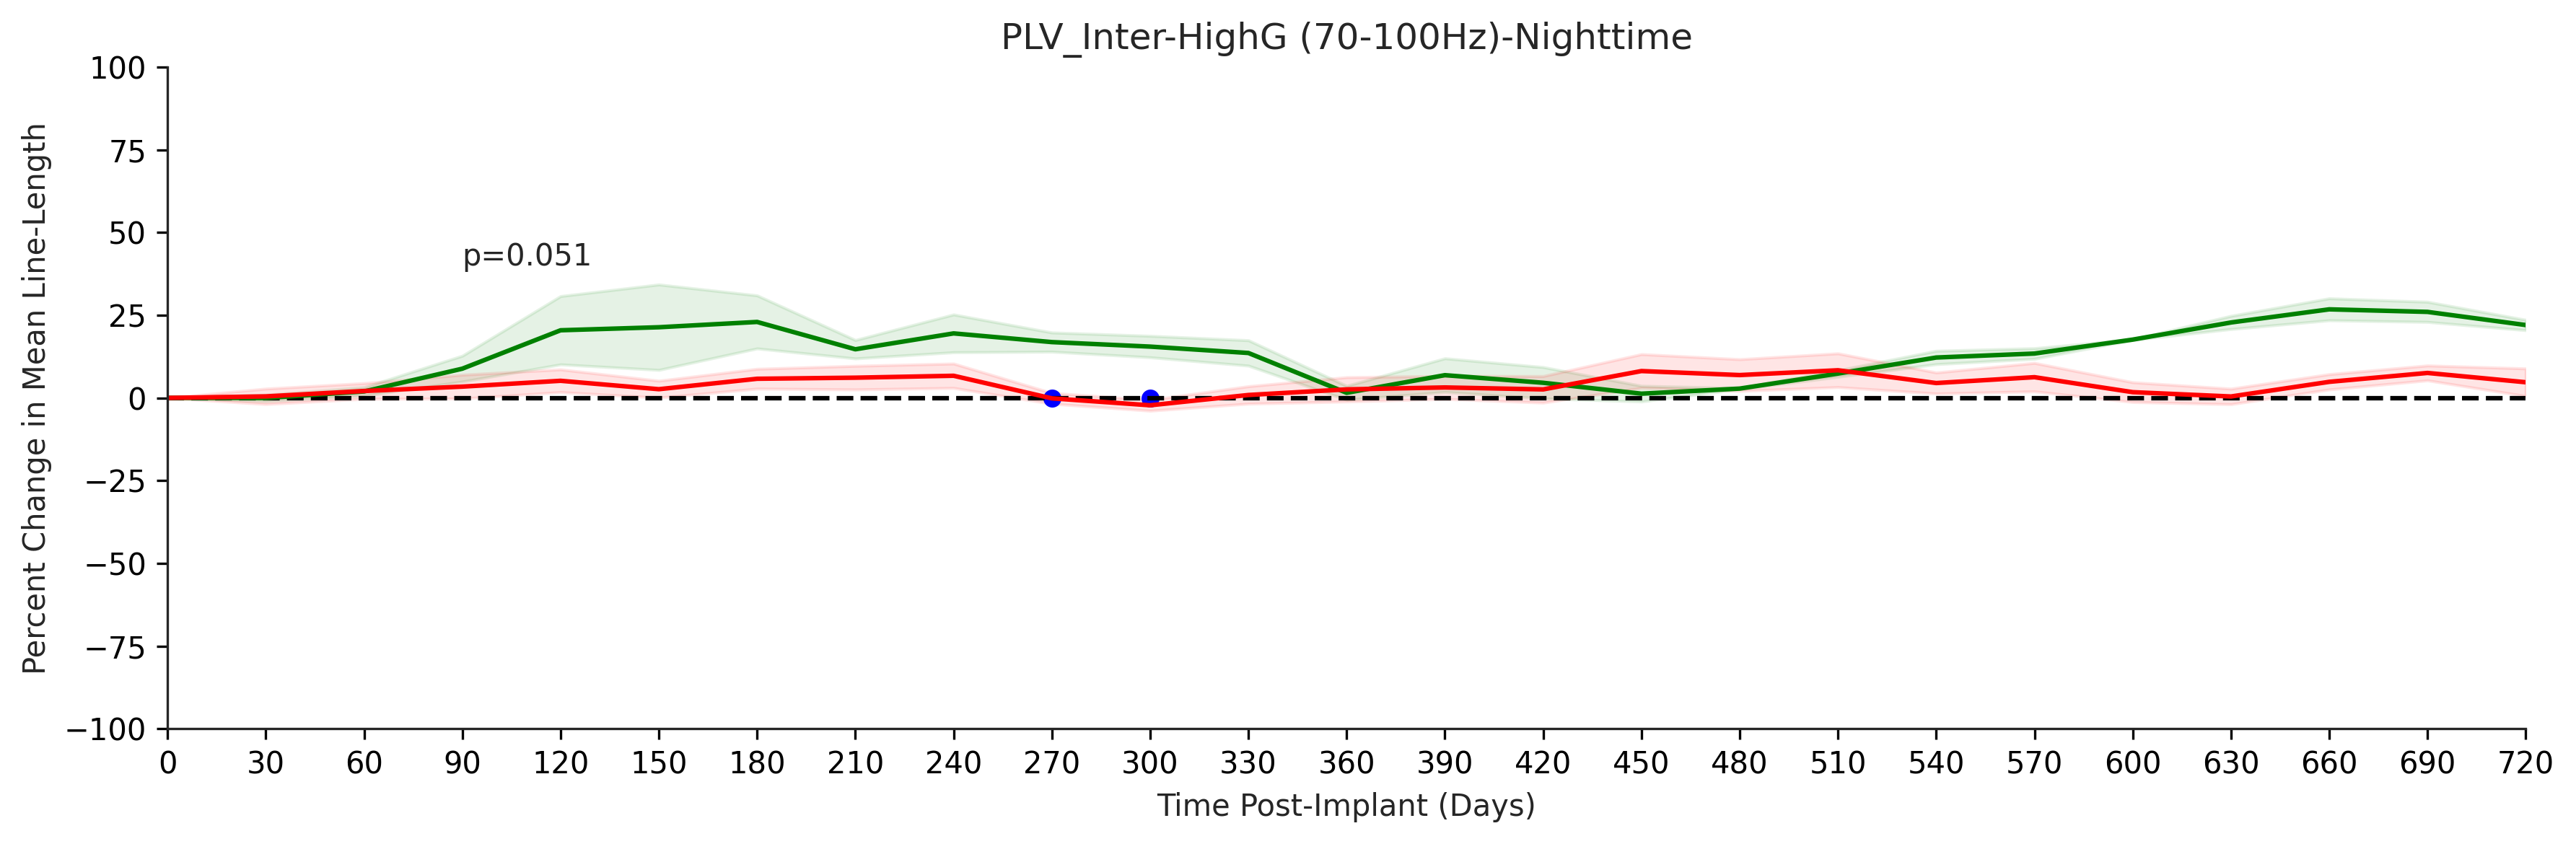

Functional Data Analysis: 0.2987


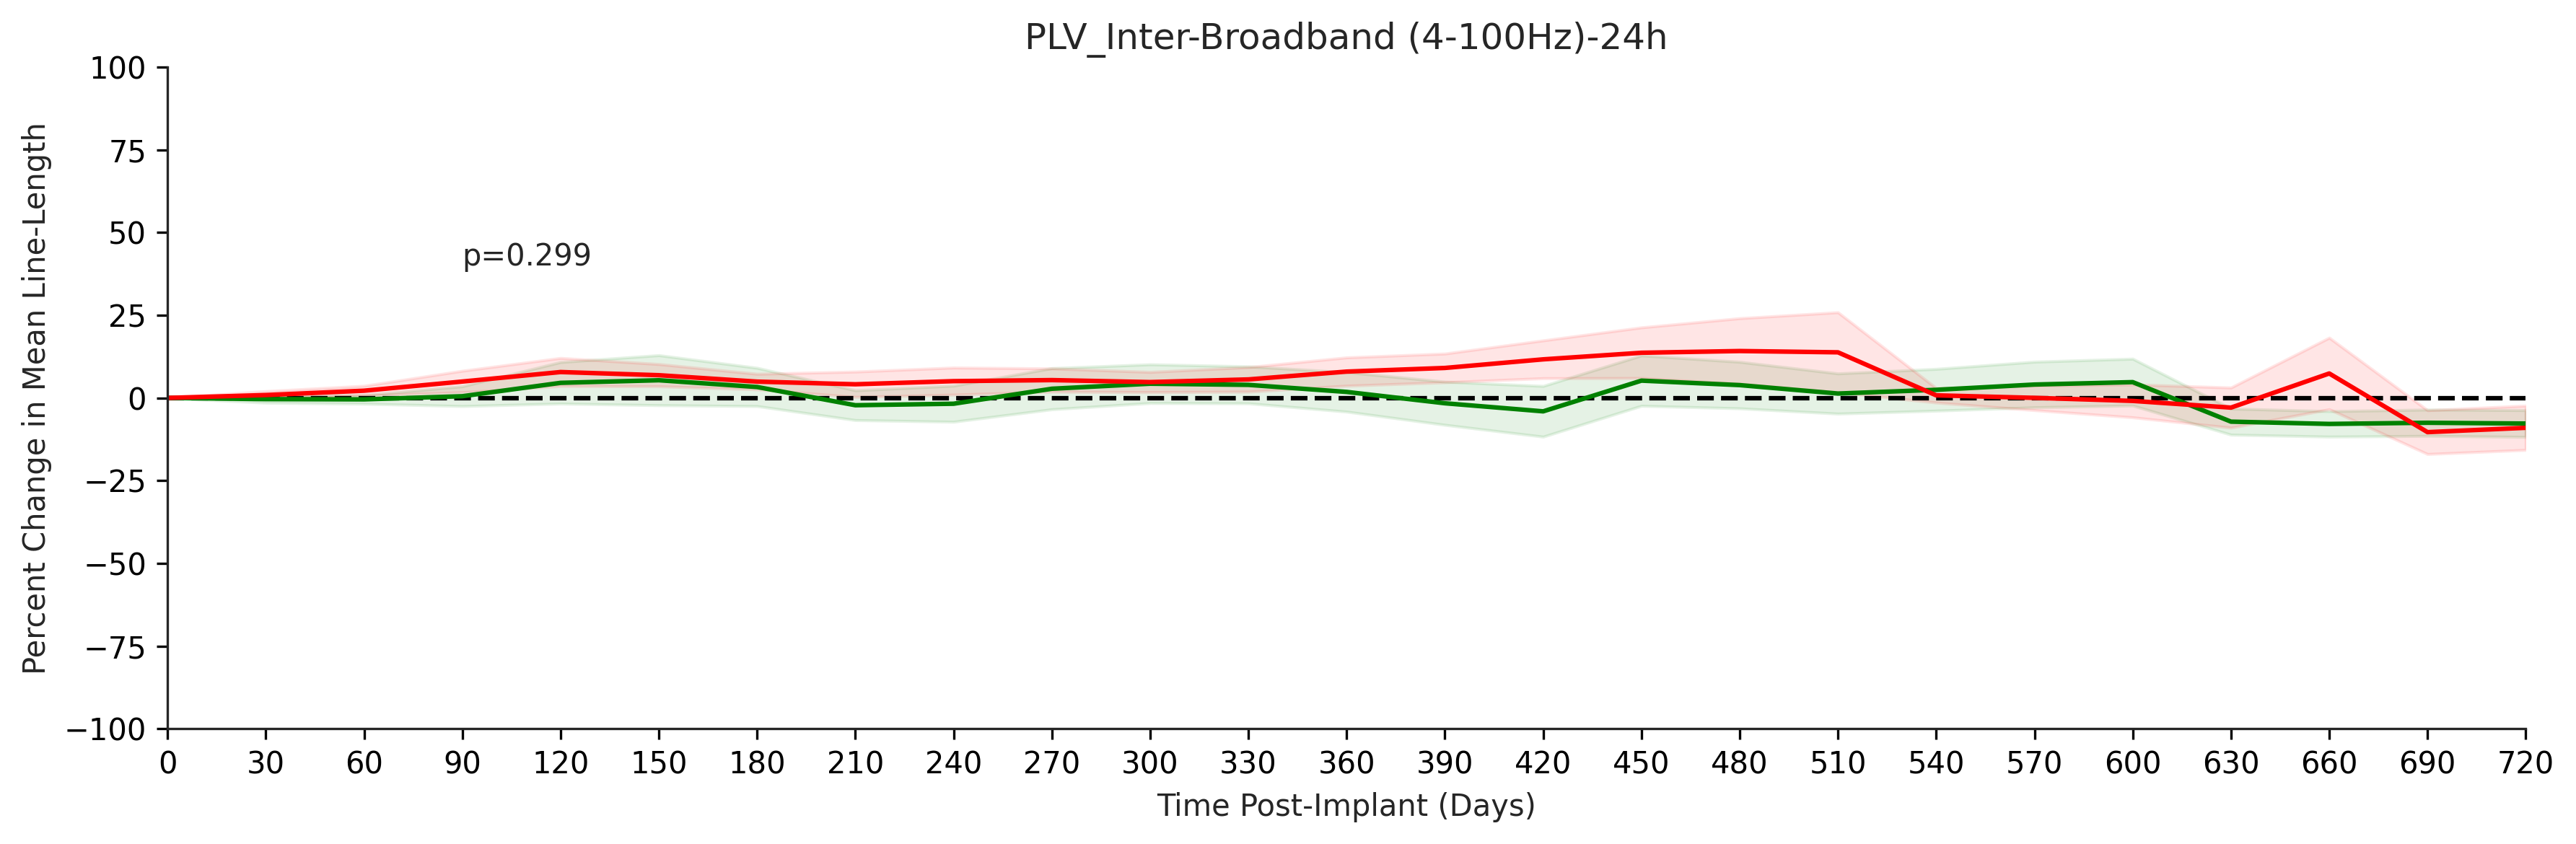

Functional Data Analysis: 0.3089


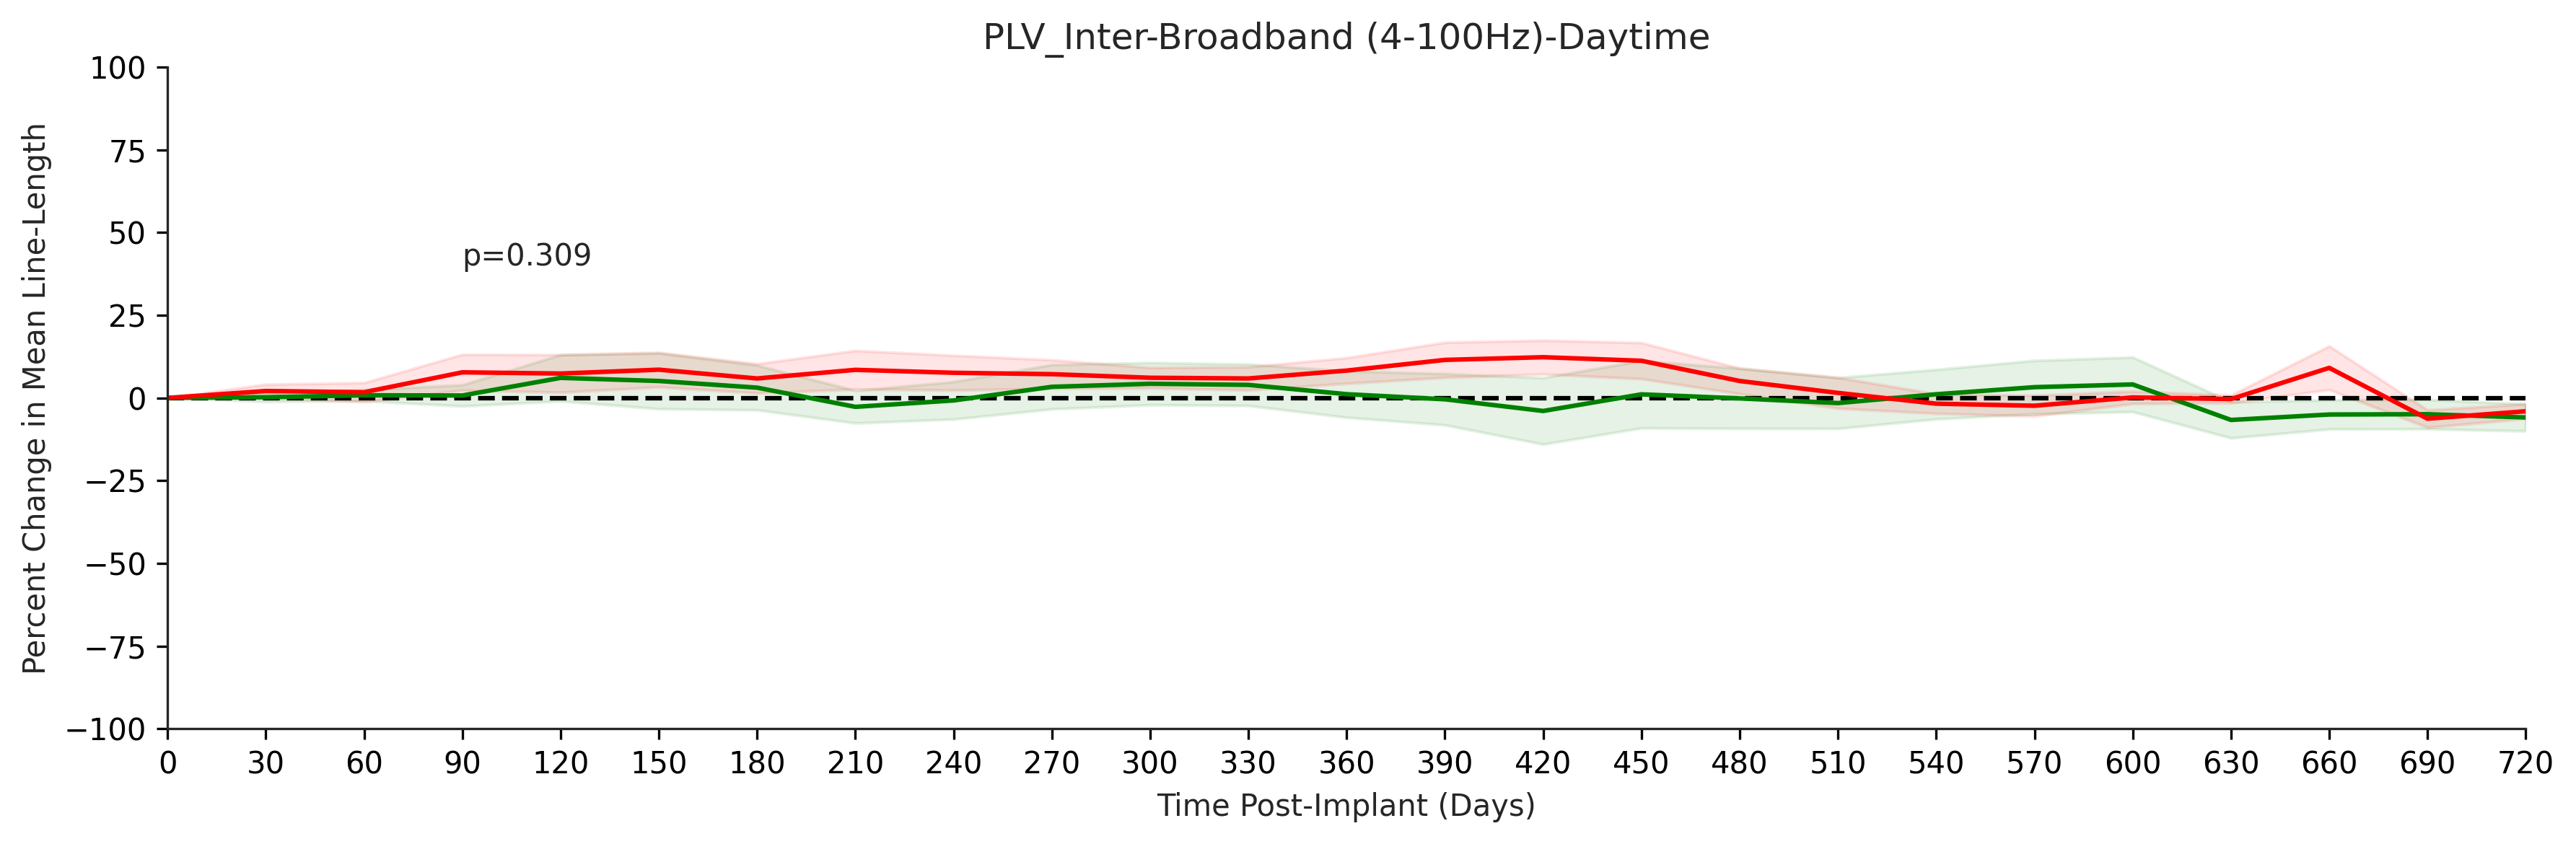

Functional Data Analysis: 0.1185


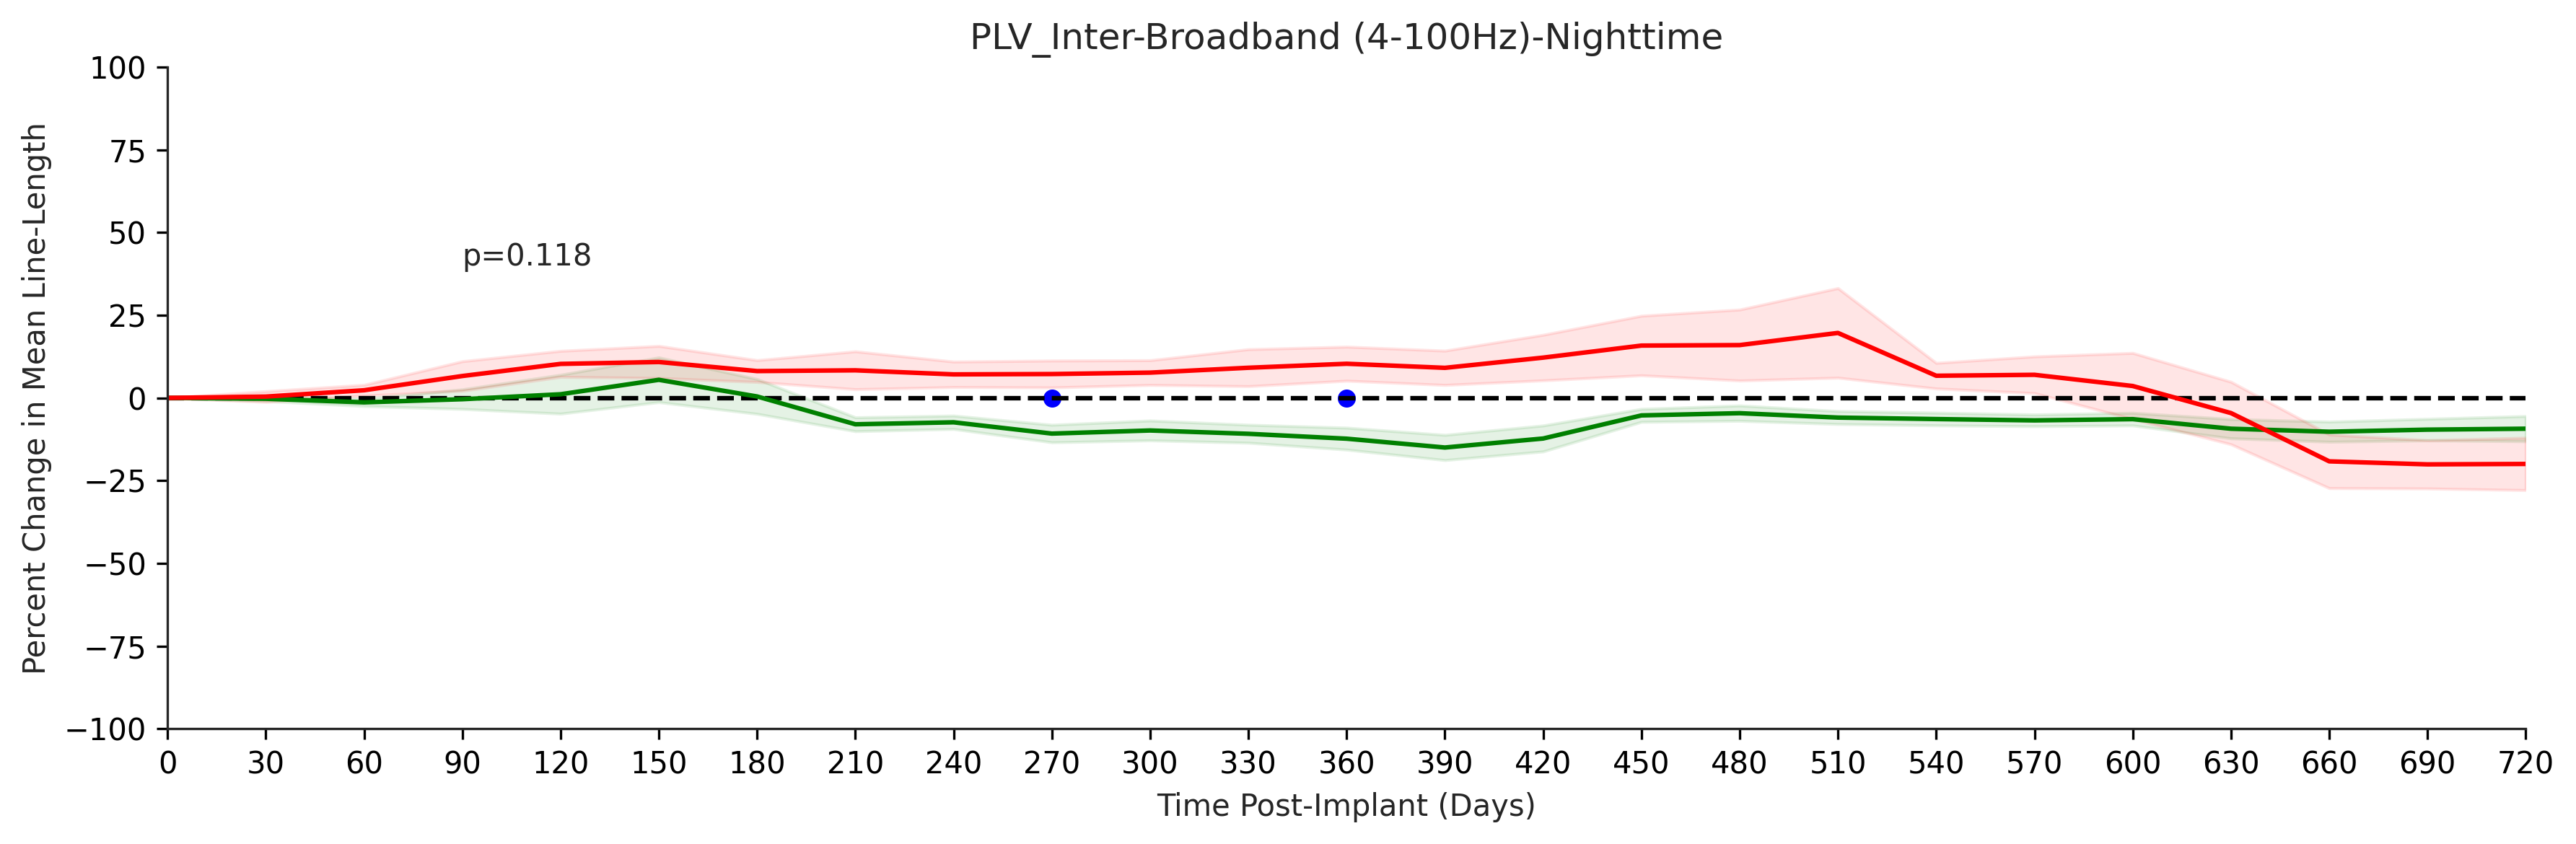

In [4]:
for loc in ['PLV_NEO', 'PLV_Inter']: 
    for band in X_PLV_Subject[loc]:
        for TOD in X_PLV_Subject[loc][band]:
            PLV_PCT_CHANGE = np.arctanh(X_PLV_Subject[loc][band][TOD])
            PLV_PCT_CHANGE = 100*(PLV_PCT_CHANGE / PLV_PCT_CHANGE.iloc[0] - 1)
            PLV_PCT_CHANGE = PLV_PCT_CHANGE[PLV_PCT_CHANGE.index <= '720 days']
            PLV_PCT_CHANGE = PLV_PCT_CHANGE.replace([np.inf, -np.inf], np.nan)

            days = np.array(PLV_PCT_CHANGE.index.days)
            sel_npref = df_npref[['N_Vs_MT', 'Responder_Type', 'NP_code']]
            sel_npref = sel_npref[~sel_npref['NP_code'].isin(path['CORE']['RNS']['NP_LOC'])]
            sel_npref = sel_npref[sel_npref['NP_code'].isin(PLV_PCT_CHANGE.columns)]  

            ####
            sel_npref = sel_npref[sel_npref['N_Vs_MT'].isin(['N', 'B'])]
            sel_npref = sel_npref[sel_npref['Responder_Type'].isin(['SR', 'NR'])]

            SR_Subj = sel_npref[sel_npref['Responder_Type'] == 'SR']['NP_code']
            NR_Subj = sel_npref[sel_npref['Responder_Type'] == 'NR']['NP_code']

            ####
            SR_mean = np.nanmean(PLV_PCT_CHANGE[SR_Subj], axis=1)
            SR_sem = np.nanstd(PLV_PCT_CHANGE[SR_Subj], axis=1) / np.sqrt(len(SR_Subj))

            NR_mean = np.nanmean(PLV_PCT_CHANGE[NR_Subj], axis=1)
            NR_sem = np.nanstd(PLV_PCT_CHANGE[NR_Subj], axis=1) / np.sqrt(len(NR_Subj))

            #### FUNCTIONAL DATA ANALYSIS
            true_diff = np.nanmean(SR_mean[1:] - NR_mean[1:])
            null_diff = []
            for rnd in range(10000):
                sel_npref_rnd = sel_npref.copy()
                sel_npref_rnd['Responder_Type'] = np.random.permutation(sel_npref['Responder_Type'])
                SR_Subj_rnd = sel_npref_rnd[sel_npref_rnd['Responder_Type'] == 'SR']['NP_code']
                NR_Subj_rnd = sel_npref_rnd[sel_npref_rnd['Responder_Type'] == 'NR']['NP_code']
                SR_mean_rnd = np.nanmean(PLV_PCT_CHANGE[SR_Subj_rnd], axis=1)
                NR_mean_rnd = np.nanmean(PLV_PCT_CHANGE[NR_Subj_rnd], axis=1)
                null_diff.append(np.nanmean(SR_mean_rnd[1:] - NR_mean_rnd[1:]))
            if true_diff > 0:
                fda_pv = np.mean(np.array(null_diff) > true_diff)
            else:
                fda_pv = np.mean(np.array(null_diff) < true_diff)
            print('Functional Data Analysis: {}'.format(fda_pv))

            #### T-Stat
            sig_days = []
            for ix in PLV_PCT_CHANGE.index:
                try:
                    tv, pv = sp_stats.ranksums(PLV_PCT_CHANGE[SR_Subj].loc[ix].dropna(),
                                               PLV_PCT_CHANGE[NR_Subj].loc[ix].dropna(),
                                               )
                
                except Exception as E:
                    print(E)
                    tv, pv = [0, 1]

                sig_days.append([ix.days, pv])
            sig_days = np.array(sig_days)
            sig_days = sig_days[sig_days[:,1] < 0.05][:, 0]

            #### Plot
            plt.figure(figsize=(12,4), dpi=300)
            ax = plt.subplot(1,1,1)  

            ax.plot(days, SR_mean, color='g')
            ax.fill_between(days, SR_mean-SR_sem, SR_mean+SR_sem, color='g', alpha=0.1)
            ax.plot(days, NR_mean, color='r')
            ax.fill_between(days, NR_mean-NR_sem, NR_mean+NR_sem, color='r', alpha=0.1)
            ax.scatter(sig_days, np.zeros(len(sig_days)), marker='.', color='b', s=100)

            ax.set_xticks(days)
            ax.hlines(0, 0, PLV_PCT_CHANGE.index[-1].days, linestyle='--', color='k')
            ax.set_xlim([0, PLV_PCT_CHANGE.index[-1].days])
            ax.set_ylim([-100, 100])
            ax.text(90, 40, 'p={:0.3f}'.format(fda_pv))

            ax.set_xlabel('Time Post-Implant (Days)')
            ax.set_ylabel('Percent Change in Mean Line-Length')  
            ax.set_title('{}-{}-{}'.format(loc, band, TOD))
            
            plt.tight_layout()
            plt.savefig('{}/Trajectory.PLV.{}-N-{}-{}.svg'.format(fig_path, loc, band, TOD))
            plt.show()